<span style="font-size:30px; font-weight:bold">Predicting Vehicle Prices Using Regression Models</span>

- **Analysis performed by :-** Russel Anthony Reynold Chandanshiv

---

- Copyright (c) 2025 Russel Anthony Reynold Chandanshiv
- Licensed under the MIT License
  
---

<span style="font-size:25px; font-weight:bold">Project Overview</span>

In the competitive used car market, accurate pricing is essential for both profitability and efficient inventory turnover. This project develops a data-driven pricing approach by predicting the market value of used cars using a real-world dataset sourced from AutoScout.

<span style="font-size:22px; font-weight:bold">Key Objectives</span>

- <strong>Precision Pricing:</strong> Develop and evaluate linear regression models to predict vehicle prices accurately, helping minimise risks associated with underpricing (reduced margins) and overpricing (slow inventory turnover).

- <strong>Feature Engineering:</strong> Transform raw vehicle specifications, including text-based feature bundles, into meaningful predictors capturing safety, comfort, and entertainment attributes.

- <strong>Regularisation & Generalisation:</strong> Apply Ridge and Lasso regression techniques to address multicollinearity and reduce overfitting, ensuring strong model performance on unseen real-world data.

- <strong>Driver Analysis & Interpretability:</strong> Examine model coefficients to identify the most influential features, revealing how factors such as mileage, horsepower, vehicle condition, and age impact market value.

---

<span style="font-size:25px; font-weight:bold">Data Understanding</span>

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

---
<span style="font-size:25px; font-weight:bold">Logging</span>

In [1]:
# Custom Logging Function
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Importing Libraries
import time
import logging
from datetime import datetime

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging Configuration
logfile = "russel_car_price_prediction_log.txt"

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Clear previous handlers (If any) and Do not display logs in notebook
logger = logging.getLogger(__name__)
logger.handlers.clear()
logger.propagate = False

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def log_progress(msg, level="info"):
    """
    Docstring: 
               Take's a message and the level of logging and creates a new file or appends existing file.
               Default Level for Logging : "INFO"
    Parameters:
               (Message, Level)
    Arguements:
               Message can be anything. Level must be valid.
               Level : ["Debug", "Info", "Warning", "Error", "Critical"]
    """
    level = level.upper().strip()

    if level == "DEBUG":
        logger.debug(msg)
        
    elif level == "INFO":
        logger.info(msg)
        
    elif level == "WARNING":
        logger.warning(msg)
        
    elif level == "ERROR":
        logger.error(msg)
        
    elif level == "CRITICAL":
        logger.critical(msg)
        
    else:
        level = "INFO"
        logger.info(msg)

    timeformat = '%Y-%b-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} | {level} | {msg}\n")
        
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Recording the Start Time and Logging

start_time = time.time()
log_progress ("Log Setup Completed Successfully : Logs will now be written to log file.")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging the Exact Start Time

timeformat = '%Y-%b-%d-%H:%M:%S'
timestamp = datetime.now().strftime(timeformat)

log_progress (f"Start Time : {timestamp}")


---
<span style="font-size:25px; font-weight:bold">Data Loading</span>

<span style="font-size:20px; font-weight:bold">Importing Necessary Libraries</span>


In [2]:
# Importing necessary Libraries
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
try:
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import (f_oneway, kruskal)
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import (RidgeCV, Ridge)
    from sklearn.linear_model import (LassoCV, Lasso)
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import (train_test_split, GridSearchCV)
    from sklearn.preprocessing import MultiLabelBinarizer
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error, 
                                 mean_squared_error, r2_score, median_absolute_error,
                                 mean_squared_log_error)

except Exception as e:
    print (f"The Exception is as follows :- {e}")
    log_progress ("There was an issue while importing libraries.", "WARNING")

else:
    print ("The libraries were imported successfully")
    log_progress ("The libraries were imported successfully.\n")


The libraries were imported successfully


<span style="font-size:20px; font-weight:bold">Loading the Dataset</span>

In [3]:
# Load the data
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
try:
    df = pd.read_csv ("Car_Price_data.csv")
    log_progress ("============================== Step 1 : Loading Phase ===============================")
    
except Exception as e:
    print (f"The File couldn't be read because {e}")
    log_progress ("The File couldn't be read because {e}.", "WARNING")
     
else:
    log_progress ("The Dataset has been read successfully.")


In [4]:
# Let's view random 5 rows/observations in our dataset
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("These are 5 Randomly Selected Observations from our Dataset:-\n")
display (df.sample(5, random_state=42).reset_index(drop= True))


These are 5 Randomly Selected Observations from our Dataset:-



make_model      body_type  price             vat       km  \
0   Opel Insignia  Station wagon  26379  VAT deductible   5900.0   
1      Opel Astra         Sedans  18990  VAT deductible    133.0   
2      Opel Astra         Sedans  12490  VAT deductible   8000.0   
3  Renault Espace            Van  32975  VAT deductible     15.0   
4         Audi A1         Sedans  15888  VAT deductible  11903.0   

             Type     Fuel  Gears  \
0   Demonstration   Diesel    6.0   
1   Demonstration  Benzine    5.0   
2            Used  Benzine    5.0   
3  Pre-registered   Diesel    6.0   
4            Used  Benzine    5.0   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Cruise control,Electr...   
1  Air conditioning,Automatic climate control,Cru...   
2  Air conditioning,Armrest,Cruise control,Electr...   
3  Air conditioning,Armrest,Automatic climate con...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  ... Previous_Owners  \
0  Bluetooth,Hands-free equipment,MP3,On-board co...  ...             1.0   
1        Bluetooth,CD player,On-board computer,Radio  ...             1.0   
2        Bluetooth,CD player,On-board computer,Radio  ...             1.0   
3  Bluetooth,Hands-free equipment,On-board comput...  ...             1.0   
4           Bluetooth,Hands-free equipment,MP3,Radio  ...             1.0   

   hp_kW  Inspection_new  Paint_Type    Upholstery_type  Gearing_Type  \
0  100.0               1    Metallic              Cloth        Manual   
1   66.0               0    Metallic              Cloth        Manual   
2   77.0               0    Metallic              Cloth        Manual   
3  118.0               1    Metallic  Part/Full Leather     Automatic   
4   60.0               0    Metallic              Cloth        Manual   

  Displacement_cc Weight_kg Drive_chain  cons_comb  
0          1598.0    1487.0       front        4.8  
1           999.0    1273.0       front        4.9  
2           998.0    1273.0       front        4.9  
3          1997.0    1734.0       front        5.1  
4           999.0    1135.0       front        4.2  

[5 rows x 23 columns]

In [5]:
# Let's view information about our dataset
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The information of our Dataframe is as follows:-\n")
df.info()


The information of our Dataframe is as follows:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null 

In [6]:
# Let's see the Statistical Summary of numerical features in our Dataset
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Satstical Summary of the numerical features is as follows:-\n")
df.describe()


The Satstical Summary of the numerical features is as follows:-



price             km         Gears           age  \
count  15915.000000   15915.000000  15915.000000  15915.000000   
mean   18024.380584   32089.995708      5.937355      1.389695   
std     7381.679318   36977.214964      0.704772      1.121306   
min     4950.000000       0.000000      5.000000      0.000000   
25%    12850.000000    1920.500000      5.000000      0.000000   
50%    16900.000000   20413.000000      6.000000      1.000000   
75%    21900.000000   46900.000000      6.000000      2.000000   
max    74600.000000  317000.000000      8.000000      3.000000   

       Previous_Owners         hp_kW  Inspection_new  Displacement_cc  \
count     15915.000000  15915.000000    15915.000000     15915.000000   
mean          1.042853     88.499340        0.247063      1428.661891   
std           0.339178     26.674341        0.431317       275.804272   
min           0.000000     40.000000        0.000000       890.000000   
25%           1.000000     66.000000        0.000000      1229.000000   
50%           1.000000     85.000000        0.000000      1461.000000   
75%           1.000000    103.000000        0.000000      1598.000000   
max           4.000000    294.000000        1.000000      2967.000000   

          Weight_kg     cons_comb  
count  15915.000000  15915.000000  
mean    1337.700534      4.832124  
std      199.682385      0.867530  
min      840.000000      3.000000  
25%     1165.000000      4.100000  
50%     1295.000000      4.800000  
75%     1472.000000      5.400000  
max     2471.000000      9.100000

In [7]:
# Let's view the Column Names 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The List of all the features present in our Dataset:-\n")
df.columns.tolist()


The List of all the features present in our Dataset:-



['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'Type',
 'Fuel',
 'Gears',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Displacement_cc',
 'Weight_kg',
 'Drive_chain',
 'cons_comb']

In [8]:
# Number of Rows and Columns in our DataFrame
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (f"The DataFrame has {df.shape[0]:,} Observations and {df.shape[1]} Features.")
log_progress (f"The DataFrame has {df.shape[0]:,} Observations and {df.shape[1]} Features.")
log_progress ("========================== Step 1 : Loading Phase Completed ===========================\n")


The DataFrame has 15,915 Observations and 23 Features.


---
<span style="font-size:25px; font-weight:bold">Analysis and Feature Engineering</span>

<span style="font-size:20px; font-weight:bold">Preliminary Analysis and Frequency Distributions</span>


In [9]:
log_progress ("====================== Step 2 : Analysis and Feature Engineering ======================")
log_progress ("---------------- Preliminary Analysis Phase and Frequency Distributions ---------------")

<span style="font-size:20px; font-weight:bold">Missing Value Analysis</span>

In [10]:
# Missing Value Analysis: Proportion of Missing values in each feature
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for cols in df.columns:
    missing_value = df[cols].isnull().sum()
    
    if missing_value >= 1:
        print (f"Column Name : {cols}  , Number of missing value : {missing_value:,} , Percentage of Missing Value : {missing_value/df[cols].shape[0] * 100:.2f}%")
        print ()
    else:
        print (f"Column Name : {cols}  , Percentage of Missing Value : {missing_value/df[cols].shape[0] * 100:.2f}%")
        print ()
        

Column Name : make_model  , Percentage of Missing Value : 0.00%

Column Name : body_type  , Percentage of Missing Value : 0.00%

Column Name : price  , Percentage of Missing Value : 0.00%

Column Name : vat  , Percentage of Missing Value : 0.00%

Column Name : km  , Percentage of Missing Value : 0.00%

Column Name : Type  , Percentage of Missing Value : 0.00%

Column Name : Fuel  , Percentage of Missing Value : 0.00%

Column Name : Gears  , Percentage of Missing Value : 0.00%

Column Name : Comfort_Convenience  , Percentage of Missing Value : 0.00%

Column Name : Entertainment_Media  , Percentage of Missing Value : 0.00%

Column Name : Extras  , Percentage of Missing Value : 0.00%

Column Name : Safety_Security  , Percentage of Missing Value : 0.00%

Column Name : age  , Percentage of Missing Value : 0.00%

Column Name : Previous_Owners  , Percentage of Missing Value : 0.00%

Column Name : hp_kW  , Percentage of Missing Value : 0.00%

Column Name : Inspection_new  , Percentage of Missi

In [11]:
# Total Number of Missing Values in our Dataset
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (f"Percentage of Missing Values in our Dataset: {df.isnull().sum().sum()/df[cols].shape[0] * 100:.2f}%")
print ()
print (f"Total Number of Missing Values in our Dataset: {df.isnull().sum().sum()} Missing Values.")

log_progress (f"Our DataFrame contains {df.isnull().sum().sum()} Missing Values in total.")


Percentage of Missing Values in our Dataset: 0.00%

Total Number of Missing Values in our Dataset: 0 Missing Values.


**The dataset features were reviewed to identify the target variable and to classify predictors into numerical and categorical types. This step ensures appropriate feature selection for subsequent analysis and modeling.**

In [12]:
# Classification of Features
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
categorical = ["make_model", "body_type", "vat", "Type", 
               "Fuel", "Gears", "Inspection_new", "Paint_Type", 
               "Upholstery_type", "Gearing_Type", "Drive_chain"]
               
multi_value_categorical = ["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]

numerical = ["km", "age", "Previous_Owners", "hp_kW", "Displacement_cc", "Weight_kg", "cons_comb"]

target = ["price"]

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Sanity Check (Checks if we missed any column)

if len (categorical) + len (multi_value_categorical) + len (numerical) + len (target) == len (df.columns):
    print ("All features in our Dataset has been accounted for.")
    log_progress (f"All features in our Dataset has been accounted for and classified correctly.", "DEBUG")

else:
    print ("Some features in our Dataset haven't been accounted for.")
    og_progress (f"Some features in our Dataset haven't been accounted for during classification.", "WARNING")


All features in our Dataset has been accounted for.


In [13]:
# Using ggplot style throughout the notebook for visualizations.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.style.use ("ggplot")
log_progress ("ggplot style has been implemented.\n", "DEBUG")


<span style="font-size:20px; font-weight:bold">Univariate Analysis – Numerical Features</span>
- The distributions of numerical variables are examined to identify patterns, skewness, and potential anomalies.

In [14]:
# Identify Numerical Features and Plot Histograms
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Numerical features are as follows:-\n")
print (f"{numerical[0]}, {numerical[1]}, {numerical[2]}, {numerical[3]}, {numerical[4]}, {numerical[5]}, {numerical[6]}")


The Numerical features are as follows:-

km, age, Previous_Owners, hp_kW, Displacement_cc, Weight_kg, cons_comb


In [15]:
# Custom Histogram Reusable Function
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def histogram_plot (dataframe, feature, title, xlabel, ylabel, kde_xy, kde_xytext, mean_xy, mean_xytext, median_xy, median_xytext, display_text):
    # Plotting a Histogram --- Analyzing Distribution of Continuous Numerical Features
    # --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # Getting evenly spaced bins and bars corresponding to the bins.
    evenly_spaced = np.linspace(dataframe[f"{feature}"].min(),dataframe[f"{feature}"].max(), 10)

    # --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # Plot Customization
    plt.figure (figsize=(12,6))
    sns.histplot(
            data = dataframe,
            x = f"{feature}",
            color = "m",
            edgecolor = "black",
            bins = evenly_spaced,
            lw = 1.5,
            kde = True
    )

    # Lines for Mean and Median
    plt.vlines(x = dataframe[f"{feature}"].mean(), ymin = plt.gca().get_ylim()[0], ymax = plt.gca().get_ylim()[1], colors = "red", label = "Mean", linewidth= 3)
    plt.vlines(x = dataframe[f"{feature}"].median(), ymin = plt.gca().get_ylim()[0], ymax = plt.gca().get_ylim()[1], colors = "blue", label = "Median", linewidth= 3)

    # Labels
    plt.title (f"{title}")
    plt.xlabel(f"{xlabel}")
    plt.xticks(evenly_spaced)
    plt.ylabel(f"{ylabel}")
    plt.legend()

    # Kernel Density (Arrow and Text Customization)
    plt.annotate("", xy=(kde_xy[0], kde_xy[1]), xytext=(kde_xytext[0], kde_xytext[1]), arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color="black", lw=4))
    plt.text(kde_xytext[0], kde_xytext[1], "Kernel Density Estimation (KDE) Line", fontsize=13)

    # Median (Arrow and Text Customization)
    plt.annotate("", xy=(median_xy[0], median_xy[1]), xytext=(median_xytext[0], median_xytext[1]), arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=4))
    plt.text(median_xytext[0], median_xytext[1], f'Median : {dataframe[f"{feature}"].median():.2f} {display_text}', fontsize=13)

    # Mean (Arrow and Text Customization)
    plt.annotate("", xy=(mean_xy[0], mean_xy[1]), xytext=(mean_xytext[0], mean_xytext[1]), arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color="red", lw=4))
    plt.text(mean_xytext[0], mean_xytext[1], f'Mean : {dataframe[f"{feature}"].mean():.2f} {display_text}', fontsize=13)

    # Plot the distribution of market cap
    return plt.show()
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Custom Histogram Reusable Function [Continuous Numerical Features]
log_progress ("------------------- Frequency Distributions of Numerical Features -------------------")
log_progress ("Custom Histogram Reusable Function - Analyzing continuous numerical features.", "DEBUG")


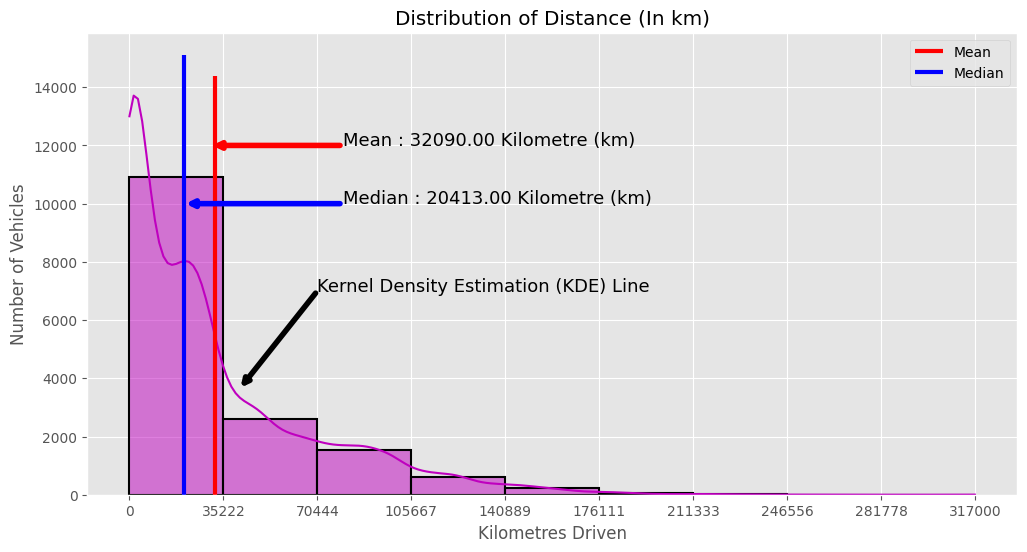

In [16]:
# Distribution of 1st Numerical Feature (km)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
histogram_plot (
                dataframe=df, 
                feature= "km", 
                title = "Distribution of Distance (In km)",
                xlabel= "Kilometres Driven",
                ylabel= "Number of Vehicles",
                kde_xy= (41000, 3600),
                kde_xytext= (70444, 7000),
                mean_xy= (30000,12000),
                mean_xytext= (80000,12000),
                median_xy= (20000,10000),
                median_xytext= (80000,10000),
                display_text= "Kilometre (km)"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 1st Numerical Feature (Kilometre)
log_progress ("1st Numerical Feature - Distribution of Distance (Kilometre Driven)", "DEBUG")


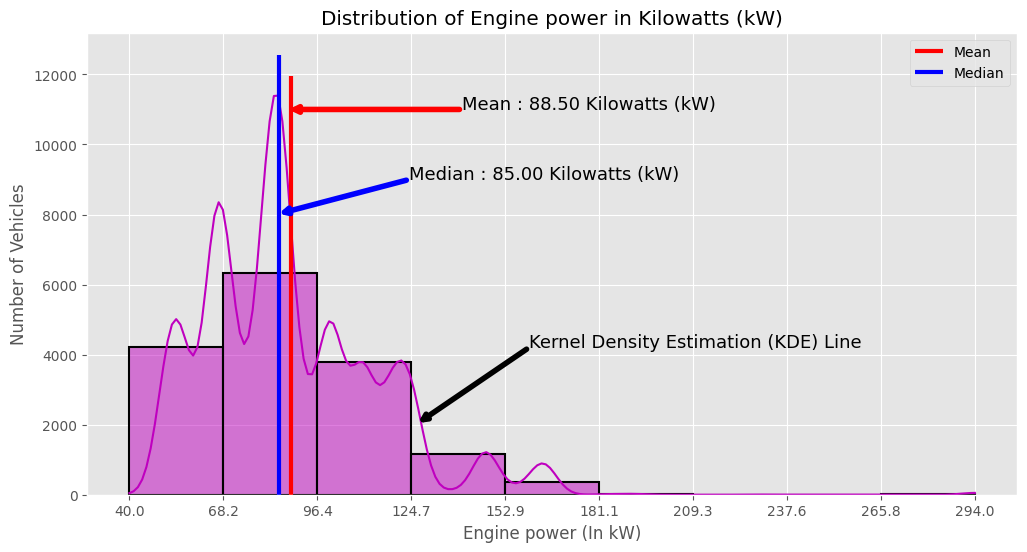

In [17]:
# Distribution of 2nd Numerical Feature (hp_kW) Engine power in kilowatts (kW), indicating the performance capacity of the engine.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
histogram_plot (
                dataframe=df, 
                feature= "hp_kW", 
                title = "Distribution of Engine power in Kilowatts (kW)",
                xlabel= "Engine power (In kW)",
                ylabel= "Number of Vehicles",
                kde_xy= (126, 2000),
                kde_xytext= (160, 4200),
                mean_xy= (87, 11000),
                mean_xytext= (140, 11000),
                median_xy= (84, 8000),
                median_xytext= (124, 9000),
                display_text= "Kilowatts (kW)"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 2nd Numerical Feature (Horsepower (HP) and Kilowatts (kW))[HPkW]
log_progress ("2nd Numerical Feature - Distribution of Engine power in Kilowatts (kW)", "DEBUG")


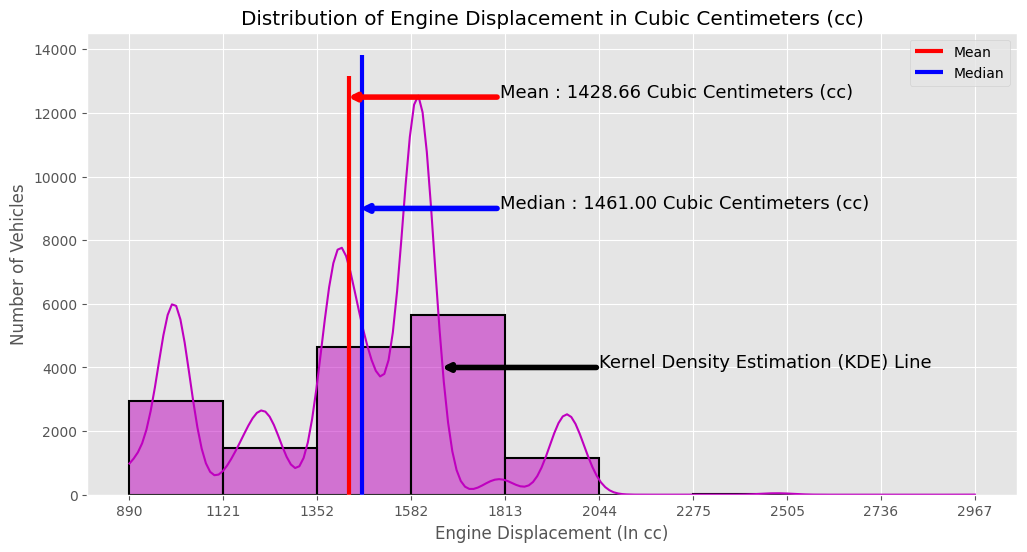

In [18]:
# Distribution of 3rd Numerical Feature (Displacement_cc) The engine displacement in cubic centimeters (cc), indicating the size of the engine.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
histogram_plot (
                dataframe=df, 
                feature= "Displacement_cc", 
                title = "Distribution of Engine Displacement in Cubic Centimeters (cc)",
                xlabel= "Engine Displacement (In cc)",
                ylabel= "Number of Vehicles",
                kde_xy= (1650, 4000),
                kde_xytext= (2044, 4000),
                mean_xy= (1420, 12500),
                mean_xytext= (1800, 12500),
                median_xy= (1450, 9000),
                median_xytext= (1800, 9000),
                display_text= "Cubic Centimeters (cc)"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 3rd Numerical Feature (cc)
log_progress ("3rd Numerical Feature - Distribution of Engine Displacement in Cubic Centimeters (cc)", "DEBUG")


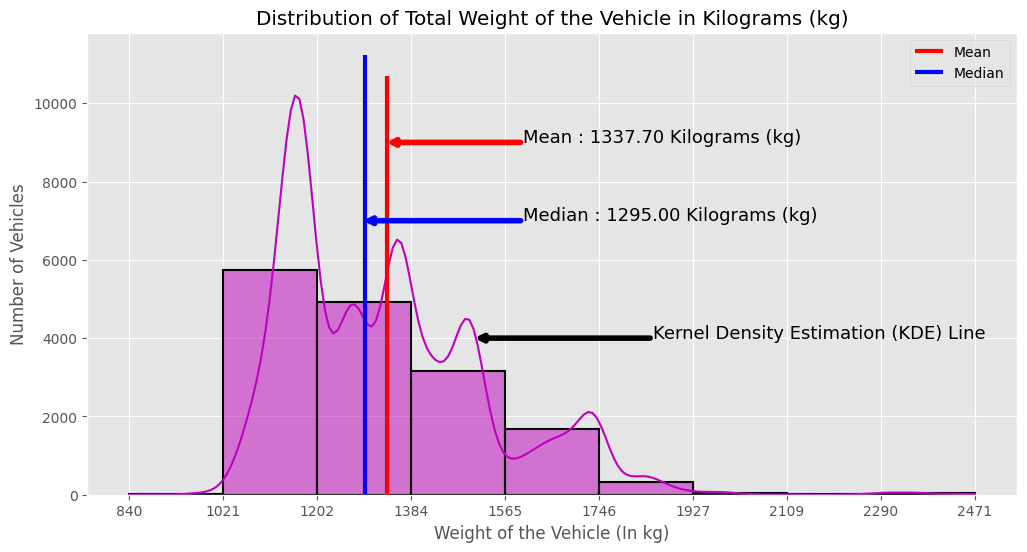

In [19]:
# Distribution of 4th Numerical Feature (Weight_kg) The total weight of the vehicle in kilograms.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
histogram_plot (
                dataframe=df, 
                feature= "Weight_kg", 
                title = "Distribution of Total Weight of the Vehicle in Kilograms (kg)",
                xlabel= "Weight of the Vehicle (In kg)",
                ylabel= "Number of Vehicles",
                kde_xy= (1500, 4000),
                kde_xytext= (1850, 4000),
                mean_xy= (1330, 9000),
                mean_xytext= (1600, 9000),
                median_xy= (1285, 7000),
                median_xytext= (1600, 7000),
                display_text= "Kilograms (kg)"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 4th Numerical Feature (kg)
log_progress ("4th Numerical Feature - Distribution of Total Weight of the Vehicle in Kilograms (kg)", "DEBUG")


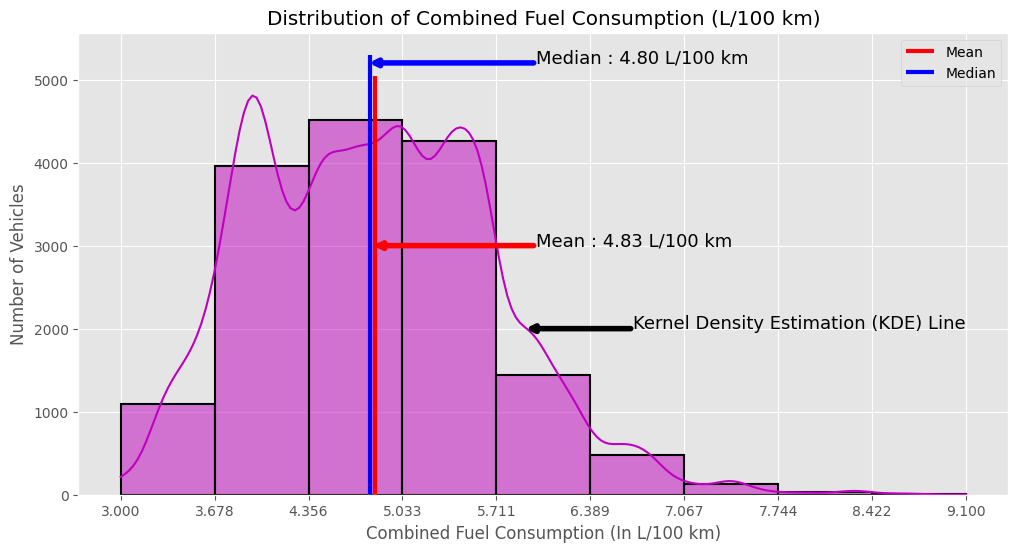

In [20]:
# Distribution of 5th Numerical Feature (cons_comb). The combined fuel consumption in liters per 100 kilometers.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
histogram_plot (
                dataframe=df, 
                feature= "cons_comb", 
                title = "Distribution of Combined Fuel Consumption (L/100 km)",
                xlabel= "Combined Fuel Consumption (In L/100 km)",
                ylabel= "Number of Vehicles",
                kde_xy= (5.9, 2000),
                kde_xytext= (6.7, 2000),
                mean_xy= (4.8, 3000),
                mean_xytext= (6, 3000),
                median_xy= (4.77, 5200),
                median_xytext= (6, 5200),
                display_text= "L/100 km"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 5th Numerical Feature (L/100 km)
log_progress ("5th Numerical Feature - Distribution of Combined Fuel Consumption (L/100 km)", "DEBUG")


Q1 (25th Percentile) for age 0 years.
Q2 (50th Percentile) Median for age 1 year.
Q3 (75th Percentile) for age 2 years.
Interquartile Range (IQR) for age 2 years.



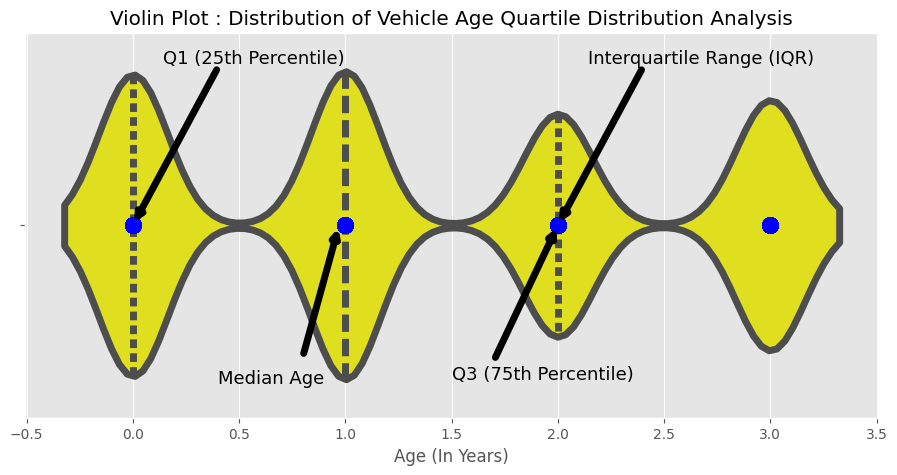

In [21]:
# Distribution of 6th Numerical Feature (age). Vehicle Age Distribution by Quartile
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Violin Plot of Vehicle Age Distribution

plt.figure (figsize= (11,5))
sns.violinplot(x= df["age"], data= df, color="yellow", inner= "quartiles", linewidth= 5)
sns.stripplot(data= df, x= "age", size=12, alpha= 0.5, jitter=False, color="blue")
plt.title ("Violin Plot : Distribution of Vehicle Age Quartile Distribution Analysis")
plt.xlabel ("Age (In Years)")

# Q1 (25th Percentile) (Arrow and Text Customization)
plt.annotate("", xy=(0.0, 0), xytext=(0.4, -0.41), arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color="black", lw=5))
plt.text(0.14, -0.42, f'Q1 (25th Percentile)', fontsize=13)

# Median Age (Arrow and Text Customization)
plt.annotate("", xy=(0.97, 0), xytext=(0.8, 0.34), arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color="black", lw=5))
plt.text(0.4, 0.41, f'Median Age', fontsize=13)

# Q3 (75th Percentile) (Arrow and Text Customization)
plt.annotate("", xy=(2.0, 0), xytext=(1.7, 0.35), arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color="black", lw=5))
plt.text(1.5, 0.4, f'Q3 (75th Percentile)', fontsize=13)

# Interquartile Range (IQR) (Arrow and Text Customization)
plt.annotate("", xy=(2.0, 0), xytext=(2.4, -0.41), arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color="black", lw=5))
plt.text(2.14, -0.42, f'Interquartile Range (IQR)', fontsize=13)

# Vehicle Age Quartile Statistical Summary of Distribution
print (f'Q1 (25th Percentile) for age {int (df["age"].quantile(0.25))} years.')
print (f'Q2 (50th Percentile) Median for age {int (df["age"].quantile(0.50))} year.')
print (f'Q3 (75th Percentile) for age {int (df["age"].quantile(0.75))} years.')
print (f'Interquartile Range (IQR) for age {int (df["age"].quantile(0.75) - df["age"].quantile(0.25))} years.\n')

# Plot a violin plot of Vehicle Age Distribution
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 6th Numerical Feature (Vehicle Age)
log_progress ("6th Numerical Feature - Distribution of Vehicle Age Quartile Distribution Analysis", "DEBUG")


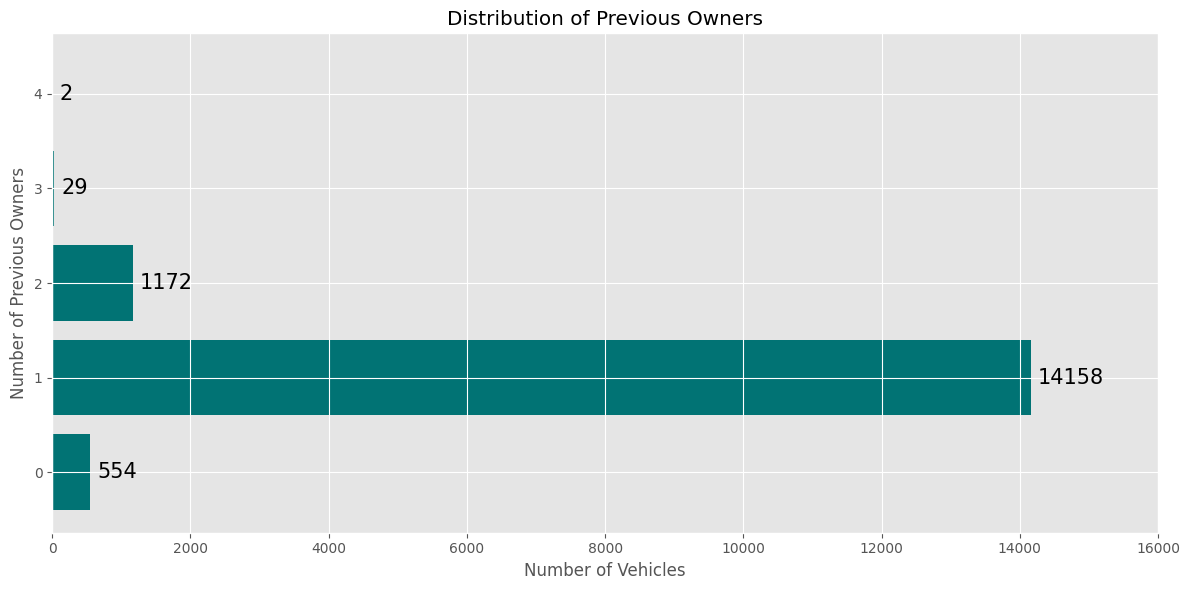

In [22]:
# Distribution of 7th Numerical Feature (Previous_Owners). The number of previous owners the car has had.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Series for Our Analysis
previous_owner_series = df ["Previous_Owners"].value_counts()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting Distribution of Previous Owners

plt.figure (figsize=(12,6))
container_bars = plt.barh(
                            previous_owner_series.index, 
                            previous_owner_series.values,
                            height = 0.8,
                            zorder = 0,
                            color = "xkcd:deep turquoise"
)
plt.title ("Distribution of Previous Owners")
plt.xlabel("Number of Vehicles")
plt.xticks(range(0,17000, 2000))
plt.ylabel("Number of Previous Owners")
plt.ticklabel_format(style= "plain", axis="x")

# Customization : Labelling for Bars
plt.bar_label(container= container_bars, padding= 5, fontsize= 15)
plt.tight_layout()

# Plotting the Bar Chart
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 7th Numerical Feature (Number of Previous Owners)
log_progress ("7th Numerical Feature - Distribution of Previous Owners", "DEBUG")
log_progress ("-------------- Completed Frequency Distributions of Numerical Features ---------------\n")


<span style="font-size:20px; font-weight:bold">Univariate Analysis – Categorical Features</span>

- This section explores the distribution of categorical variables to understand class balance, dominant categories, and overall patterns in the data.


In [23]:
# Identify categorical columns and check their frequency distributions
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Categorical features are as follows:-\n")

for i in categorical:
    print (i)

print ("\nThe Multi-Value Categorical features are as follows:-\n")
for i in multi_value_categorical:
    print (i)
    

The Categorical features are as follows:-

make_model
body_type
vat
Type
Fuel
Gears
Inspection_new
Paint_Type
Upholstery_type
Gearing_Type
Drive_chain

The Multi-Value Categorical features are as follows:-

Comfort_Convenience
Entertainment_Media
Extras
Safety_Security


In [24]:
# Custom Horizontal Bar Plot Reusable Function
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def horizontal_bar_plot(dataframe, feature, title, xlabel, ylabel, color, xticks_range):
    # Plotting a Horizontal Bar Chart --- Analyzing Frequency Distribution of Categorical Features
    # --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # Creating a Series for Our Analysis
    value_count_series = dataframe [f"{feature}"].value_counts()

    # --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # Plotting Frequency Distribution

    plt.figure (figsize=(12,6))
    container_bars = plt.barh(
                                value_count_series.index, 
                                value_count_series.values,
                                height = 0.8,
                                zorder = 0,
                                color = f"{color}"
    )
    plt.title (f"{title}")
    plt.xlabel(f"{xlabel}")
    plt.xticks(xticks_range)
    plt.ylabel(f"{ylabel}")
    plt.ticklabel_format(style= "plain", axis="x")

    # Customization : Labelling for Bars
    plt.bar_label(container= container_bars, padding= 5, fontsize= 15)
    plt.tight_layout()

    # Plotting the Bar Chart
    return plt.show()
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Custom Horizontal Bar Chart Reusable Function [Categorical Features]
log_progress ("------------------- Frequency Distributions of Categorical Features ------------------")
log_progress ("Custom Bar Chart Reusable Function - Analyzing categorical features.", "DEBUG")


**Distribution of Categorical Features**

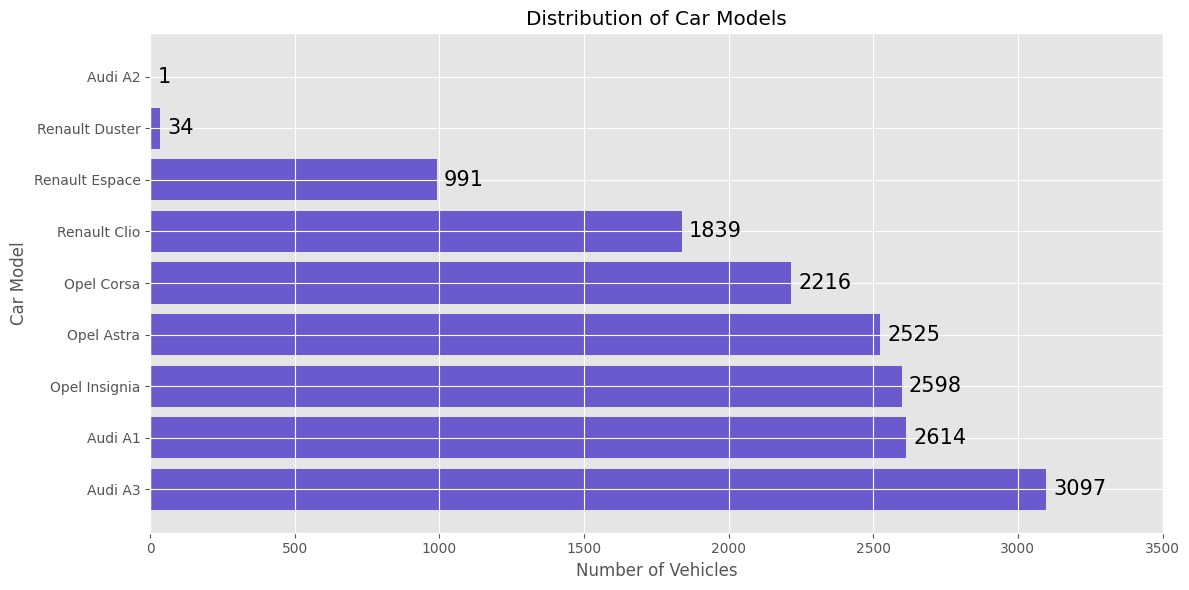

In [25]:
# Distribution of 1st Categorical Feature (make_model). The brand and model of the vehicle.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
horizontal_bar_plot (
                     dataframe=df, 
                     feature= "make_model", 
                     title = "Distribution of Car Models",
                     xlabel= "Number of Vehicles",
                     ylabel= "Car Model",
                     color= "slateblue",
                     xticks_range= range(0,4000,500)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 1st Categorical Feature (Car Models)
log_progress ("1st Categorical Feature - Distribution of Car Models", "DEBUG")


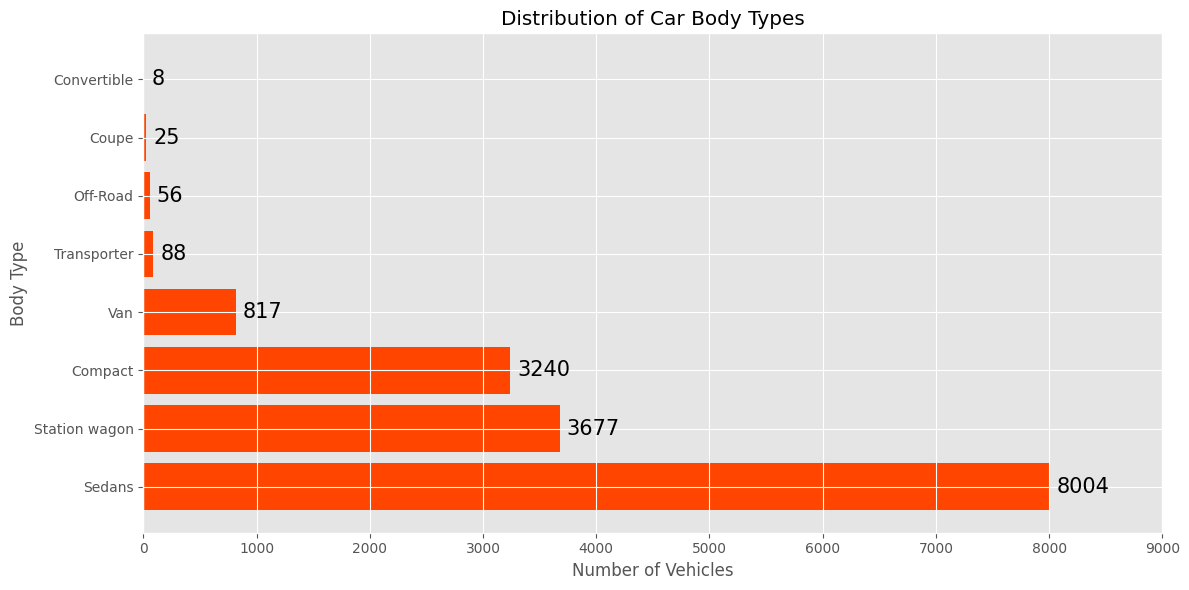

In [26]:
# Distribution of 2nd Categorical Feature (body_type). The Body Style of the Vehicle.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
horizontal_bar_plot (
                     dataframe=df, 
                     feature= "body_type", 
                     title = "Distribution of Car Body Types",
                     xlabel= "Number of Vehicles",
                     ylabel= "Body Type",
                     color= "orangered",
                     xticks_range= range(0,10000,1000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 2nd Categorical Feature (Car Body Types)
log_progress ("2nd Categorical Feature - Distribution of Car Body Types", "DEBUG")


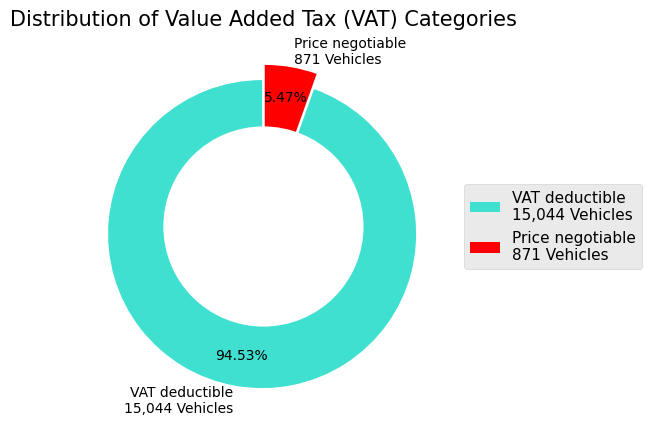

In [27]:
# Distribution of 3rd Categorical Feature (vat). Indicates the VAT status for the Vehicle's Price.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Distribution of VAT status (Temporary Series for Visualization)
vat_df = df ["vat"].value_counts()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Distribution using Pie Chart
plt.figure (figsize=(5,5))
plt.pie (vat_df.values, 
         labels = [f"{i}\n{actual_count:,} Vehicles" for i, actual_count in zip(vat_df.index, vat_df.values)],
         autopct = '%.2f%%',
         startangle= 90,
         pctdistance= 0.80,
         explode= [0.05, 0.05],
         colors= ["turquoise", "r"]
)
hole = plt.Circle ((0,0), 0.65, facecolor = "white")
plt.gcf().gca().add_artist(hole)
plt.title("Distribution of Value Added Tax (VAT) Categories", fontsize=15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)
plt.show ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 3rd Categorical Feature (Value Added Tax (VAT) Categories)
log_progress ("3rd Categorical Feature - Distribution of Value Added Tax (VAT) Categories", "DEBUG")


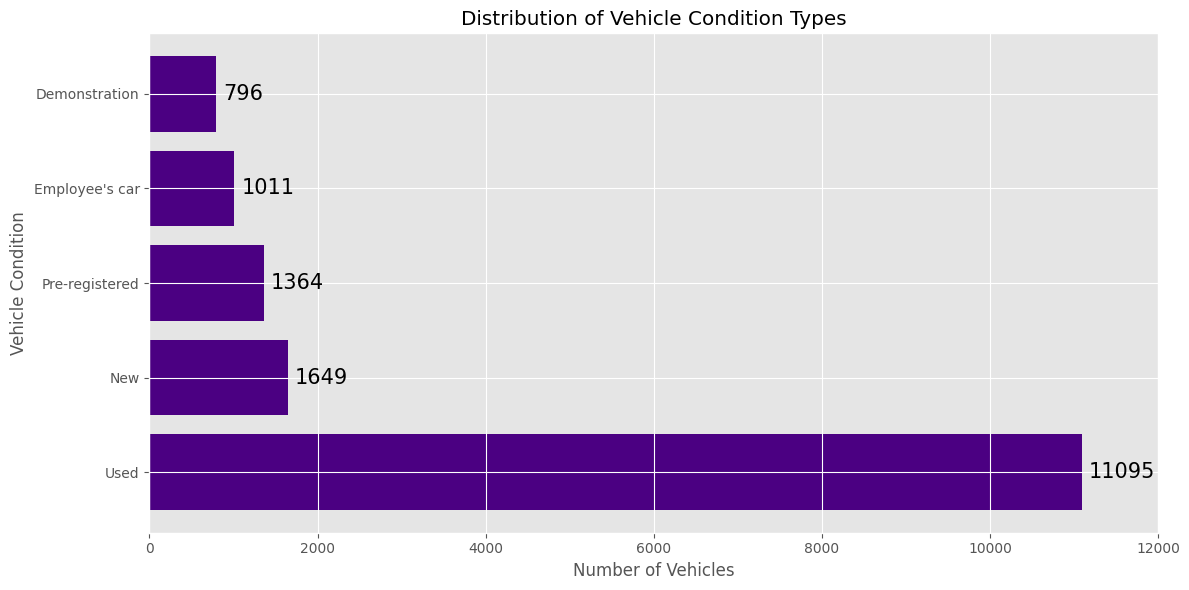

In [28]:
# Distribution of 4th Categorical Feature (Type). Condition of the vehicle (New, Old).
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
horizontal_bar_plot (
                     dataframe=df, 
                     feature= "Type", 
                     title = "Distribution of Vehicle Condition Types",
                     xlabel= "Number of Vehicles",
                     ylabel= "Vehicle Condition",
                     color= "indigo",
                     xticks_range= range(0,14000,2000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 4th Categorical Feature (Vehicle Condition Types)
log_progress ("4th Categorical Feature - Distribution of Vehicle Condition Types", "DEBUG")


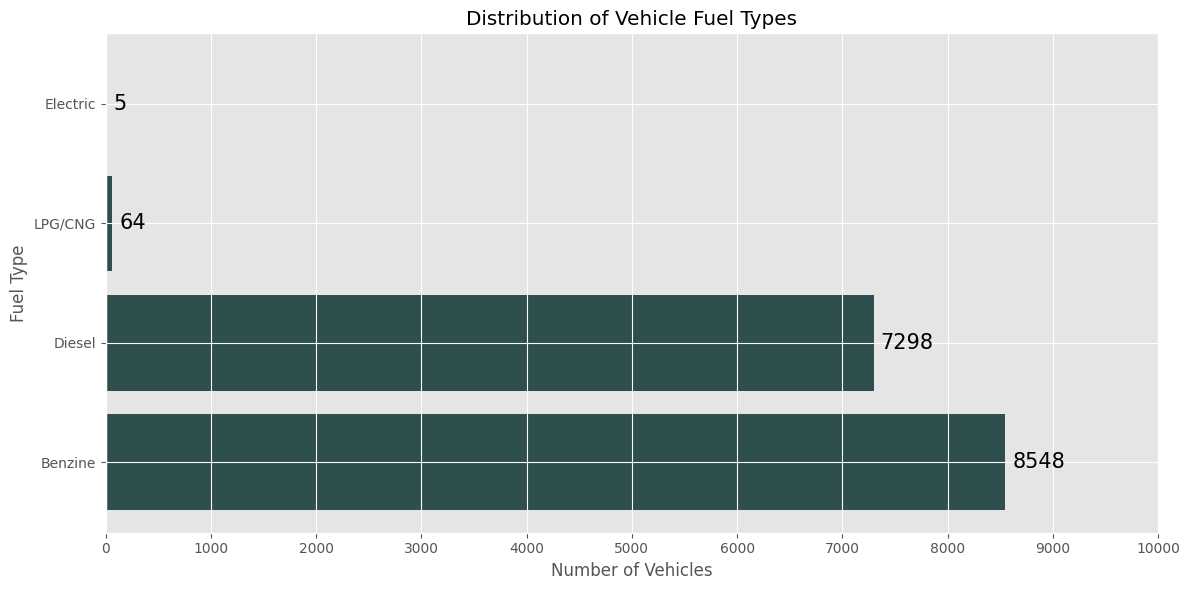

In [29]:
# Distribution of 5th Categorical Feature (Fuel). Type of Fuel the Vehicle uses ('Diesel', 'Benzine', etc.).
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
horizontal_bar_plot (
                     dataframe=df, 
                     feature= "Fuel", 
                     title = "Distribution of Vehicle Fuel Types",
                     xlabel= "Number of Vehicles",
                     ylabel= "Fuel Type",
                     color= "darkslategray",
                     xticks_range= range(0,11000,1000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 5th Categorical Feature (Vehicle Fuel Types)
log_progress ("5th Categorical Feature - Distribution of Vehicle Fuel Types", "DEBUG")


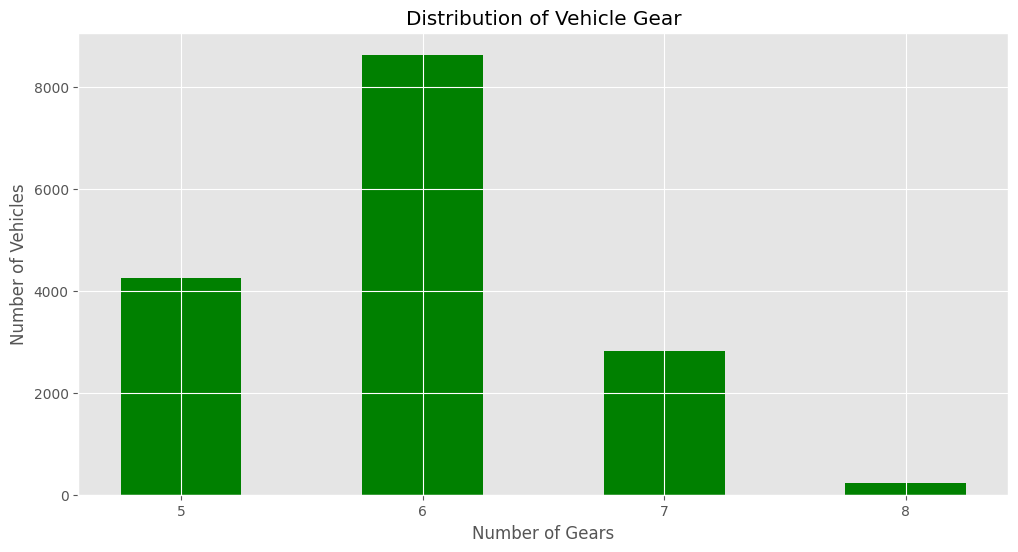

In [30]:
# Distribution of 6th Categorical Feature (Gears). The Number of Gears in the Vehicle's Transmission.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary Series for Visualization
gear_count_series = df.Gears.value_counts()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Number of Gears in the Vehicle's Transmission

plt.figure (figsize=(12,6))
plt.bar(
        gear_count_series.index, 
        gear_count_series.values,
        color = "green",
        width = 0.5,
        zorder = 0
)
plt.title ("Distribution of Vehicle Gear")
plt.xlabel("Number of Gears")
plt.xticks(range(5,9,1))
plt.ylabel("Number of Vehicles")
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 6th Categorical Feature (Vehicle Gear - Number of Gears)
log_progress ("6th Categorical Feature - Distribution of Vehicle Gear", "DEBUG")


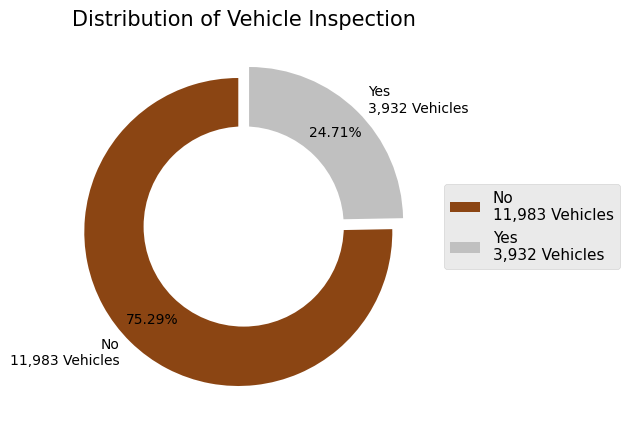

In [31]:
# Distribution of 7th Categorical Feature (Inspection_new). Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no).
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Distribution of Vehicle Inspection (Temporary Series for Visualization)
inspection_new_df = df ["Inspection_new"].value_counts()
inspection_map = {1: "Yes", 0: "No"}
inspection_new_df.index = inspection_new_df.index.map(inspection_map)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Distribution using Pie Chart
plt.figure (figsize=(5,5))
plt.pie (inspection_new_df.values, 
         labels = [f"{i}\n{actual_count:,} Vehicles" for i, actual_count in zip(inspection_new_df.index, inspection_new_df.values)],
         autopct = '%.2f%%',
         startangle= 90,
         pctdistance= 0.80,
         explode= [0.05, 0.05],
         colors= ["saddlebrown", "silver"]
)
hole = plt.Circle ((0,0), 0.65, facecolor = "white")
plt.gcf().gca().add_artist(hole)
plt.title("Distribution of Vehicle Inspection", fontsize=15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)
plt.show ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 7th Categorical Feature (Vehicle Inspection)
log_progress ("7th Categorical Feature - Distribution of Vehicle Inspection", "DEBUG")


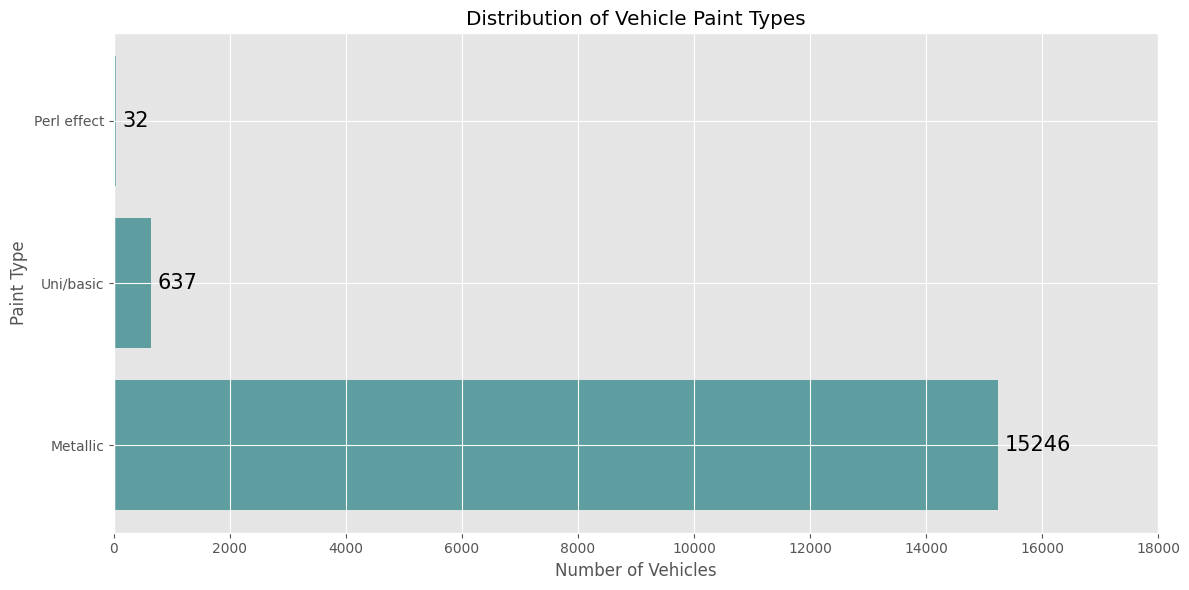

In [32]:
# Distribution of 8th Categorical Feature (Paint_Type). The type of paint on the car, such as ('Metallic', 'Matte', etc.)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
horizontal_bar_plot (
                     dataframe=df, 
                     feature= "Paint_Type", 
                     title = "Distribution of Vehicle Paint Types",
                     xlabel= "Number of Vehicles",
                     ylabel= "Paint Type",
                     color= "cadetblue",
                     xticks_range= range(0,20000,2000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 8th Categorical Feature (Paint Types)
log_progress ("8th Categorical Feature - Distribution of Vehicle Paint Types", "DEBUG")


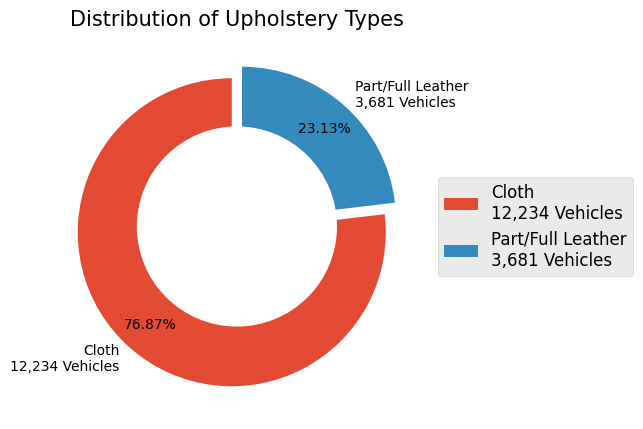

In [33]:
# Distribution of 9th Categorical Feature (Upholstery_type). The Material used for the Interior Upholstery, such as ('Cloth', 'Leather', etc.)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Distribution of Upholstery Types
upholstery_type_df = df ["Upholstery_type"].value_counts()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Distribution using Pie Chart
plt.figure (figsize=(5,5))
plt.pie (upholstery_type_df.values, 
         labels = [f"{i}\n{actual_count:,} Vehicles" for i, actual_count in zip(upholstery_type_df.index, upholstery_type_df.values)],
         autopct = '%.2f%%',
         startangle= 90,
         pctdistance= 0.80,
         explode= [0.05, 0.05]
)
hole = plt.Circle ((0,0), 0.65, facecolor = "white")
plt.gcf().gca().add_artist(hole)
plt.title("Distribution of Upholstery Types", fontsize=15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 9th Categorical Feature (Upholstery Types)
log_progress ("9th Categorical Feature - Distribution of Upholstery Types", "DEBUG")


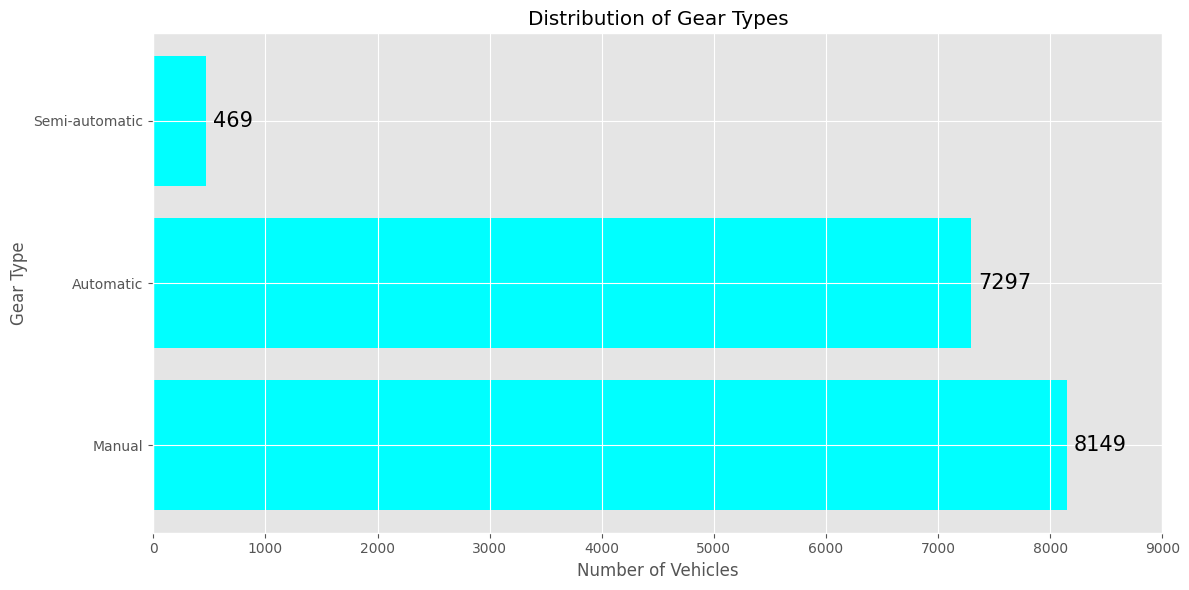

In [34]:
# Distribution of 10th Categorical Feature (Gearing_Type). The Type of Transmission the car uses, either ('Automatic' or 'Manual').
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
horizontal_bar_plot (
                     dataframe=df, 
                     feature= "Gearing_Type", 
                     title = "Distribution of Gear Types",
                     xlabel= "Number of Vehicles",
                     ylabel= "Gear Type",
                     color= "aqua",
                     xticks_range= range(0,10000,1000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 10th Categorical Feature (Gear Type)
log_progress ("10th Categorical Feature - Distribution of Gear Types", "DEBUG")


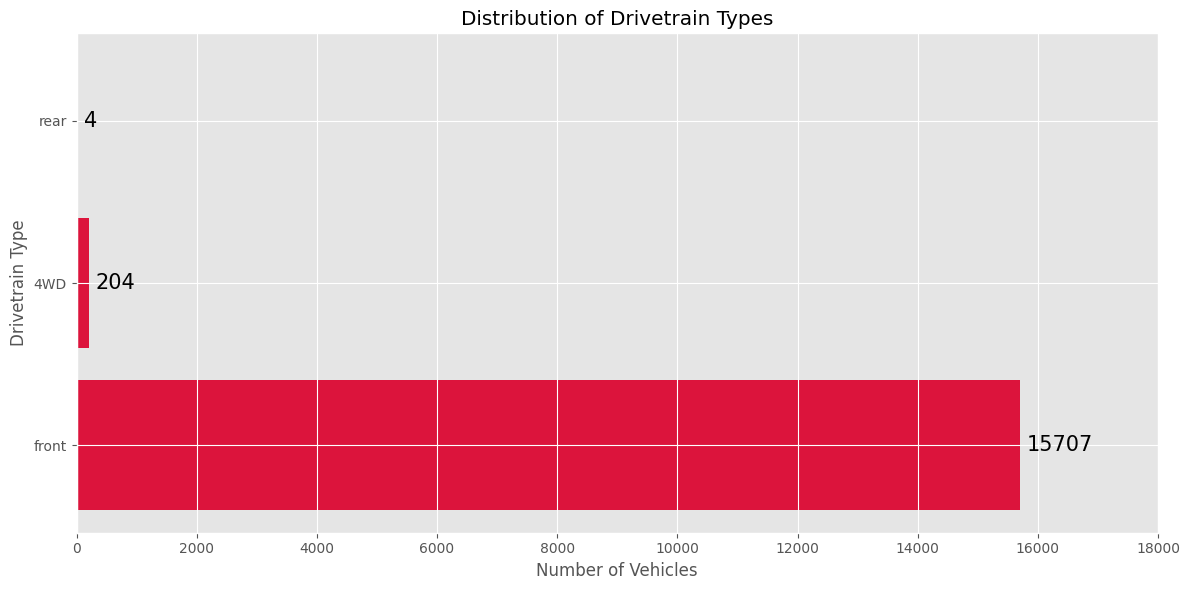

Feature --> Drive_chain is incorrect --> Change to Drive_train


In [35]:
# Distribution of 11th Categorical Feature (Drive_chain). The Type of Drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
horizontal_bar_plot (
                     dataframe=df, 
                     feature= "Drive_chain", 
                     title = "Distribution of Drivetrain Types",
                     xlabel= "Number of Vehicles",
                     ylabel= "Drivetrain Type",
                     color= "crimson",
                     xticks_range= range(0,20000,2000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 11th Categorical Feature (Drivetrain Types)
log_progress ("11th Categorical Feature - Distribution of Drivetrain Types", "DEBUG")
log_progress ("Feature --> Drive_chain is incorrect --> Change to Drive_train", "WARNING")

log_progress ("-------------- Completed Frequency Distributions of Categorical Features --------------\n")


<span style="font-size:20px; font-weight:bold">Univariate Analysis – Multi-Categorical Features</span>

- This section analyses the distribution of sub-features derived from bundled categorical attributes (e.g., safety, comfort, and entertainment specifications) to better understand feature prevalence across the dataset.


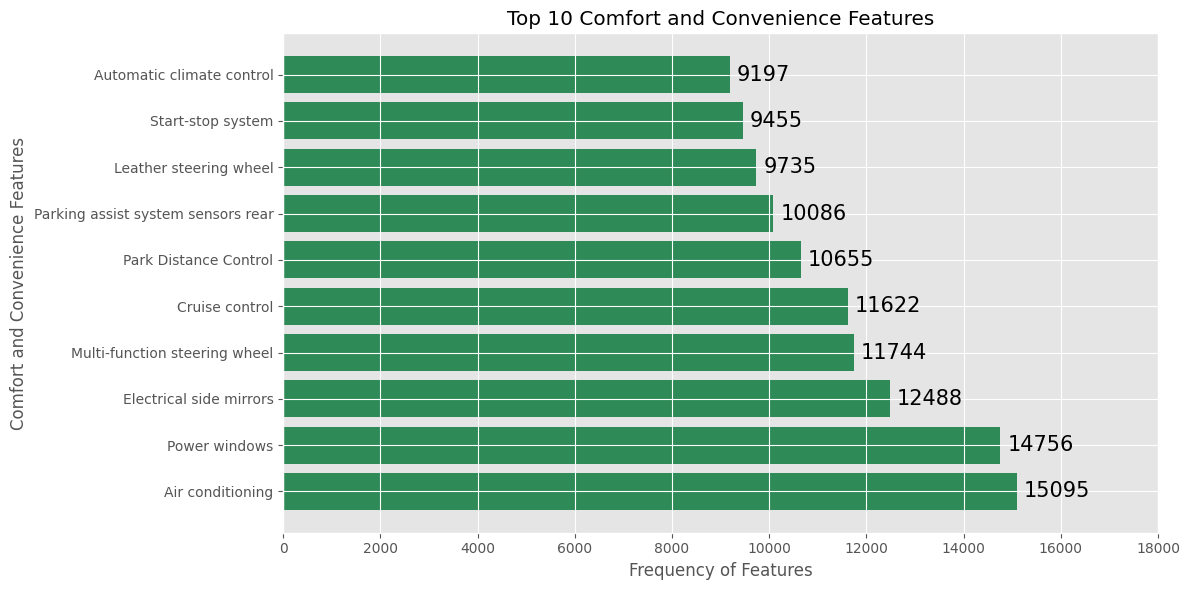

In [36]:
# Distribution of 1st Multi-Categorical Feature (Comfort_Convenience). Comfort and Convenience features, ('Air conditioning', 'Leather steering wheel', 'Cruise control', and more.)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Preparing Multi-Categorical Feature Comfort Convenience For Visualization (Top 10)
comfort_series = df ["Comfort_Convenience"].str.split(",").explode().str.strip()

top10_comfort_values = comfort_series.value_counts(ascending=False).head(10).index.to_list()

top10_comfort_df = pd.DataFrame (comfort_series [comfort_series.isin(top10_comfort_values)])

horizontal_bar_plot (
                     dataframe= top10_comfort_df, 
                     feature= "Comfort_Convenience", 
                     title = "Top 10 Comfort and Convenience Features",
                     xlabel= "Frequency of Features",
                     ylabel= "Comfort and Convenience Features",
                     color= "seagreen",
                     xticks_range= range(0,20000,2000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 1st Multi-Categorical Feature (Comfort and Convenience Features)
log_progress ("---------------- Frequency Distributions of Multi-Categorical Features ----------------")
log_progress ("1st Multi-Categorical Feature - Top 10 Comfort and Convenience Features", "DEBUG")


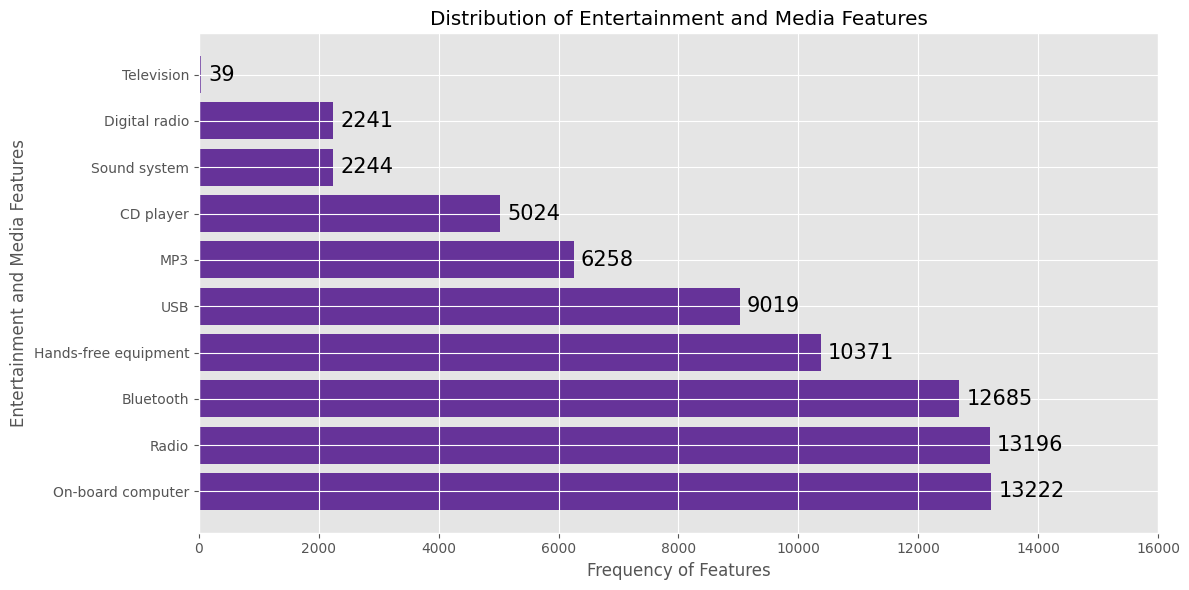

In [37]:
# Distribution of 2nd Multi-Categorical Feature (Comfort_Convenience). Media features available in the vehicle, ('Bluetooth', 'MP3', 'Radio', etc.)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Preparing Multi-Categorical Feature Comfort Convenience For Visualization (Top 10)
entertainment_series = df ["Entertainment_Media"].str.split(",").explode().str.strip()

entertainment_values = entertainment_series.value_counts(ascending=False).index.to_list()

entertainment_df = pd.DataFrame (entertainment_series [entertainment_series.isin(entertainment_values)])

horizontal_bar_plot (
                     dataframe= entertainment_df, 
                     feature= "Entertainment_Media", 
                     title = "Distribution of Entertainment and Media Features",
                     xlabel= "Frequency of Features",
                     ylabel= "Entertainment and Media Features",
                     color= "rebeccapurple",
                     xticks_range= range(0,18000,2000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 2nd Multi-Categorical Feature (Entertainment and Media Features)
log_progress ("2nd Multi-Categorical Feature - Distribution of Entertainment and Media Features", "DEBUG")


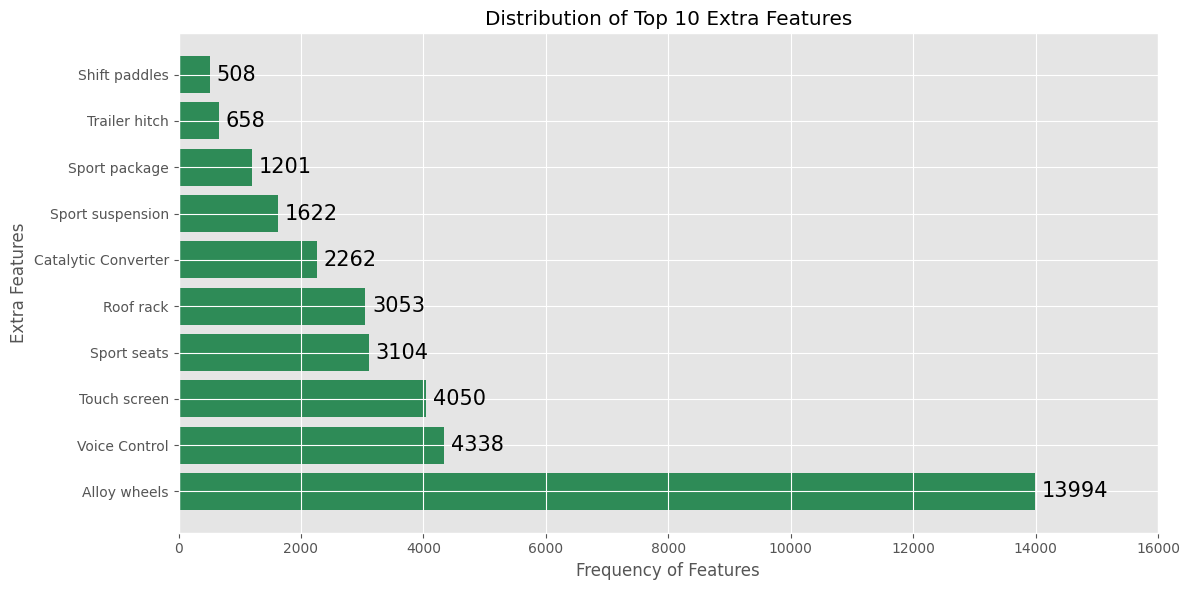

In [38]:
# Distribution of 3rd Multi-Categorical Feature (Extras). Additional features like ('Alloy wheels', 'Sport suspension', etc.)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Preparing Multi-Categorical Feature Comfort Convenience For Visualization (Top 10)
extras_series = df ["Extras"].str.split(",").explode().str.strip()

top10_extras_values = extras_series.value_counts(ascending=False).head(10).index.to_list()

top10_extras_df = pd.DataFrame (extras_series [extras_series.isin(top10_extras_values)])

horizontal_bar_plot (
                     dataframe= top10_extras_df, 
                     feature= "Extras", 
                     title = "Distribution of Top 10 Extra Features",
                     xlabel= "Frequency of Features",
                     ylabel= "Extra Features",
                     color= "seagreen",
                     xticks_range= range(0,18000,2000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 3rd Multi-Categorical Feature (Extra Features)
log_progress ("3rd Multi-Categorical Feature - Distribution of Top 10 Extra Features", "DEBUG")


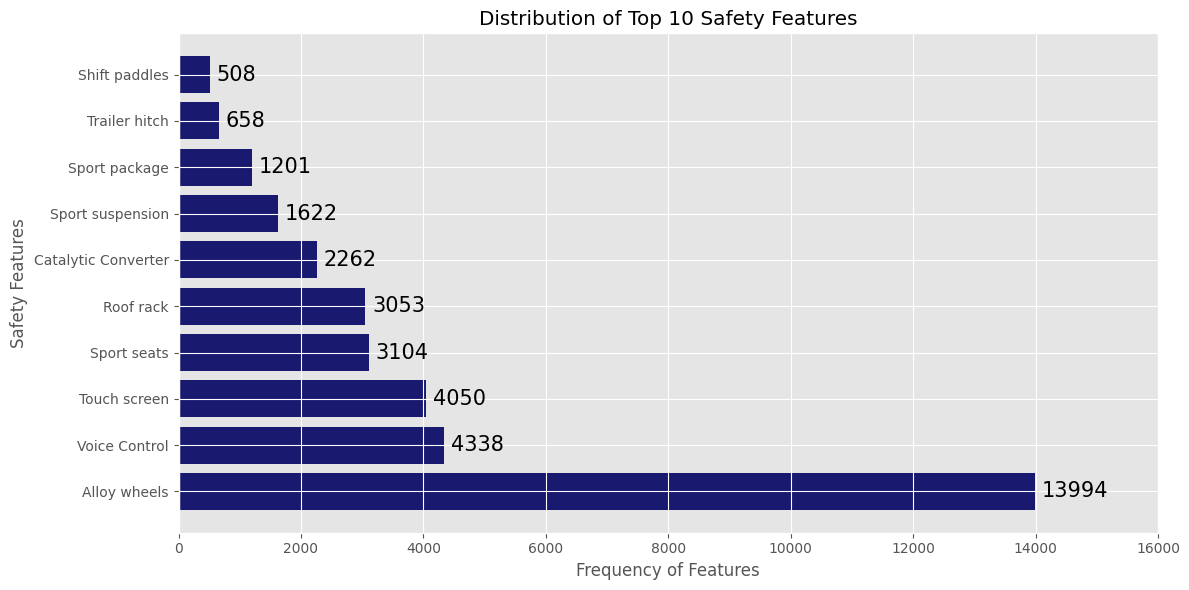

In [39]:
# Distribution of 4th Multi-Categorical Feature (Safety_Security). Safety features like ('ABS', 'Airbags', 'Isofix', etc.)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Preparing Multi-Categorical Feature Comfort Convenience For Visualization (Top 10)
safety_series = df ["Extras"].str.split(",").explode().str.strip()

top10_safety_values = safety_series.value_counts(ascending=False).head(10).index.to_list()

top10_safety_df = pd.DataFrame (safety_series [safety_series.isin(top10_safety_values)])

horizontal_bar_plot (
                     dataframe= top10_safety_df, 
                     feature= "Extras", 
                     title = "Distribution of Top 10 Safety Features",
                     xlabel= "Frequency of Features",
                     ylabel= "Safety Features",
                     color= "midnightblue",
                     xticks_range= range(0,18000,2000)
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of 4th Multi-Categorical Feature (Safety Features)
log_progress ("4th Multi-Categorical Feature - Distribution of Top 10 Safety Features", "DEBUG")

log_progress ("----------- Completed Frequency Distributions of Multi-Categorical Features -----------\n")


<span style="font-size:20px; font-weight:bold">Handling Class Imbalance & Rare Categories</span>

Several categorical variables exhibited strong class imbalance, with certain categories appearing very infrequently. To improve model stability and reduce noise, low-frequency categories were consolidated into an "Other" group where appropriate.

For bundled feature columns such as Comfort_Convenience, Entertainment_Media, Extras, and Safety_Security, the values were treated as multi-valued categorical data rather than standard categorical variables. These columns were retained, and appropriate feature engineering techniques were applied at a later stage to extract meaningful information.


In [40]:
# Custom Function : Visualize Class Imbalance before and after fixing.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def plot_donut_plot_class_imbalance(before_series, after_series, before_title, after_title, main_title, before_color, after_color, before_explode, after_explode, after_legend_loc):

    # Validate Explode
    if ((len (before_explode)) != (len (before_series))):
        raise ValueError (f"Length Mismatch: `before_explode` {len(before_explode)} != `before_series` {len(before_series)}")
    
    elif ((len (after_explode)) != (len (after_series))):
        raise ValueError (f"Length Mismatch: `after_explode` {len(after_explode)} != `after_series` {len(after_series)}")

    # Validate Colors
    if ((len (before_color)) != (len (before_series))): 
        raise ValueError (f"Length Mismatch: `before_color` {len(before_color)} != `before_series` {len(before_series)}")
        
    elif ((len (after_color)) != (len (after_series))):
        raise ValueError (f"Length Mismatch: `after_color` {len(after_color)} != `after_series` {len(after_series)}")
    
    plt.figure (figsize=(15,7))
    ax1 = plt.subplot (1,2,1)
    # Plotting the Distribution using Donut Chart (Before Fixing Class Imbalance)
    ax1.pie (before_series.values, 
             labels = None,
             startangle= 90,
             pctdistance= 0.80,
             explode= before_explode,
             colors= before_color
    )
    hole = plt.Circle ((0,0), 0.65, facecolor = "white")
    ax1.add_artist(hole)
    ax1.set_title(before_title, fontsize=15)
    ax1.legend([f"{i} - {actual_count / before_series.sum() * 100:.2f} %\n{actual_count:,} Vehicles" 
                for i, actual_count in zip(before_series.index, before_series.values)],
                loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)


    # Plotting the Distribution using Donut Chart (After Fixing Class Imbalance)
    ax2 = plt.subplot (1,2,2, sharey= ax1)
    ax2.pie (after_series.values, 
             labels = None,
             autopct = '%.2f%%',
             startangle= 90,
             pctdistance= 0.80,
             explode= after_explode,
             colors= after_color
    )
    hole = plt.Circle ((0,0), 0.65, facecolor = "white")
    ax2.add_artist(hole)
    ax2.set_title(after_title, fontsize=15)
    ax2.legend([f"{i} - {actual_count / after_series.sum() * 100:.2f} %\n{actual_count:,} Vehicles" 
                for i, actual_count in zip(after_series.index, after_series.values)],
                loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
    
    # Border Lines
    for axis in (ax1,ax2):
        axis.set_frame_on(True)
        axis.set_facecolor("seashell")
        
        for lines in axis.spines.values():
            lines.set_edgecolor("black")
            lines.set_linewidth(2)
        
    plt.suptitle(f"{main_title}", fontsize=25) 
    plt.tight_layout() 
    return plt.show()
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Custom Comparison Pie Chart Reusable Function [Class Imbalance]
log_progress ("------------------------- Analyzing and Fixing Class Imbalance ------------------------")
log_progress ("Custom Comparison Pie Chart Reusable Function - Analyzing  Class Imbalance.", "DEBUG")


Before Fixing Class Imbalances of Paint Type:-

Paint_Type
Metallic       15246
Uni/basic        637
Perl effect       32
Name: count, dtype: int64

After Fixing Class Imbalances of Paint Type:-

Paint_Type
Metallic        15246
Non-Metallic      669
Name: count, dtype: int64


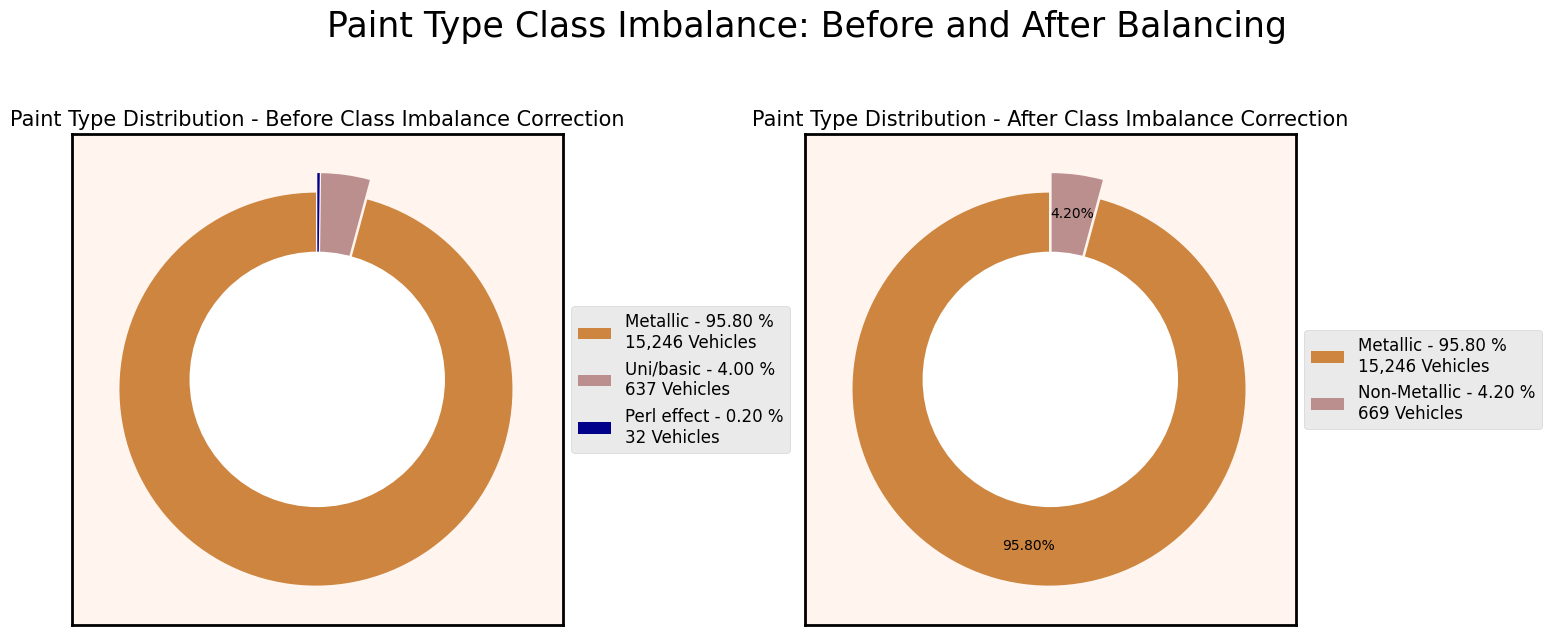

In [41]:
# First Feature Class Imbalance (Paint Type)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fixing Class Imbalances in Paint_Type
# This was done by classifying them into 2 Main Groups (Metallic and Non-Metallic)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
before_paint_series = df ["Paint_Type"].value_counts()
print ("Before Fixing Class Imbalances of Paint Type:-\n")
print (before_paint_series)

df ["Paint_Type"] = df ["Paint_Type"].apply (lambda x: "Non-Metallic" if x.strip() in ["Uni/basic", "Perl effect"] else x)

after_paint_series = df ["Paint_Type"].value_counts()
print ("\nAfter Fixing Class Imbalances of Paint Type:-\n")
print (after_paint_series)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 1 : Class Imbalance in Paint Type Feature

plot_donut_plot_class_imbalance(
                                before_series= before_paint_series, 
                                after_series= after_paint_series, 
                                before_title= "Paint Type Distribution - Before Class Imbalance Correction", 
                                after_title= "Paint Type Distribution - After Class Imbalance Correction", 
                                main_title= "Paint Type Class Imbalance: Before and After Balancing", 
                                before_color= ["peru", "rosybrown", "darkblue"], 
                                after_color= ["peru", "rosybrown"], 
                                before_explode= [0.05, 0.05, 0.05], 
                                after_explode= [0.05, 0.05],
                                after_legend_loc= "center left"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: 1st Feature with Class Imbalance (Paint Type)
log_progress ("1st Feature with Class Imbalance : Paint Type [Analyzed and Fixed]", "DEBUG")


Before Fixing Class Imbalances of Drive Chain:-

Drivetrain
front    15707
4WD        204
rear         4
Name: count, dtype: int64

After Fixing Class Imbalances of Drive Chain:-

Drivetrain
Front-Wheel Drive (FWD)            15707
Non-Front-Wheel Drive (RWD/4WD)      208
Name: count, dtype: int64


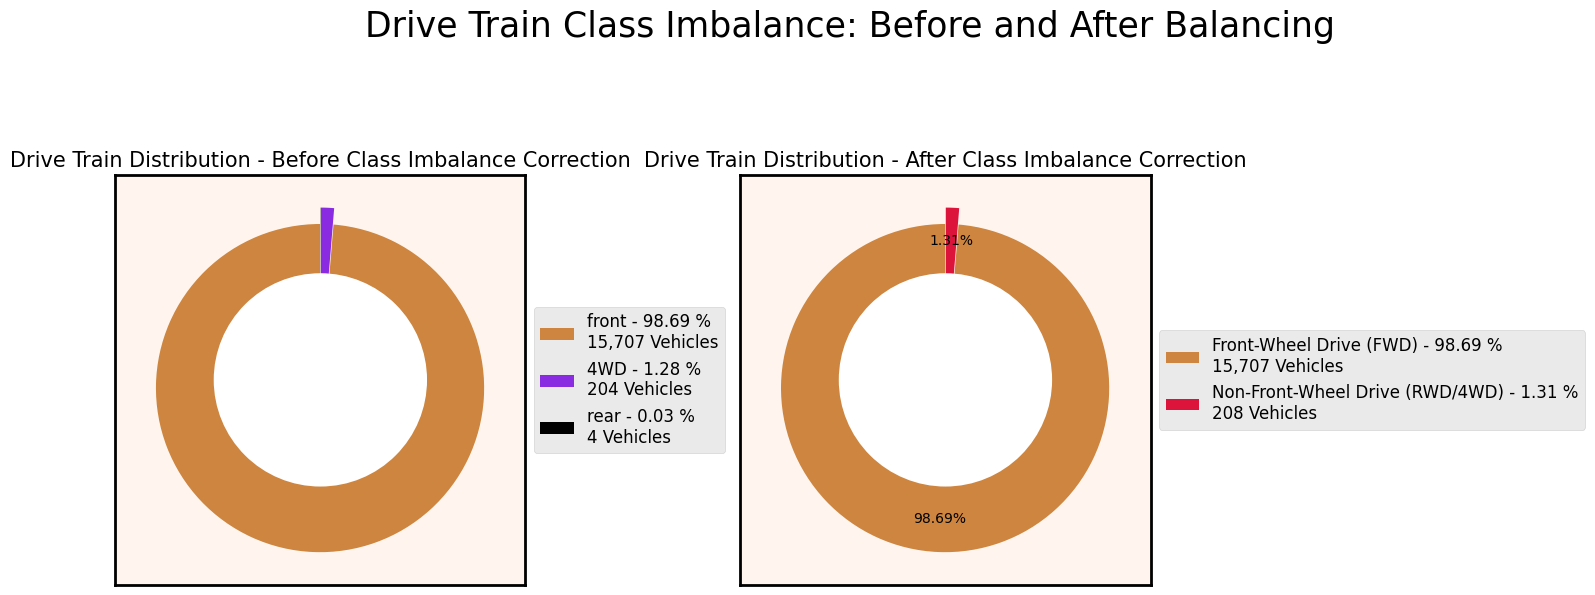

In [42]:
# Second Feature Class Imbalance (Drive Train)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Renaming the feature correctly
df.rename (columns= {"Drive_chain" : "Drivetrain"}, inplace= True)
categorical [categorical.index("Drive_chain")] = "Drivetrain"
log_progress ("Feature --> Drive_chain --> Changed to Drivetrain", "INFO")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fixing Class Imbalances in Drive_chain
# This was done by classifying them into 2 Main Groups (Front-Wheel Drive (FWD) and Non-Front-Wheel-Drive)

before_drive_chain_series = df ["Drivetrain"].value_counts()
print ("Before Fixing Class Imbalances of Drive Chain:-\n")
print (before_drive_chain_series)

df ["Drivetrain"] = df ["Drivetrain"].apply (lambda x: "Non-Front-Wheel Drive (RWD/4WD)" if x.strip() in ["rear", "4WD"] else "Front-Wheel Drive (FWD)")

after_drive_chain_series = df ["Drivetrain"].value_counts()
print ("\nAfter Fixing Class Imbalances of Drive Chain:-\n")
print (after_drive_chain_series)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 2 : Class Imbalance in Drive Train Feature

plot_donut_plot_class_imbalance(
                                before_series= before_drive_chain_series, 
                                after_series= after_drive_chain_series, 
                                before_title= "Drive Train Distribution - Before Class Imbalance Correction", 
                                after_title= "Drive Train Distribution - After Class Imbalance Correction", 
                                main_title= "Drive Train Class Imbalance: Before and After Balancing", 
                                before_color= ["peru", "blueviolet", "black"], 
                                after_color= ["peru", "crimson"], 
                                before_explode= [0.05, 0.05, 0.05], 
                                after_explode= [0.05, 0.05],
                                after_legend_loc= "center left"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: 2nd Feature with Class Imbalance (Drive Train)
log_progress ("2nd Feature with Class Imbalance : Drive Train [Analyzed and Fixed]", "DEBUG")


Before Fixing Class Imbalances of Vehicles Brand/Model:-

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

After Fixing Class Imbalances of Vehicles Brand/Model:-

make_model
Opel       7339
Audi       5712
Renault    2864
Name: count, dtype: int64


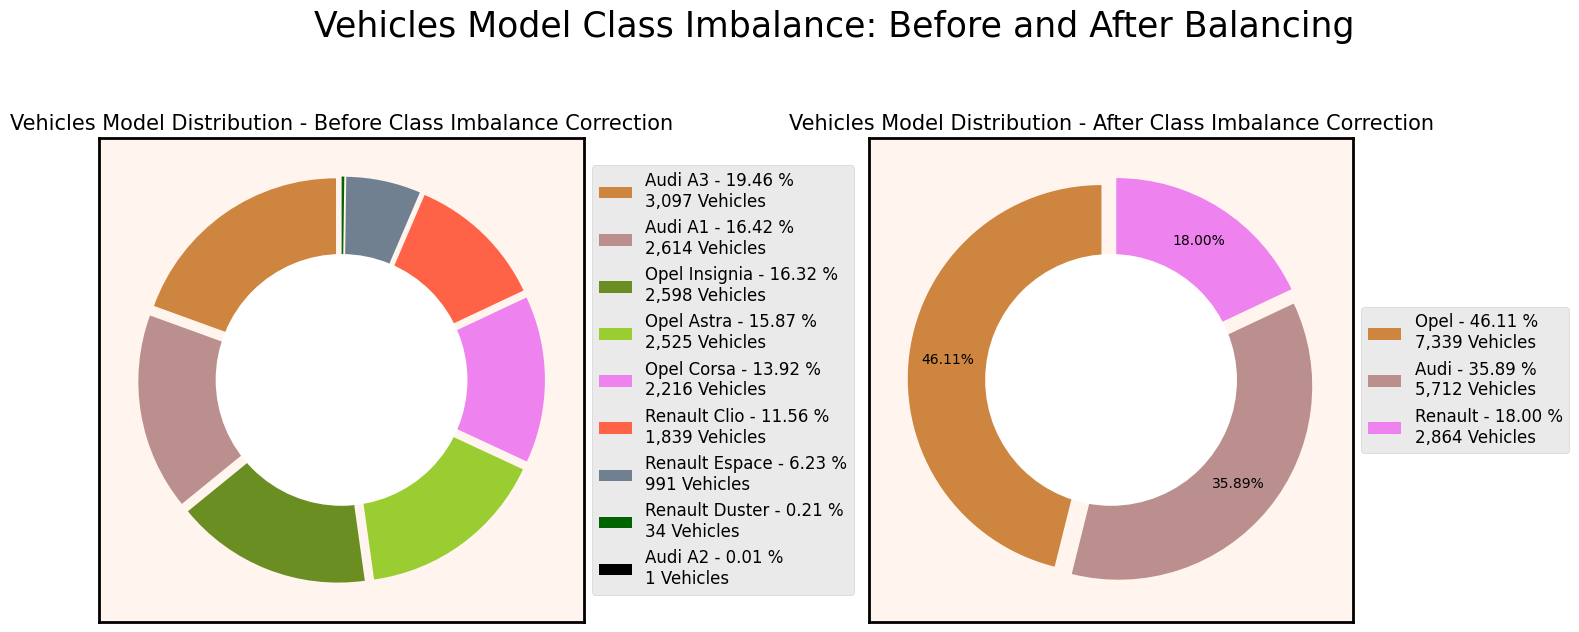

In [43]:
# Third Feature Class Imbalance (Model)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fixing Class Imbalances in make_model
# This was done by classifying them into 3 Main Models (Audi, Opel and Renault)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
before_make_model_series = df ["make_model"].value_counts()
print ("Before Fixing Class Imbalances of Vehicles Brand/Model:-\n")
print (before_make_model_series)

df ["make_model"] = df ["make_model"].apply(lambda x: "Audi" 
                                            if "audi" in x.strip().lower()
                                            else ("Opel" if "opel" in x.strip().lower()
                                            else ("Renault" if "renault" in x.strip().lower() else x)))

after_make_model_series = df ["make_model"].value_counts()
print ("\nAfter Fixing Class Imbalances of Vehicles Brand/Model:-\n")
print (after_make_model_series)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 3 : Class Imbalance in Vehicles Model Feature

plot_donut_plot_class_imbalance(
                                before_series= before_make_model_series, 
                                after_series= after_make_model_series, 
                                before_title= "Vehicles Model Distribution - Before Class Imbalance Correction", 
                                after_title= "Vehicles Model Distribution - After Class Imbalance Correction", 
                                main_title= "Vehicles Model Class Imbalance: Before and After Balancing", 
                                before_color= ["peru", "rosybrown", "olivedrab", "yellowgreen", "violet", "tomato", "slategray", "darkgreen", "black"], 
                                after_color= ["peru", "rosybrown", "violet"], 
                                before_explode= [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 
                                after_explode= [0.05, 0.05, 0.05],
                                after_legend_loc= "center left"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: 3rd Feature with Class Imbalance (Vehicles Model)
log_progress ("3rd Feature with Class Imbalance : Vehicles Model [Analyzed and Fixed]", "DEBUG")


Before Fixing Class Imbalances of Vehicles Gearing Type:-

Gearing_Type
Manual            8149
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

After Fixing Class Imbalances of Vehicles Gearing Type:-

Gearing_Type
Manual                          8149
Automatic and Semi-Automatic    7766
Name: count, dtype: int64


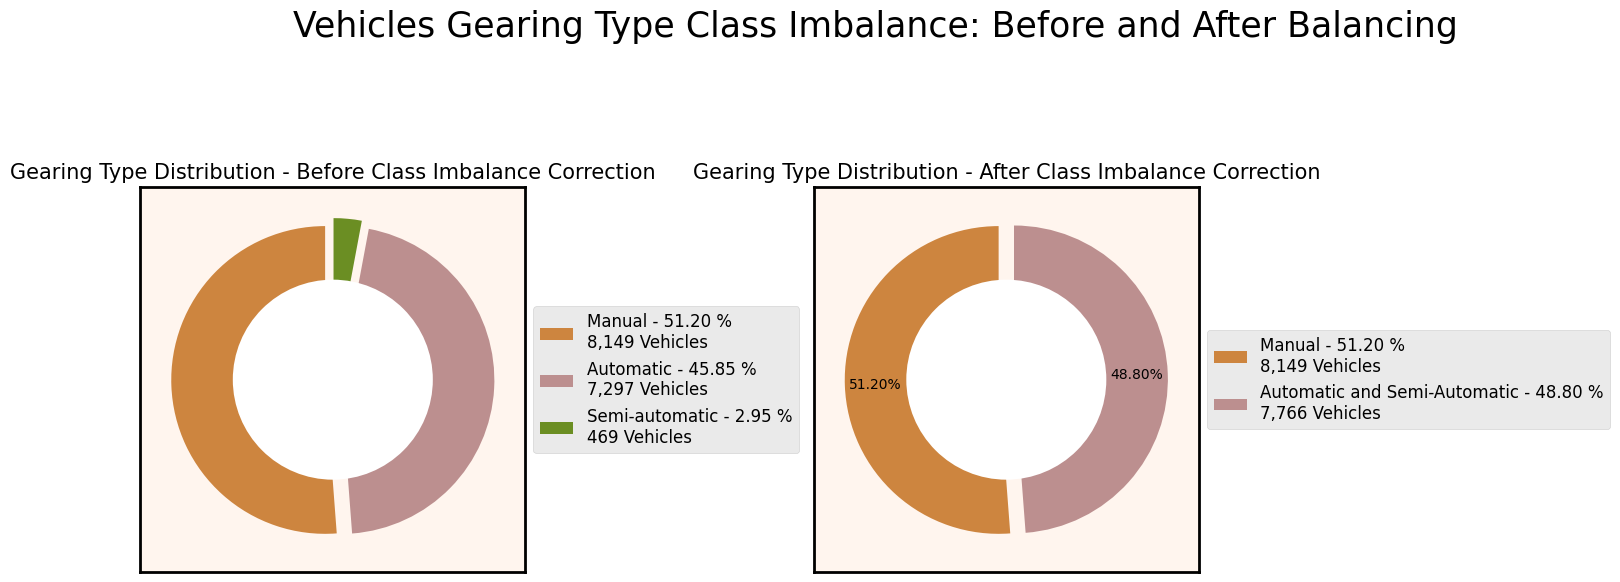

In [44]:
# Fourth Feature Class Imbalance (Gearing Type)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fixing Class Imbalances in Gearing_Type
# This was done by classifying them into 2 Gearing Types ('Manual' and 'Automatic and Semi-Automatic')
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
before_gearing_type_series = df ["Gearing_Type"].value_counts()
print ("Before Fixing Class Imbalances of Vehicles Gearing Type:-\n")
print (before_gearing_type_series)

df ["Gearing_Type"] = df ["Gearing_Type"].apply(lambda x: "Manual" 
                                                if "manual" in x.strip().lower()
                                                else ("Automatic and Semi-Automatic" if ("automatic" in x.strip().lower()) or
                                                     ("semi-automatic" in x.strip().lower()) else x))

after_gearing_type_series = df ["Gearing_Type"].value_counts()
print ("\nAfter Fixing Class Imbalances of Vehicles Gearing Type:-\n")
print (after_gearing_type_series)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 4 : Class Imbalance in Vehicles Gearing Type Feature

plot_donut_plot_class_imbalance(
                                before_series= before_gearing_type_series, 
                                after_series= after_gearing_type_series, 
                                before_title= "Gearing Type Distribution - Before Class Imbalance Correction", 
                                after_title= "Gearing Type Distribution - After Class Imbalance Correction", 
                                main_title= "Vehicles Gearing Type Class Imbalance: Before and After Balancing", 
                                before_color= ["peru", "rosybrown", "olivedrab"], 
                                after_color= ["peru", "rosybrown"], 
                                before_explode= [0.05, 0.05, 0.05], 
                                after_explode= [0.05, 0.05],
                                after_legend_loc= "upper center"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: 4th Feature with Class Imbalance (Vehicles Gearing Type)
log_progress ("4th Feature with Class Imbalance : Vehicles Gearing Type [Analyzed and Fixed]", "DEBUG")


Before Fixing Class Imbalances of Vehicles Gearing Type:-

Fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

After Fixing Class Imbalances of Vehicles Gearing Type:-

Fuel
Non-Diesel    8617
Diesel        7298
Name: count, dtype: int64


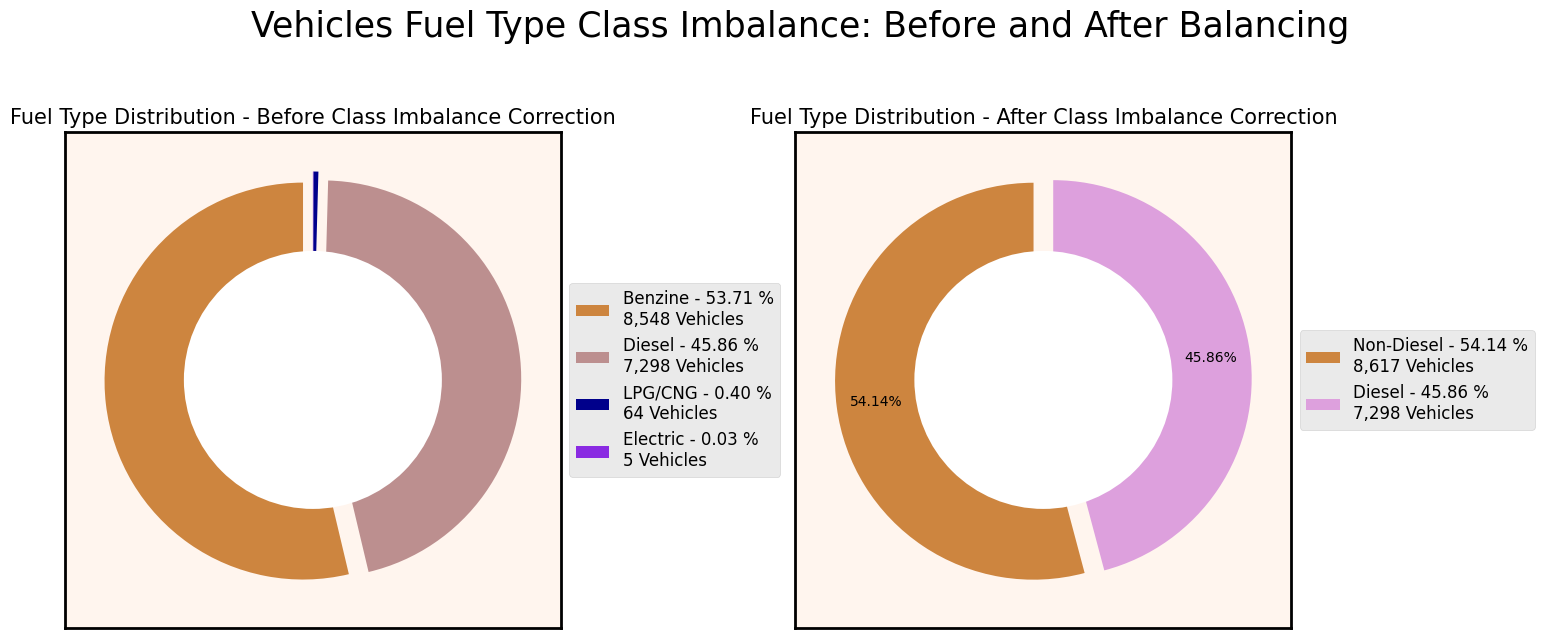

In [45]:
# Fifth Feature Class Imbalance (Fuel)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fixing Class Imbalances in Fuel
# This was done by classifying them into 2 Main Types (Diesel and Non-Diesel)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
before_fuel_series = df ["Fuel"].value_counts()
print ("Before Fixing Class Imbalances of Vehicles Gearing Type:-\n")
print (before_fuel_series)

df ["Fuel"] = df ["Fuel"].apply(lambda x: "Diesel" 
                                           if "diesel" in x.strip().lower()
                                           else ("Non-Diesel" if ("benzine" in x.strip().lower()) or
                                                ("lpg/cng" in x.strip().lower()) or ("electric" in x.strip().lower()) else x))

after_fuel_series = df ["Fuel"].value_counts()
print ("\nAfter Fixing Class Imbalances of Vehicles Gearing Type:-\n")
print (after_fuel_series)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 5 : Class Imbalance in Vehicles Fuel Type Feature

plot_donut_plot_class_imbalance(
                                before_series= before_fuel_series, 
                                after_series= after_fuel_series, 
                                before_title= "Fuel Type Distribution - Before Class Imbalance Correction", 
                                after_title= "Fuel Type Distribution - After Class Imbalance Correction", 
                                main_title= "Vehicles Fuel Type Class Imbalance: Before and After Balancing", 
                                before_color= ["peru", "rosybrown", "darkblue", "blueviolet"], 
                                after_color= ["peru", "plum"], 
                                before_explode= [0.05, 0.05, 0.05, 0.05], 
                                after_explode= [0.05, 0.05],
                                after_legend_loc= "upper center"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: 5th Feature with Class Imbalance (Fuel Type)
log_progress ("5th Feature with Class Imbalance : Fuel Type [Analyzed and Fixed]", "DEBUG")


Before Fixing Class Imbalances of Vehicles Condition:-

Type
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

After Fixing Class Imbalances of Vehicles Condition:-

Type
Used                 11095
New / Minimal Use     4820
Name: count, dtype: int64


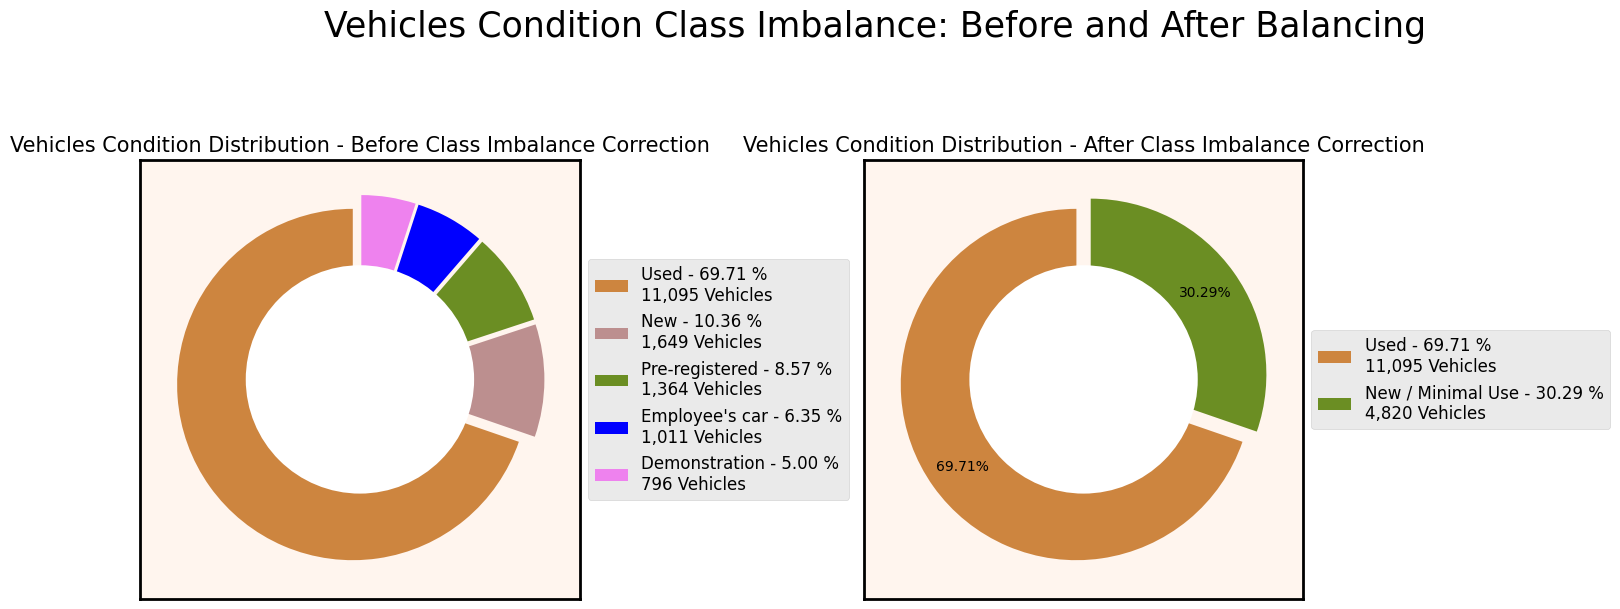

In [46]:
# Sixth Feature Class Imbalance (Type - Condition of the vehicle)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fixing Class Imbalances in Vehicle Condition
# This was done by classifying them into 2 Main Types (Used and New / Minimal Use)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
before_vehicle_condition_series = df ["Type"].value_counts()
print ("Before Fixing Class Imbalances of Vehicles Condition:-\n")
print (before_vehicle_condition_series)

df ["Type"] = df ["Type"].apply(lambda x: "Used" 
                                           if "used" in x.strip().lower()
                                           else ("New / Minimal Use" if ("new" in x.strip().lower()) or
                                                ("pre-registered" in x.strip().lower()) or ("employee's car" in x.strip().lower()) 
                                                 or ("demonstration" in x.strip().lower()) else x))

after_vehicle_condition_series = df ["Type"].value_counts()
print ("\nAfter Fixing Class Imbalances of Vehicles Condition:-\n")
print (after_vehicle_condition_series)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 6 : Class Imbalance in Vehicles Condtion Feature

plot_donut_plot_class_imbalance(
                                before_series= before_vehicle_condition_series, 
                                after_series= after_vehicle_condition_series, 
                                before_title= "Vehicles Condition Distribution - Before Class Imbalance Correction", 
                                after_title= "Vehicles Condition Distribution - After Class Imbalance Correction", 
                                main_title= "Vehicles Condition Class Imbalance: Before and After Balancing", 
                                before_color= ["peru", "rosybrown", "olivedrab", "blue", "violet"], 
                                after_color= ["peru", "olivedrab"], 
                                before_explode= [0.05, 0.05, 0.05, 0.05, 0.05], 
                                after_explode= [0.05, 0.05],
                                after_legend_loc= "center left"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: 6th Feature with Class Imbalance (Vehicles Condtion)
log_progress ("6th Feature with Class Imbalance : Vehicles Condtion [Analyzed and Fixed]", "DEBUG")


Before Fixing Class Imbalances of Vehicles Body Type:-

body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: count, dtype: int64

After Fixing Class Imbalances of Vehicles Body Type:-

body_type
Standard Body Type       15771
Specialized Body Type      144
Name: count, dtype: int64


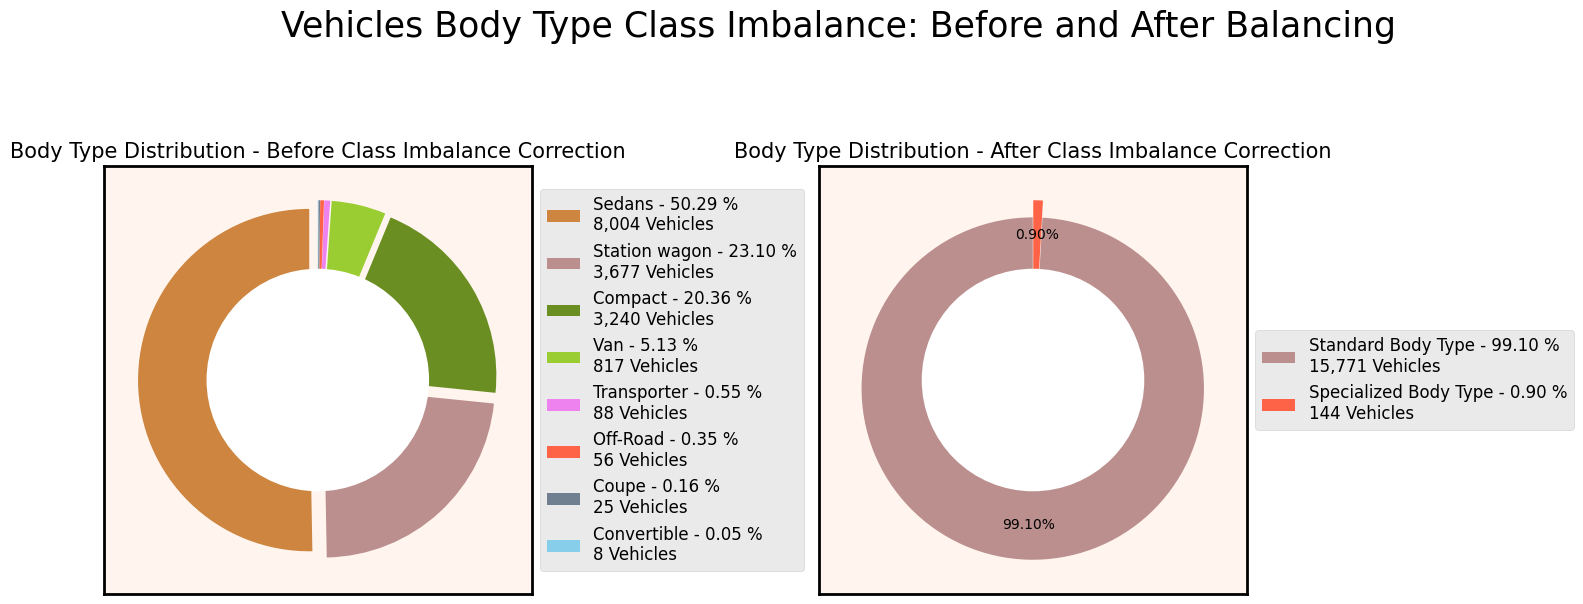

In [47]:
# Seventh Feature Class Imbalance (Body Type of the vehicle)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fixing Class Imbalances in Body Type 
# This was done by classifying them into 2 Main Types (Used and New / Minimal Use)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
before_body_type_series = df ["body_type"].value_counts()
print ("Before Fixing Class Imbalances of Vehicles Body Type:-\n")
print (before_body_type_series)

df ["body_type"] = df ["body_type"].apply(lambda x: "Standard Body Type" 
                                           if ("sedans" in x.strip().lower()) or ("station wagon" in x.strip().lower()) 
                                           or ("compact" in x.strip().lower()) or ("van" in x.strip().lower())
                                           or ("coupe" in x.strip().lower()) or ("convertible" in x.strip().lower())
                                
                                           else ("Specialized Body Type" if ("transporter" in x.strip().lower()) 
                                                 or ("off-road" in x.strip().lower()) else x))

after_body_type_series = df ["body_type"].value_counts()
print ("\nAfter Fixing Class Imbalances of Vehicles Body Type:-\n")
print (after_body_type_series)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 7 : Class Imbalance in Vehicles Body Type Feature

plot_donut_plot_class_imbalance(
                                before_series= before_body_type_series, 
                                after_series= after_body_type_series, 
                                before_title= "Body Type Distribution - Before Class Imbalance Correction", 
                                after_title= "Body Type Distribution - After Class Imbalance Correction", 
                                main_title= "Vehicles Body Type Class Imbalance: Before and After Balancing", 
                                before_color= ["peru", "rosybrown", "olivedrab", "yellowgreen", "violet", "tomato", "slategray", "skyblue"], 
                                after_color= ["rosybrown", "tomato"], 
                                before_explode= [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 
                                after_explode= [0.05, 0.05],
                                after_legend_loc= "center left"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: 7th Feature with Class Imbalance (Vehicles Body Type)
log_progress ("7th Feature with Class Imbalance : Vehicles Body Type [Analyzed and Fixed]", "DEBUG")


<span style="font-size:20px; font-weight:bold">Renaming Columns for Consistency</span>

Column names were standardised to improve clarity and readability across the dataset. A mapping dictionary was used to ensure accurate and consistent renaming, making the features easier to interpret during analysis and modeling.


In [48]:
# Renaming Columns (Standardizing for Clarity) - A map was leveraged for accurate renaming.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
standard_map_renaming = {"make_model" : "model_brand", 
                         "body_type" : "body_type", 
                         "price" : "listed_price",
                         "vat" : "vat_status", 
                         "km" : "mileage_km", 
                         "Type" : "vehicle_condition",
                         "Fuel" : "fuel_type", 
                         "Gears" : "number_of_gears", 
                         "Comfort_Convenience" : "comfort_convenience_features",
                         "Entertainment_Media" : "entertainment_media_features", 
                         "Extras" : "extra_features", 
                         "Safety_Security" : "safety_security_features", 
                         "age" : "age_of_vehicle", 
                         "Previous_Owners" : "number_of_previous_owners",
                         "hp_kW" : "engine_power_hp_kw", 
                         "Inspection_new" : "inspection", 
                         "Paint_Type" : "paint_type", 
                         "Upholstery_type" : "upholstery_type",
                         "Gearing_Type" : "gearing_type", 
                         "Displacement_cc" : "engine_displacement_cc", 
                         "Weight_kg" : "vehicle_weight_kg",
                         "Drivetrain" : "drive_train_type", 
                         "cons_comb" : "combined_fuel_consumption"}

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Renaming the Columns using the Map
df.rename (columns= standard_map_renaming, inplace= True)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Classifying the Feature Types -- After standardizing to avoid incorrect feature names

for features in [categorical, multi_value_categorical, numerical, target]:
    for i in range (len(features)):
        # Renaming the old column names to the new column names
        if features[i] in standard_map_renaming:
            # Replacing using the dictionary created for renaming
            features[i] = standard_map_renaming.get (features[i])

# Verification -- Check if the names were updated (To avoid overcrowding we will view first 3 names)
print ("To Avoid Overcrowding we will view only the First 3 Feature names for each Feature Type.\n")
       
for name, features in zip (["categorical", "multi_value_categorical", "numerical", "target"], [categorical, multi_value_categorical, numerical, target]):
    print (f"{name} : {features [:3]}\n")
    
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Standardizing for Clarity
log_progress ("Feature names have been standardized successfully.", "DEBUG")
log_progress ("-------------------- Completed Analyzing and Fixing Class Imbalance -------------------\n")


To Avoid Overcrowding we will view only the First 3 Feature names for each Feature Type.

categorical : ['model_brand', 'body_type', 'vat_status']

multi_value_categorical : ['comfort_convenience_features', 'entertainment_media_features', 'extra_features']

numerical : ['mileage_km', 'age_of_vehicle', 'number_of_previous_owners']

target : ['listed_price']



<span style="font-size:20px; font-weight:bold">Target Variable Analysis</span>

The target variable was identified and its distribution was examined to understand the overall price range and underlying skewness. Where necessary, suitable transformations were applied to improve normality and support more stable model performance.


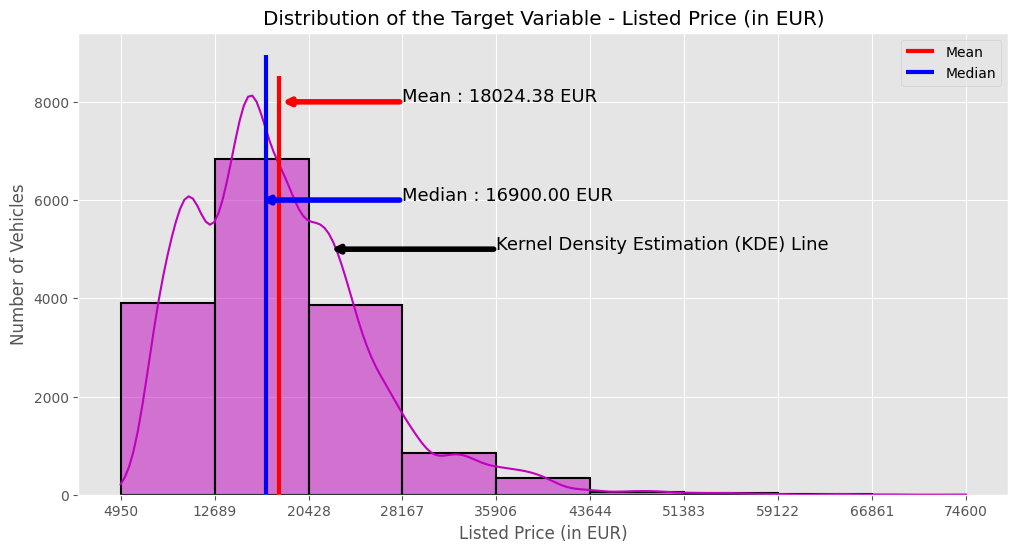

In [49]:
# Distribution of Target feature (Price)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
histogram_plot (
                dataframe=df, 
                feature= target[0], 
                title = "Distribution of the Target Variable - Listed Price (in EUR)",
                xlabel= "Listed Price (in EUR)",
                ylabel= "Number of Vehicles",
                kde_xy= (22050, 5000),
                kde_xytext= (35906, 5000),
                mean_xy= (18024, 8000),
                mean_xytext= (28167, 8000),
                median_xy= (16300, 6000),
                median_xytext= (28167, 6000),
                display_text= "EUR"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Identifying Target Variable and Plotting its Frequency Distribution
log_progress ("-------------- Analyzing and Applying Transformations on Target Variable --------------", "INFO")
log_progress ("Target Variable ----> Vehicle Price ['price']", "DEBUG")


<span style="font-size:20px; font-weight:bold">Target Variable Transformation</span>

The target variable (listed price) exhibited noticeable right-skewness, which can negatively impact model assumptions and predictive stability. To address this, the distribution was first reviewed for extreme values, and observations beyond the 1st and 99th percentiles were removed to reduce the influence of outliers.

Following outlier treatment, a log transformation `(log1p)` was applied to the target variable. This helped stabilise variance, reduce skewness, and bring the distribution closer to normality, thereby improving suitability for linear modeling techniques.

The post-transformation distribution was visualised to confirm improved symmetry and overall shape before proceeding to model development.


Number of entries removed : 320
Percentage of entries removed : 2.01 %

Visualizing the Distribution of Log-Transformed Target Variable - Listed Price



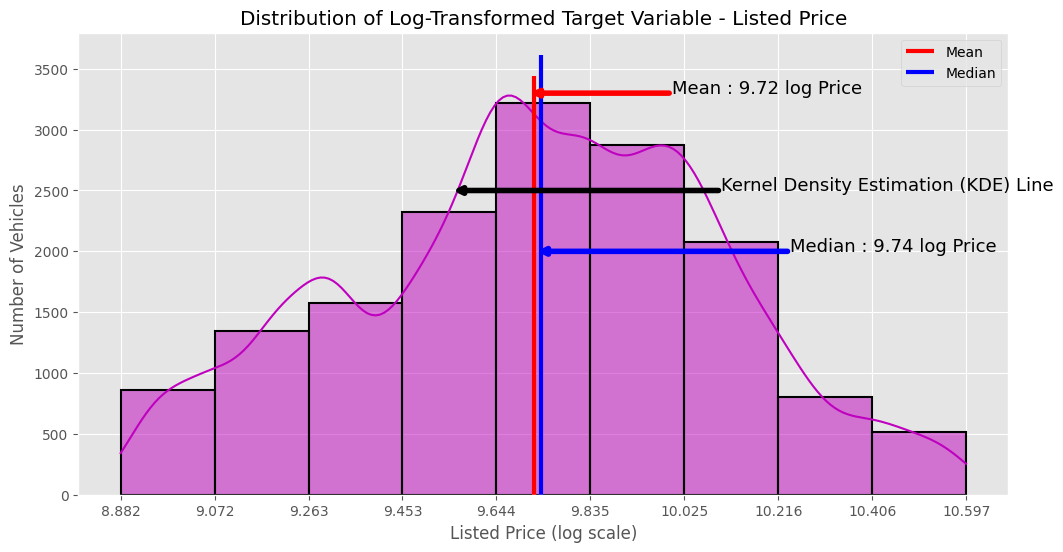

In [50]:
# Transformation on Target Variable i.e. Price
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Outlier Handling for Target Feature
print (f"Number of entries removed : {df [(df['listed_price'] < df['listed_price'].quantile(0.01)) | (df['listed_price'] > df['listed_price'].quantile(0.99))].shape[0]}")
print (f"Percentage of entries removed : {df [(df['listed_price'] < df['listed_price'].quantile(0.01)) | (df['listed_price'] > df['listed_price'].quantile(0.99))].shape[0] / df.shape[0] * 100:.2f} %\n")
print ("Visualizing the Distribution of Log-Transformed Target Variable - Listed Price\n")

# Updated DataFrame after Outlier Handling
df = df [(df['listed_price'] >= df['listed_price'].quantile(0.01)) & (df['listed_price'] <= df['listed_price'].quantile(0.99))].copy()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Transform the target feature
df ["log_listed_price"] = np.log1p (df.listed_price).copy()
log_progress ("Target Feature Transformation : Applied log1p() to Vehicle Listed Price", "INFO")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing the distribution after applying log-transformation and outlier handling
histogram_plot (
                dataframe=df, 
                feature= "log_listed_price", 
                title = "Distribution of Log-Transformed Target Variable - Listed Price",
                xlabel= "Listed Price (log scale)",
                ylabel= "Number of Vehicles",
                kde_xy= (9.55, 2500),
                kde_xytext= (10.1, 2500),
                mean_xy= (9.706, 3300),
                mean_xytext= (10, 3300),
                median_xy= (9.72, 2000),
                median_xytext= (10.24, 2000),
                display_text= "log Price"
)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Transformation on Target Variable (Vehicle Price ['price'])
log_progress ("Target Variable - Distribution of Log-Transformed Vehicle Listed Price", "DEBUG")
log_progress ("--------- Completed Analyzing and Applying Transformations on Target Variable ---------", "INFO")
log_progress ("------------------------- Completed Preliminary Analysis Phase ------------------------\n", "INFO")


<span style="font-size:20px; font-weight:bold">Correlation Analysis</span>

<span style="font-size:18px; font-weight:bold">Correlation Between Numerical Features and Target</span>  
A correlation heatmap was used to examine the strength and direction of relationships between numerical predictors and the target variable, helping highlight features with stronger linear associations.


                           log_listed_price
log_listed_price                   1.000000
engine_power_hp_kw                 0.656788
vehicle_weight_kg                  0.438977
engine_displacement_cc             0.215376
combined_fuel_consumption          0.172850
number_of_previous_owners         -0.140279
mileage_km                        -0.398370
age_of_vehicle                    -0.453842



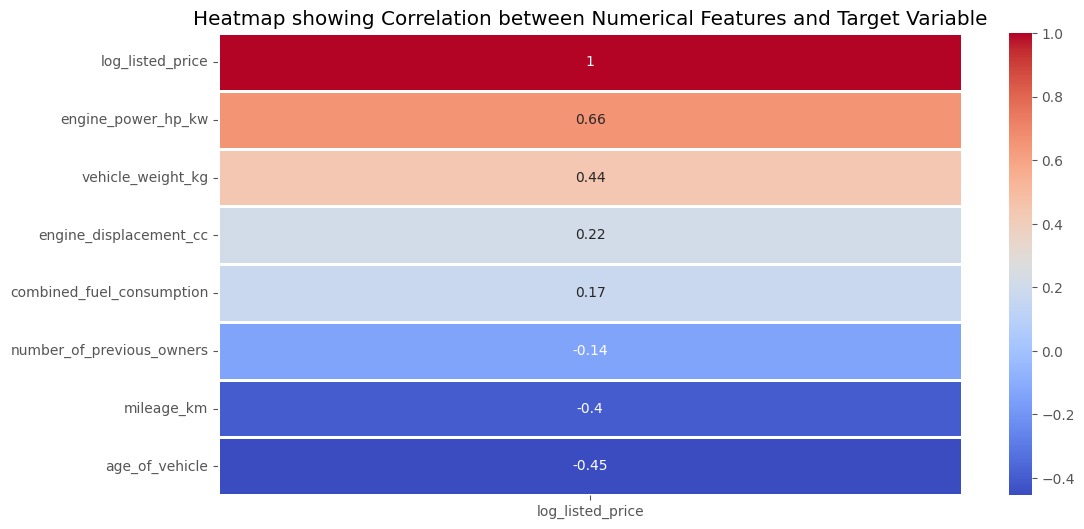

In [51]:
# Correlation Map between numerical features and target variable
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the Correlation with our Target Variable
target = ["log_listed_price"]
correlation_features = numerical + target
corr_feature_target = df [correlation_features].corr()[["log_listed_price"]].sort_values(by= "log_listed_price", ascending=False)
print (corr_feature_target)
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualise correlation
plt.figure (figsize=(12,6))
sns.heatmap (corr_feature_target,linewidths = 1, annot=True, cmap = 'coolwarm')
plt.title ("Heatmap showing Correlation between Numerical Features and Target Variable")
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Correlation Analysis
log_progress ("-------------------------------- Correlation Analysis ---------------------------------", "INFO")
log_progress ("Correlation Analysis - Correlation between Numerical Features and Target Variable", "DEBUG")


<span style="font-size:18px; font-weight:bold">Relationship Between Categorical Features and Target</span>  
Categorical variables were analysed against the target variable using appropriate aggregation and visualisation techniques to understand how price varies across different categories.


1) The Mean Log-Transformed Listed Price for feature Model Brand:-

model_brand
Audi       9.873717
Renault    9.631962
Opel       9.630656
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 832.159108700398, P-value: 0.0

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 1716.3904212125772, P-value: 0.0

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



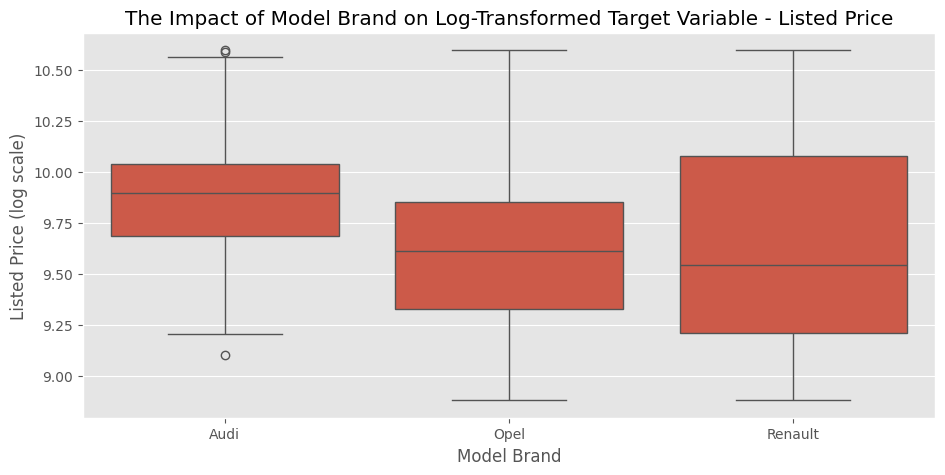

2) The Mean Log-Transformed Listed Price for feature Body Type:-

body_type
Standard Body Type       9.719901
Specialized Body Type    9.677854
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 1.6841735572880692, P-value: 0.19439000373025572

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 0.8403456954147654, P-value: 0.35929792048396825

⬛ One-Way ANOVA Test Interpretation

Result - Fail to reject the Null Hypothesis
Interpretation - Means of all the population are equal.

🟥 Kruskal-Wallis Test Interpretation

Result - Fail to reject the Null Hypothesis
Interpretation - Median is the same for all the data groups.



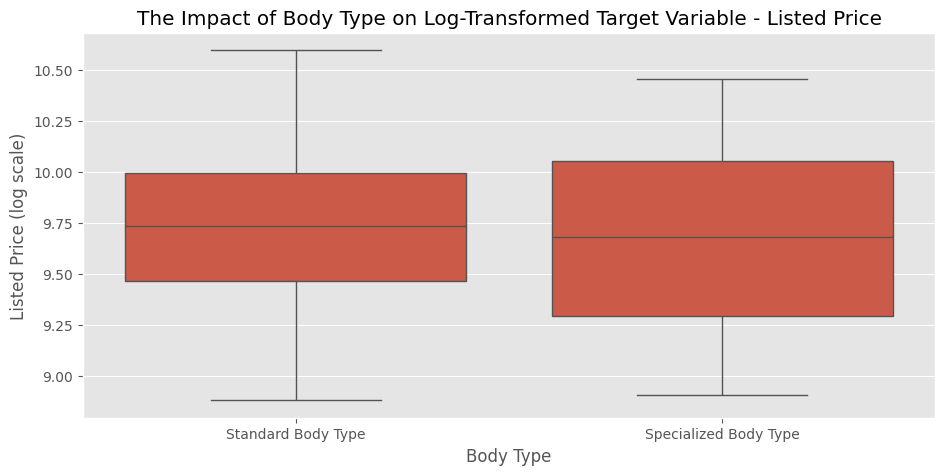

3) The Mean Log-Transformed Listed Price for feature Vat Status:-

vat_status
VAT deductible      9.728429
Price negotiable    9.565438
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 152.49262678317675, P-value: 7.196733213719516e-35

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 140.29461378656117, P-value: 2.2950332651205615e-32

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



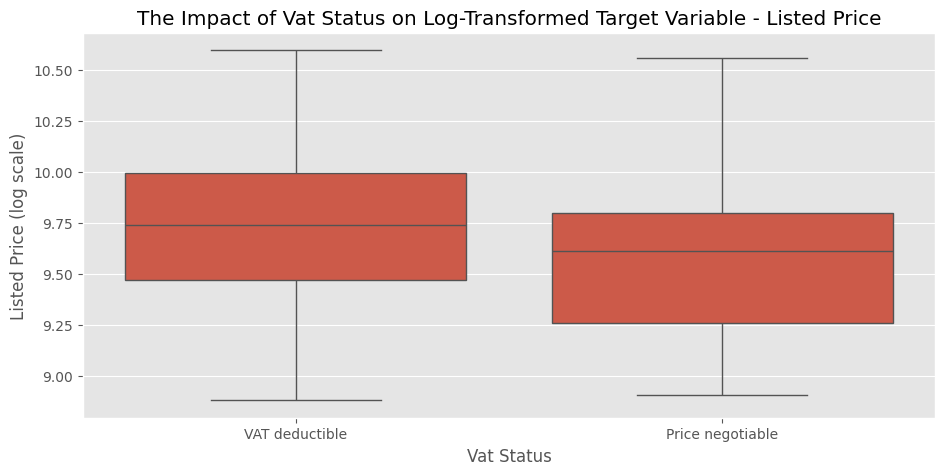

4) The Mean Log-Transformed Listed Price for feature Vehicle Condition:-

vehicle_condition
New / Minimal Use    9.907134
Used                 9.638902
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 1866.2108553299288, P-value: 0.0

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 1671.545702859503, P-value: 0.0

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



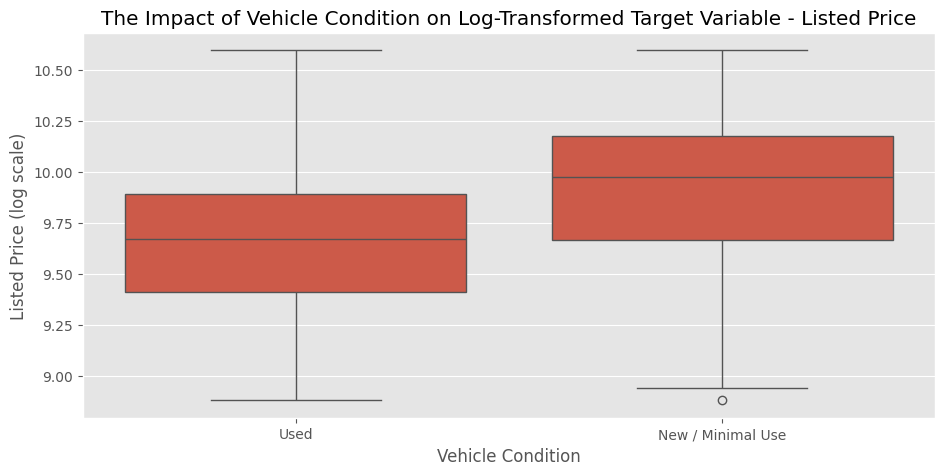

5) The Mean Log-Transformed Listed Price for feature Fuel Type:-

fuel_type
Diesel        9.736118
Non-Diesel    9.705490
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 25.704805275250003, P-value: 4.0239378093560077e-07

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 21.717056339245076, P-value: 3.1596942388669264e-06

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



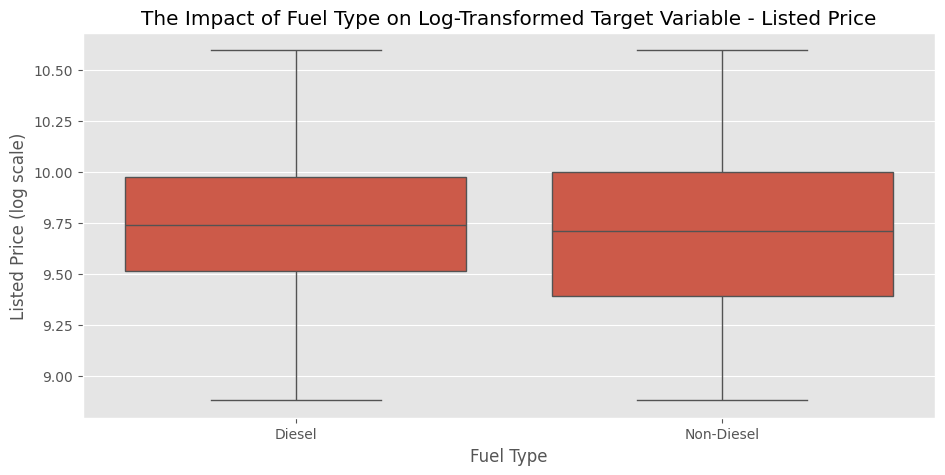

6) The Mean Log-Transformed Listed Price for feature Number Of Gears:-

number_of_gears
8.0    10.252918
7.0     9.983708
6.0     9.791436
5.0     9.364698
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 3049.634222609902, P-value: 0.0

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 5681.3055678705905, P-value: 0.0

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



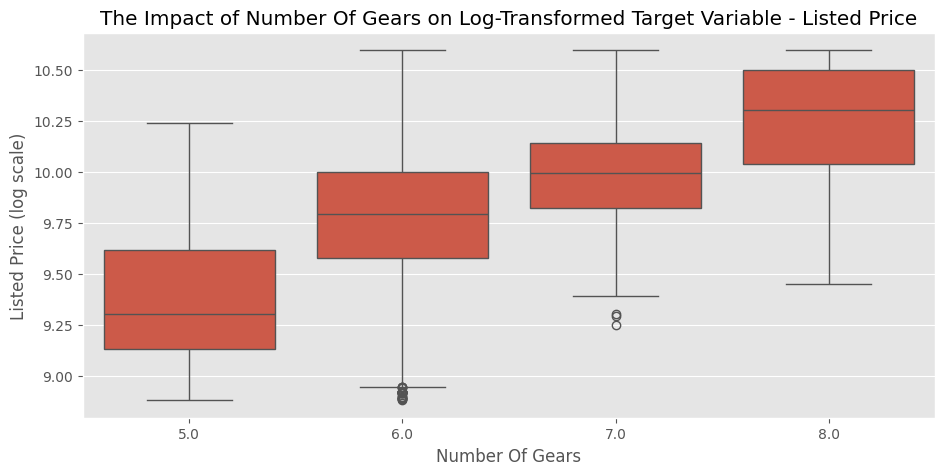

7) The Mean Log-Transformed Listed Price for feature Inspection:-

inspection
1    9.741497
0    9.712266
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 17.610028879103282, P-value: 2.726559998840916e-05

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 7.7291440714436135, P-value: 0.005433650155283529

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



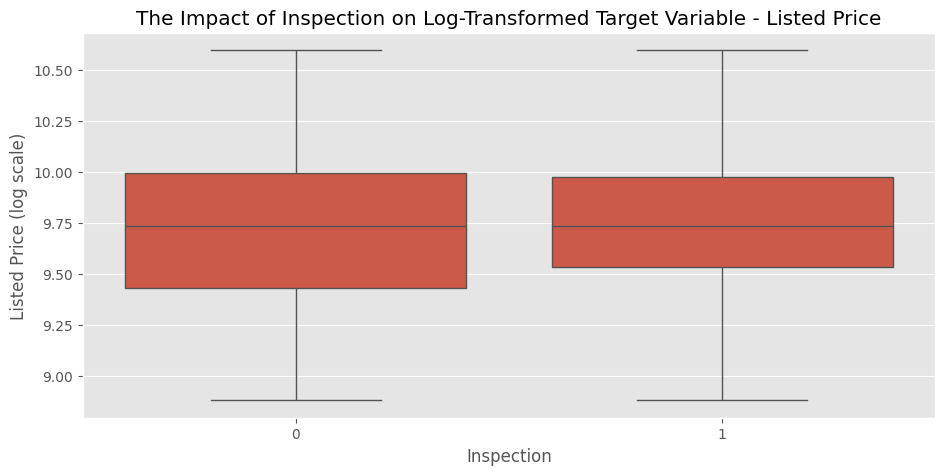

8) The Mean Log-Transformed Listed Price for feature Paint Type:-

paint_type
Metallic        9.723034
Non-Metallic    9.639085
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 31.07800718712828, P-value: 2.519743723954627e-08

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 21.24718308986576, P-value: 4.037032211775001e-06

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



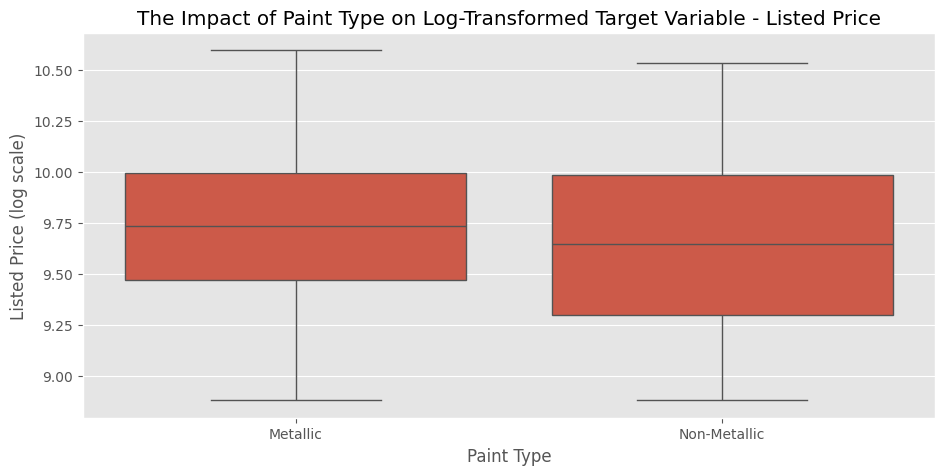

9) The Mean Log-Transformed Listed Price for feature Upholstery Type:-

upholstery_type
Part/Full Leather    9.950876
Cloth                9.651724
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 1944.0021299069451, P-value: 0.0

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 1551.278562651681, P-value: 0.0

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



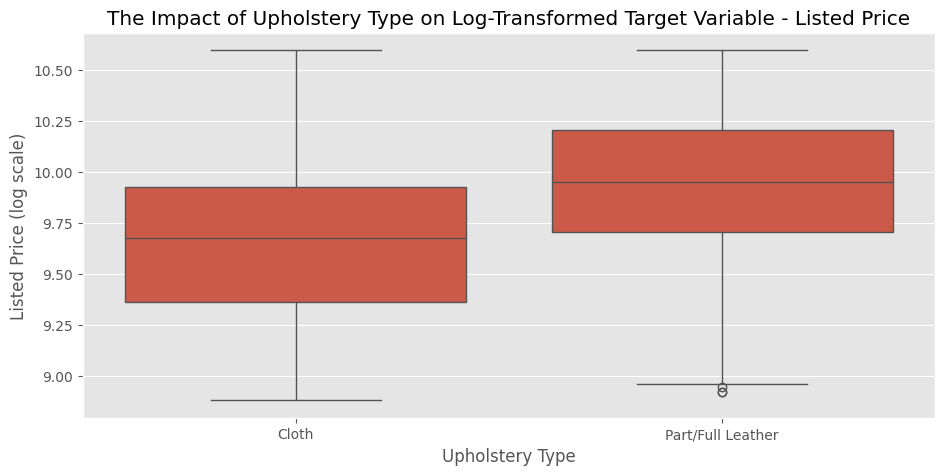

10) The Mean Log-Transformed Listed Price for feature Gearing Type:-

gearing_type
Automatic and Semi-Automatic    9.894696
Manual                          9.552127
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 4075.4522613863624, P-value: 0.0

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 3065.5034933117718, P-value: 0.0

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



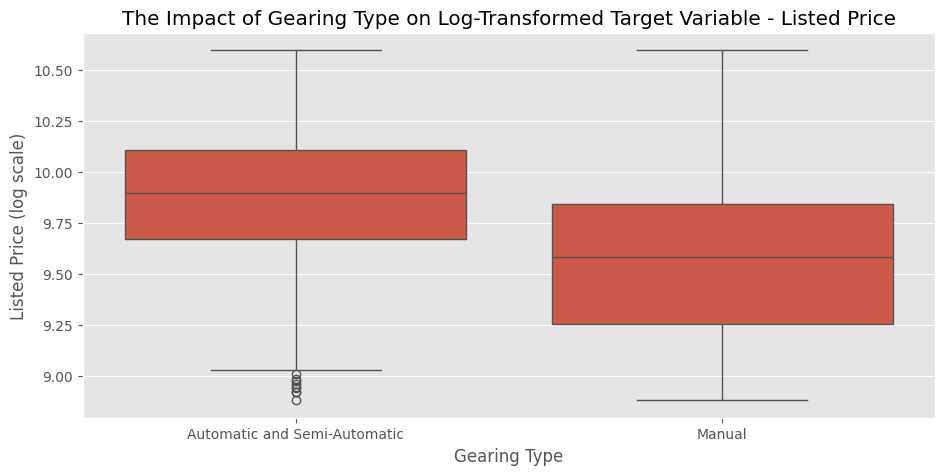

11) The Mean Log-Transformed Listed Price for feature Drive Train Type:-

drive_train_type
Non-Front-Wheel Drive (RWD/4WD)    10.017574
Front-Wheel Drive (FWD)             9.716035
Name: log_listed_price, dtype: float64

⬛ One-Way ANOVA Test ----> F-statistic: 115.78354101686958, P-value: 6.589489961162429e-27

🟥 Kruskal-Wallis Test ----> Kruskal Sats: 71.88740157217445, P-value: 2.2783392695045788e-17

⬛ One-Way ANOVA Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - At least one population mean that differs from the rest.

🟥 Kruskal-Wallis Test Interpretation

Result - Reject the Null Hypothesis
Interpretation - Median is not equal for all the data groups.



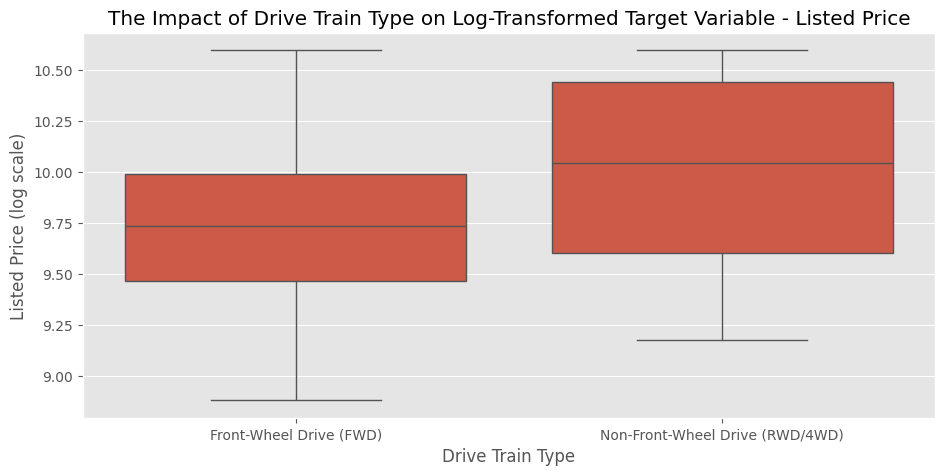

In [52]:
# Comparing average values of target for different categories
# Analysis is done using target means and boxplots
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Significance Value of the test (95% Confidence Level)
alpha = 0.05

# Styling for readability (BOLD)
class color:
    BOLD = "\033[1m"
    END = '\033[0m'
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# All-Rounder-Implementation (Boxplots, One-Way ANOVA Test, Kruskal-Wallis Test)
for index, categories in enumerate(categorical):
    plt.figure (figsize= (11,5))
    sns.boxplot (data = df, x= categories, y= "log_listed_price")

    # Correlation between a categorical variable and a continuous variable cannot be computed directly
    print (color.BOLD + f"{index + 1}) The Mean Log-Transformed Listed Price for feature {categories.replace('_',' ').title()}:-\n" + color.END)
    print (f"{df.groupby(categories)['log_listed_price'].mean().sort_values(ascending=False)}\n")

    # One-Way ANOVA Implementation
    sub_groups = []
    for groupname, group in df.groupby([categories]):
        sub_groups.append (group["log_listed_price"].values)
    
    f_stats, anova_p_value = f_oneway(*sub_groups)
    print (color.BOLD + "⬛ One-Way ANOVA Test ---->"+ color.END + f" F-statistic: {f_stats}, P-value: {anova_p_value}\n")

    kruskal_stats, kruskal_p_value = kruskal(*sub_groups)
    print (color.BOLD + "🟥 Kruskal-Wallis Test ---->"+ color.END +  f" Kruskal Sats: {kruskal_stats}, P-value: {kruskal_p_value}\n")
    
    print (color.BOLD + "⬛ One-Way ANOVA Test Interpretation\n" + color.END)
    if anova_p_value < alpha:
        print (color.BOLD + "Result -" + color.END + " Reject the Null Hypothesis")
        print (color.BOLD + "Interpretation -" + color.END + " At least one population mean that differs from the rest.\n")
    else:
        print (color.BOLD + "Result -" + color.END + " Fail to reject the Null Hypothesis")
        print (color.BOLD + "Interpretation -" + color.END + " Means of all the population are equal.\n")

    print (color.BOLD + "🟥 Kruskal-Wallis Test Interpretation\n" + color.END)
    if kruskal_p_value < alpha:
        print (color.BOLD + "Result -" + color.END + " Reject the Null Hypothesis")
        print (color.BOLD + "Interpretation -" + color.END + " Median is not equal for all the data groups.\n") 
    else:
        print (color.BOLD + "Result -" + color.END + " Fail to reject the Null Hypothesis")
        print (color.BOLD + "Interpretation -" + color.END + " Median is the same for all the data groups.\n")
    
    plt.title (f"The Impact of {categories.replace('_',' ').title()} on Log-Transformed Target Variable - Listed Price")
    plt.xlabel (f"{categories.replace('_',' ').title()}")
    plt.ylabel ("Listed Price (log scale)")
    plt.show ()
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Correlation Analysis - Categorical Features and Target
log_progress ("Correlation Analysis - Correlation between Categorical Features and Target Variable", "DEBUG")
log_progress ("--------------------------- Completed Correlation Analysis ----------------------------\n", "INFO")


<span style="font-size:20px; font-weight:bold">Outlier Analysis</span>

<span style="font-size:18px; font-weight:bold">Identifying Potential Outliers</span>  
Statistical techniques and visual inspection were used to detect extreme values across key numerical features, helping highlight observations that could disproportionately influence model performance.


In [53]:
# Statistical Analysis of Numerical Features
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df [numerical].describe().T

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Outlier Analysis and Statistical Analysis
log_progress ("---------------------------------- Outlier Analysis -----------------------------------", "INFO")
log_progress ("Statistical Analysis - Performed on Numerical Features", "DEBUG")


In [54]:
# Quantile Based Analysis
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Custom Statistical Tool
quantiles_analysis = df[numerical].agg([
                                        lambda x : x.quantile(0.01),
                                        lambda x : x.quantile(0.25),
                                        lambda x : x.quantile(0.50),
                                        lambda x : x.quantile(0.75),
                                        lambda x : x.quantile(0.99)
])
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Renaming the index
quantiles_analysis.index = ["0.01 Percentile", "0.25 Percentile", "Median", "0.75 Percentile", "0.99 Percentile"]

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Viewing the Analysis
print ("The Quantile Summary Table is as follows:-\n")
quantiles_analysis.head().T

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Quantile Based Analysis
log_progress ("Quantile Based Analysis - Performed on Numerical Features", "DEBUG")


The Quantile Summary Table is as follows:-



In [55]:
# Note: Vehicle Age and Number of Previous Owners do not need outlier handling.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
log_progress ("Note: Vehicle Age and Number of Previous Owners do not need outlier handling.", "DEBUG")


<span style="font-size:18px; font-weight:bold">Data Sanity Checks</span>  
As part of data validation, numerical features were reviewed for logically inconsistent values, such as negative entries where only non-negative values are valid. This step helps ensure data quality and prevents invalid observations from influencing downstream analysis and model performance.


In [56]:
# Checks for negative values and Reports the Total Number of Negative Values
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
total_negatives = df [numerical][df [numerical] < 0].sum().sum()

if total_negatives == 0:
    print (f"Total Number of Negative Values in our Dataset : {int(total_negatives)} Negative Values.")
else:
    print (f"Total Number of Negative Values in our Dataset : {int(total_negatives)} Negative Values.")
    print ("Please handle the Negative Values before proceeding further.")
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Negative Value Analysis
log_progress ("Negative Value Analysis (Sanity Check) - Performed on Numerical Features", "DEBUG")


Total Number of Negative Values in our Dataset : 0 Negative Values.


<span style="font-size:18px; font-weight:bold">Outlier Treatment – Total Mileage (km)</span>

Mileage was reviewed for logical consistency and extreme values. Very low mileage records (0–1 km) were cross-checked against vehicle condition and found to be rare. To limit the influence of extreme high values, the 99th percentile was used as a threshold and upper-tail winsorisation was applied, capping mileage at this level while preserving all records. A post-treatment check confirmed that the feature remained within realistic bounds.


In [57]:
# Sanity Check: If a vehicle has Low Mileage (0km, 1km) it should be marked as a New / Minimal Use Condition for it to be a valid record.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("Checking if the vehicles condition accounts for the Total Mileage (0km) of the Vehicle\n")
print (df [df["mileage_km"].isin([0])]["vehicle_condition"].value_counts())
print ()

print ("Checking if the vehicles condition accounts for the Total Mileage (1km) of the Vehicle\n")
print (df [df["mileage_km"].isin([1])]["vehicle_condition"].value_counts())


Checking if the vehicles condition accounts for the Total Mileage (0km) of the Vehicle

vehicle_condition
New / Minimal Use    19
Name: count, dtype: int64

Checking if the vehicles condition accounts for the Total Mileage (1km) of the Vehicle

vehicle_condition
New / Minimal Use    332
Used                  29
Name: count, dtype: int64


In [58]:
# Occurence of these are Rare and Linear Regression models are sensitive to outliers.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
percentile_99th = df['mileage_km'].quantile(0.99)

print (f"The Number of Vehicles with a mileage above the 99th Percentile:- {df [df['mileage_km'] > percentile_99th].shape[0]} Vehicles.\n")
print ("Let's view the mileage for vehicles above the 99th Percentile:-")

print (df [df["mileage_km"] > percentile_99th]["mileage_km"].value_counts().sort_index())
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Solution: Handling outliers for Total Mileage of Vehicles using a technique called Upper-Tail Winsorization (99th Percentile Winsorization)
df["mileage_km"] = df["mileage_km"].clip(lower= 0, upper= percentile_99th)
print ("The outliers for Total Mileage feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization\n")

# Verification: Post Outlier Handling Sanity Check
print (f"Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : {df [df['mileage_km'] > percentile_99th].shape[0]} Vehicles.")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Outlier Analysis 1: Total Mileage in (km)
log_progress ("Outlier Analysis 1: Total Mileage in (km) [Upper-Tail Winsorization]", "DEBUG")


The Number of Vehicles with a mileage above the 99th Percentile:- 155 Vehicles.

Let's view the mileage for vehicles above the 99th Percentile:-
mileage_km
153047.0    1
153413.0    1
153519.0    1
153600.0    1
153683.0    1
           ..
232000.0    1
240000.0    1
248000.0    1
291800.0    1
317000.0    1
Name: count, Length: 127, dtype: int64

The outliers for Total Mileage feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization

Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : 0 Vehicles.


<span style="font-size:18px; font-weight:bold">Outlier Treatment – Engine Power (kW)</span>

Engine power values were assessed for extreme observations using percentile-based analysis. Lower-tail values were retained to preserve realistic variation, as they did not introduce distortion. To reduce the influence of unusually high values, upper-tail winsorisation was applied using the 99th percentile as a cap. This ensured the feature remained representative of real-world vehicles while improving model stability. A post-treatment validation confirmed that no values exceeded the defined threshold.


In [59]:
# Outlier Handling : Engine Power in (kW)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
percentile_99th = df['engine_power_hp_kw'].quantile(0.99)
print (f"Left-Tail Analysis (0.01 Percentile) : {df [df['engine_power_hp_kw'] < df['engine_power_hp_kw'].quantile(0.01)].shape[0]} Vehicles")
print (f"Right-Tail Analysis (0.99 Percentile) : {df [df['engine_power_hp_kw'] > percentile_99th].shape[0]} Vehicles\n")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Solution: Handling outliers for Engine Power of Vehicles using a technique called Upper-Tail Winsorization (99th Percentile Winsorization)
df["engine_power_hp_kw"] = df["engine_power_hp_kw"].clip(upper= percentile_99th)

print ("The outliers on the Left-Tail were kept to preserve real-world variation and are statistically irrelevant.")
print ("The outliers for Engine Power feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization\n")

# Verification: Post Outlier Handling Sanity Check
print (f"Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : {df [df['engine_power_hp_kw'] > percentile_99th].shape[0]} Vehicles.")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Outlier Analysis 2: Engine Power in (kW)
log_progress ("Outlier Analysis 2: Engine Power in (kW) [Upper-Tail Winsorization]", "DEBUG")


Left-Tail Analysis (0.01 Percentile) : 2 Vehicles
Right-Tail Analysis (0.99 Percentile) : 19 Vehicles

The outliers on the Left-Tail were kept to preserve real-world variation and are statistically irrelevant.
The outliers for Engine Power feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization

Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : 0 Vehicles.


<span style="font-size:18px; font-weight:bold">Outlier Treatment – Engine Displacement (cc)</span>

Engine displacement was examined using percentile-based analysis to identify extreme values. Lower-tail observations were retained to preserve natural variation within smaller engines. To minimise the impact of unusually large engine sizes, upper-tail winsorisation was applied using the 99th percentile as a cap. This helped stabilise the feature while maintaining realistic data representation. A final validation confirmed that no values exceeded the defined threshold after treatment.


In [60]:
# Outlier Handling : Engine Displacement in (cc)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
percentile_99th = df['engine_displacement_cc'].quantile(0.99)
print (f"Left-Tail Analysis (0.01 Percentile) : {df [df['engine_displacement_cc'] < df['engine_displacement_cc'].quantile(0.01)].shape[0]} Vehicles")
print (f"Right-Tail Analysis (0.99 Percentile) : {df [df['engine_displacement_cc'] > percentile_99th].shape[0]} Vehicles\n")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Solution: Handling outliers for Engine Displacement of Vehicles using a technique called Upper-Tail Winsorization (99th Percentile Winsorization)
df["engine_displacement_cc"] = df["engine_displacement_cc"].clip(upper= percentile_99th)

print ("The outliers on the Left-Tail were kept to preserve real-world variation and are statistically irrelevant.")
print ("The outliers for Engine Displacement feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization\n")

# Verification: Post Outlier Handling Sanity Check
print (f"Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : {df [df['engine_displacement_cc'] > percentile_99th].shape[0]} Vehicles.")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Outlier Analysis 3: Engine Displacement in (cc)
log_progress ("Outlier Analysis 3: Engine Displacement in (cc) [Upper-Tail Winsorization]", "DEBUG")


Left-Tail Analysis (0.01 Percentile) : 0 Vehicles
Right-Tail Analysis (0.99 Percentile) : 139 Vehicles

The outliers on the Left-Tail were kept to preserve real-world variation and are statistically irrelevant.
The outliers for Engine Displacement feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization

Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : 0 Vehicles.


<span style="font-size:18px; font-weight:bold">Outlier Treatment – Vehicle Weight (kg)</span>

Vehicle weight values were reviewed for logical validity, with a preliminary sanity check confirming no unrealistic minimum values. Percentile-based analysis was used to identify extreme observations. Lower-tail values were retained to preserve real-world variation, as they did not introduce distortion. To reduce the impact of unusually heavy vehicles, upper-tail winsorisation was applied using the 99th percentile as a cap. A final validation confirmed that no values exceeded the threshold after treatment.


In [61]:
# Sanity Check - Minimum Vehicle Weight
print (f"The Minimum Vehicle Weight : {df['vehicle_weight_kg'].min()} kg")


The Minimum Vehicle Weight : 840.0 kg


In [62]:
# Outlier Handling : Vehicle Weight in (kg)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
percentile_99th = df['vehicle_weight_kg'].quantile(0.99)
print (f"Left-Tail Analysis (0.01 Percentile) : {df [df['vehicle_weight_kg'] < df['vehicle_weight_kg'].quantile(0.01)].shape[0]} Vehicles")
print (f"Right-Tail Analysis (0.99 Percentile) : {df [df['vehicle_weight_kg'] > percentile_99th].shape[0]} Vehicles\n")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Solution: Handling outliers for Vehicle Weight of Vehicles using a technique called Upper-Tail Winsorization (99th Percentile Winsorization)
df["vehicle_weight_kg"] = df["vehicle_weight_kg"].clip(upper= percentile_99th)

print ("The outliers on the Left-Tail were kept to preserve real-world variation. No unrealistic values. Clipping this would distort our analysis.")
print ("The outliers for Vehicle Weight feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization\n")

# Verification: Post Outlier Handling Sanity Check
print (f"Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : {df [df['vehicle_weight_kg'] > percentile_99th].shape[0]} Vehicles.")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Outlier Analysis 4: Vehicle Weight in (kg)
log_progress ("Outlier Analysis 4: Vehicle Weight in (kg) [Upper-Tail Winsorization]", "DEBUG")


Left-Tail Analysis (0.01 Percentile) : 135 Vehicles
Right-Tail Analysis (0.99 Percentile) : 135 Vehicles

The outliers on the Left-Tail were kept to preserve real-world variation. No unrealistic values. Clipping this would distort our analysis.
The outliers for Vehicle Weight feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization

Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : 0 Vehicles.


<span style="font-size:18px; font-weight:bold">Outlier Treatment – Combined Fuel Consumption (L/100km)</span>

Combined fuel consumption values were first validated through a sanity check to confirm no unrealistic minimum values. Percentile-based analysis was then used to identify extreme observations. Lower-tail values were retained to preserve natural variation, as they did not distort the distribution. To limit the influence of unusually high consumption values, upper-tail winsorisation was applied using the 99th percentile as a cap. A post-treatment check confirmed that the feature remained within realistic bounds.


In [63]:
# Sanity Check - Minimum Combined Fuel Consumption
print (f"The Minimum Vehicle Weight : {df['combined_fuel_consumption'].min()} L/100km")


The Minimum Vehicle Weight : 3.0 L/100km


In [64]:
# Outlier Handling : Combined Fuel Consumption in (L/100km)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
percentile_99th = df['combined_fuel_consumption'].quantile(0.99)
print (f"Left-Tail Analysis (0.01 Percentile) : {df [df['combined_fuel_consumption'] < df['combined_fuel_consumption'].quantile(0.01)].shape[0]} Vehicles")
print (f"Right-Tail Analysis (0.99 Percentile) : {df [df['combined_fuel_consumption'] > percentile_99th].shape[0]} Vehicles\n")
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Solution: Handling outliers for Combined Fuel Consumption of Vehicles using a technique called Upper-Tail Winsorization (99th Percentile Winsorization)
df["combined_fuel_consumption"] = df["combined_fuel_consumption"].clip(upper= percentile_99th)

print ("The outliers on the Left-Tail were kept to preserve real-world variation. No unrealistic values. Clipping this would distort our analysis.")
print ("The outliers for Combined Fuel Consumption feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization\n")

# Verification: Post Outlier Handling Sanity Check
print (f"Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : {df [df['combined_fuel_consumption'] > percentile_99th].shape[0]} Vehicles.")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Outlier Analysis 5: Combined Fuel Consumption in (L/100km)
log_progress ("Outlier Analysis 5: Combined Fuel Consumption in (L/100km) [Upper-Tail Winsorization]", "DEBUG")
log_progress ("----------------------------- Completed Outlier Analysis ------------------------------\n", "INFO")


Left-Tail Analysis (0.01 Percentile) : 94 Vehicles
Right-Tail Analysis (0.99 Percentile) : 155 Vehicles

The outliers on the Left-Tail were kept to preserve real-world variation. No unrealistic values. Clipping this would distort our analysis.
The outliers for Combined Fuel Consumption feature in our Used Car Dataset was handled by using a technique called Upper-Tail Winsorization

Post-Outlier-Handling (Vehicles still greater than 99th Percentile) : 0 Vehicles.


<span style="font-size:20px; font-weight:bold">Feature Engineering</span>

<span style="font-size:18px; font-weight:bold">Refining and Creating Features</span>  
Redundant variables were reviewed and removed where appropriate, while new features were derived to enhance the dataset’s ability to capture meaningful patterns and improve model performance.


In [65]:
# Column Names -- Were fixed in earlier steps (Standardizing for Clarity)
# Redundant Columns -- Regularization Methods like Lasso and Ridge naturally perform feature shrinkage. We will let the model decide feature contribution.

<span style="font-size:18px; font-weight:bold">Engineering Multi-Valued Categorical Features</span>

Several columns contained bundled feature lists (e.g., comfort, safety, entertainment). Instead of dropping these fields, they were retained and transformed using multi-hot encoding. Each unique attribute was converted into a binary indicator (0/1), allowing the model to capture the presence or absence of individual features while preserving valuable information embedded in these columns.


In [66]:
# Multi-Hot Encoding
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for columns in multi_value_categorical:
    
    # Encoding of Multi-Categorical Variables
    mlb = MultiLabelBinarizer()

    # Converting the String into a List (Taking care of leading and trailing spaces)
    df [columns] = df [columns].str.split (",").apply(lambda words: [word.strip() for word in words])

    # Multi-Hot Encoded Array
    encoded_value = mlb.fit_transform(df[columns])

    # Coverting the encoded value into a DataFrame
    new_dataframe = pd.DataFrame (data= encoded_value, columns= mlb.classes_, index= df.index)

    # Joining the DataFrame back to our original DataFrame
    df = pd.concat([df, new_dataframe], axis=1).copy()
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Feature Engineering - Multi-Categorical Features
log_progress ("--------------------------------- Feature Engineering ---------------------------------", "INFO")
log_progress ("Feature Engineering - Multi-Categorical Features [Multi-Hot Encoding]", "INFO")


<span style="font-size:18px; font-weight:bold">Dimensionality Reduction for Engineered Features</span>

The multi-hot encoded feature space introduced a large number of sparse binary variables, increasing the risk of the curse of dimensionality. To address this, related features were logically grouped into higher-level categories such as parking convenience, climate control, seating comfort, driving control, and interior technology.

For each group, two aggregate features were engineered:
- A binary indicator capturing whether any feature in the group is present  
- A count feature representing the total number of features available within the group  

This approach preserves meaningful information while significantly reducing feature complexity. The original sparse features were then dropped to improve model efficiency and interpretability.


In [67]:
print (f"The Total Number of Features after applying Multi-hot Encoding : {df.shape[1]}")
log_progress ("The Total Number of Features after applying Multi-hot Encoding : {df.shape[1]}", "DEBUG")


The Total Number of Features after applying Multi-hot Encoding : 118


<span style="font-size:18px; font-weight:bold">Comfort & Convenience Feature Engineering</span>


In [68]:
# Comfort Convenience Feature Handling
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Parking Convenience Feature

df ["parking_convenience_any"] = np.where(
                                    (df ["Park Distance Control"] == 1) |

                                    (df ["Parking assist system sensors rear"] == 1) |

                                    (df ["Parking assist system sensors front"] == 1) |

                                    (df ["Parking assist system camera"] == 1) |

                                    (df ["Parking assist system self-steering"] == 1), 
    
                                    1, 0
)

df ["parking_convenience_count"] = df ["Park Distance Control"] \
                                +  df ["Parking assist system sensors rear"] \
                                +  df ["Parking assist system sensors front"] \
                                +  df ["Parking assist system camera"] \
                                +  df ["Parking assist system self-steering"] 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Climate Control Convenience Feature

df ["climate_control_convenience_any"] = np.where(
                                    (df ["Automatic climate control"] == 1) |

                                    (df ["Air conditioning"] == 1) |

                                    (df ["Electrically heated windshield"] == 1) |

                                    (df ["Auxiliary heating"] == 1), 
    
                                    1, 0
)

df ["climate_control_convenience_count"] = df ["Automatic climate control"] \
                                        +  df ["Air conditioning"] \
                                        +  df ["Electrically heated windshield"] \
                                        +  df ["Auxiliary heating"] 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Seating Comfort Convenience Feature

df ["seating_comfort_convenience_any"] = np.where(
                                        (df ["Leather seats"] == 1) |

                                        (df ["Seat heating"] == 1) |

                                        (df ["Seat ventilation"] == 1) |

                                        (df ["Massage seats"] == 1) |

                                        (df ["Split rear seats"] == 1) |
    
                                        (df ["Lumbar support"] == 1) |
                                        
                                        (df ["Electrically adjustable seats"] == 1) |  

                                        (df ["Armrest"] == 1),
    
                                        1, 0
)

df ["seating_comfort_convenience_count"] = df ["Leather seats"] \
                                        +  df ["Seat heating"] \
                                        +  df ["Seat ventilation"] \
                                        +  df ["Massage seats"] \
                                        +  df ["Split rear seats"] \
                                        +  df ["Lumbar support"] \
                                        +  df ["Electrically adjustable seats"] \
                                        +  df ["Armrest"] 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Driving Control Convenience

df ["driving_control_convenience_any"] = np.where(
                                        (df ["Cruise control"] == 1) |

                                        (df ["Hill Holder"] == 1) |

                                        (df ["Start-stop system"] == 1) |

                                        (df ["Rain sensor"] == 1) |

                                        (df ["Light sensor"] == 1) |
    
                                        (df ["Keyless central door lock"] == 1) |
                                        
                                        (df ["Electric tailgate"] == 1) |  

                                        (df ["Electric Starter"] == 1) |
                                       
                                        (df ["Electrical side mirrors"] == 1) |  

                                        (df ["Power windows"] == 1),
    
                                        1, 0
)

df ["driving_control_convenience_count"] = df ["Cruise control"] \
                                        +  df ["Hill Holder"] \
                                        +  df ["Start-stop system"] \
                                        +  df ["Rain sensor"] \
                                        +  df ["Light sensor"] \
                                        +  df ["Keyless central door lock"] \
                                        +  df ["Electric tailgate"] \
                                        +  df ["Electric Starter"] \
                                        +  df ["Electrical side mirrors"] \
                                        +  df ["Power windows"] 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Interior Tech Convenience

df ["interior_tech_convenience_any"] = np.where(
                                        (df ["Multi-function steering wheel"] == 1) |

                                        (df ["Leather steering wheel"] == 1) |

                                        (df ["Navigation system"] == 1) |

                                        (df ["Heads-up display"] == 1) |

                                        (df ["Tinted windows"] == 1) |
    
                                        (df ["Heated steering wheel"] == 1) |
                                        
                                        (df ["Panorama roof"] == 1) |  

                                        (df ["Sunroof"] == 1) |
                                       
                                        (df ["Air suspension"] == 1) |  

                                        (df ["Wind deflector"] == 1) |

                                        (df ["Windshield"] == 1),    
    
                                        1, 0
)

df ["interior_tech_convenience_count"] =   df ["Multi-function steering wheel"] \
                                        +  df ["Leather steering wheel"] \
                                        +  df ["Navigation system"] \
                                        +  df ["Heads-up display"] \
                                        +  df ["Tinted windows"] \
                                        +  df ["Heated steering wheel"] \
                                        +  df ["Panorama roof"] \
                                        +  df ["Sunroof"] \
                                        +  df ["Air suspension"] \
                                        +  df ["Wind deflector"] \
                                        +  df ["Windshield"] 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Dropping Irrelevant Features 

df.drop (columns= df ["comfort_convenience_features"].explode().value_counts().index.tolist(), inplace= True)
df.drop (columns= ["comfort_convenience_features"], inplace= True)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Feature Engineering - Multi-Categorical Feature [Comfort Convenience]
log_progress ("1st Multi-Categorical Feature : Comfort Convenience (Feature Engineering)", "DEBUG")


<span style="font-size:18px; font-weight:bold">Entertainment Media Feature Handling Feature Engineering</span>


In [69]:
# Entertainment Media Feature Handling
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Audio Media

df ["audio_media_any"] = np.where(
                                 (df ["Radio"] == 1) |
                                
                                 (df ["MP3"] == 1) |
                                 
                                 (df ["CD player"] == 1) |
                                 
                                 (df ["Digital radio"] == 1) |
                                 
                                 (df ["Sound system"] == 1),    
    
                                 1, 0
)

df ["audio_media_count"] =  df ["Radio"] \
                          + df ["MP3"] \
                          + df ["CD player"] \
                          + df ["Digital radio"] \
                          + df ["Sound system"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Connectivity

df ["connectivity_media_any"] = np.where(
                                 (df ["Bluetooth"] == 1) |
                                
                                 (df ["Hands-free equipment"] == 1) |
                                 
                                 (df ["On-board computer"] == 1) |
                                 
                                 (df ["USB"] == 1),    
    
                                 1, 0
)

df ["connectivity_media_count"] =  df ["Bluetooth"] \
                                 + df ["Hands-free equipment"] \
                                 + df ["On-board computer"] \
                                 + df ["USB"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Video and Visual Media

df ["video_visual_media_any"] = df ["Television"]

df ["video_visual_media_count"] = df ["Television"]

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Dropping Irrelevant Features 

df.drop (columns= df ["entertainment_media_features"].explode().value_counts().index.tolist(), inplace= True)
df.drop (columns= ["entertainment_media_features"], inplace= True)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Feature Engineering - Multi-Categorical Feature [Entertainment Media]
log_progress ("2nd Multi-Categorical Feature : Entertainment Media (Feature Engineering)", "DEBUG")


<span style="font-size:18px; font-weight:bold">Extras Feature Engineering</span>


In [70]:
# Extras Feature Handling
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Sports and Performance Extras

df ["sports_and_performance_extras_any"] = np.where(
                                                     (df ["Sport seats"] == 1) |
                                
                                                     (df ["Sport suspension"] == 1) |
                                 
                                                     (df ["Sport package"] == 1) |
                                 
                                                     (df ["Tuned car"] == 1) |
    
                                                     (df ["Shift paddles"] == 1),
    
                                                     1, 0
)

df ["sports_and_performance_extras_count"] =   df ["Sport seats"] \
                                             + df ["Sport suspension"] \
                                             + df ["Sport package"] \
                                             + df ["Tuned car"] \
                                             + df ["Shift paddles"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Interior and Comfort Extras

df ["interior_and_comfort_extras_any"] = np.where(
                                                     (df ["Voice Control"] == 1) |
                                
                                                     (df ["Touch screen"] == 1) |
                    
                                                     (df ["Cab or rented Car"] == 1),
    
                                                     1, 0
)

df ["interior_and_comfort_extras_count"] =     df ["Voice Control"] \
                                             + df ["Touch screen"] \
                                             + df ["Cab or rented Car"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Exterior and Utility Extras

df ["exterior_and_utility_extras_any"] = np.where(
                                                     (df ["Alloy wheels"] == 1) |
                                
                                                     (df ["Roof rack"] == 1) |
                                 
                                                     (df ["Trailer hitch"] == 1) |
                                 
                                                     (df ["Sliding door"] == 1) |
    
                                                     (df ["Winter tyres"] == 1) |

                                                     (df ["Right hand drive"] == 1),
    
                                                     1, 0
)

df ["exterior_and_utility_extras_count"] =     df ["Alloy wheels"] \
                                             + df ["Roof rack"] \
                                             + df ["Trailer hitch"] \
                                             + df ["Sliding door"] \
                                             + df ["Winter tyres"] \
                                             + df ["Right hand drive"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Special Equipments Extras

df["special_equipments_extras_any"] = np.where(
                                                (df ["Catalytic Converter"] == 1) |
                    
                                                (df ["Handicapped enabled"] == 1) |

                                                (df ["Ski bag"] == 1),
    
                                                1, 0
)

df["special_equipments_extras_count"] = (
                                                df ["Catalytic Converter"] \
                                              + df ["Handicapped enabled"]
                                              + df ["Ski bag"]
)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Dropping Irrelevant Features 

df.drop (columns= df ["extra_features"].explode().value_counts().index.tolist(), inplace= True)
df.drop (columns= ["extra_features"], inplace= True)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Feature Engineering - Multi-Categorical Feature [Extra Features]
log_progress ("3rd Multi-Categorical Feature : Extra Features (Feature Engineering)", "DEBUG")


<span style="font-size:18px; font-weight:bold">Safety & Security Feature Engineering</span>


In [71]:
# Safety Security Feature Handling
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Airbag and Safety Security

df ["airbag_security_any"] = np.where(
                                      (df ["Driver-side airbag"] == 1) |
                                
                                      (df ["Passenger-side airbag"] == 1) |
                                 
                                      (df ["Side airbag"] == 1) |
                                 
                                      (df ["Head airbag"] == 1) |

                                      (df ["Rear airbag"] == 1),
    
                                      1, 0
)

df ["airbag_security_count"] = df ["Driver-side airbag"] \
                             + df ["Passenger-side airbag"] \
                             + df ["Side airbag"] \
                             + df ["Head airbag"] \
                             + df ["Rear airbag"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Lighting and Visibility Security

df ["lighting_and_visibility_security_any"] = np.where(
                                                      (df ["Daytime running lights"] == 1) |
                                
                                                      (df ["LED Daytime Running Lights"] == 1) |
                                 
                                                      (df ["Xenon headlights"] == 1) |
                                         
                                                      (df ["LED Headlights"] == 1) |
    
                                                      (df ["Fog lights"] == 1) |

                                                      (df ["Adaptive headlights"] == 1) |

                                                      (df ["Night view assist"] == 1),
    
                                                      1, 0
)

df ["lighting_and_visibility_security_count"] =   df ["Daytime running lights"] \
                                                + df ["LED Daytime Running Lights"] \
                                                + df ["Xenon headlights"] \
                                                + df ["LED Headlights"] \
                                                + df ["Fog lights"] \
                                                + df ["Adaptive headlights"] \
                                                + df ["Night view assist"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Theft Prevention Security

df ["theft_prevention_security_any"] = np.where(
                                                (df ["Central door lock"] == 1) |
                                
                                                (df ["Central door lock with remote control"] == 1) |
                                 
                                                (df ["Immobilizer"] == 1) |
                                         
                                                (df ["Alarm system"] == 1),
    
                                                1, 0
)

df ["theft_prevention_security_count"] =   df ["Central door lock"] \
                                         + df ["Central door lock with remote control"] \
                                         + df ["Immobilizer"] \
                                         + df ["Alarm system"] 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Core Safety Security

df ["core_safety_security_any"] = np.where(
                                           (df ["ABS"] == 1) |
                                
                                           (df ["Electronic stability control"] == 1) |
                                 
                                           (df ["Traction control"] == 1) |

                                           (df ["Driver drowsiness detection"] == 1) |
    
                                           (df ["Emergency brake assistant"] == 1) |
 
                                           (df ["Isofix"] == 1) |

                                           (df ["Tire pressure monitoring system"] == 1),
    
                                           1, 0
)

df ["core_safety_security_count"] =   df ["ABS"] \
                                    + df ["Electronic stability control"] \
                                    + df ["Traction control"] \
                                    + df ["Driver drowsiness detection"] \
                                    + df ["Emergency brake assistant"] \
                                    + df ["Isofix"] \
                                    + df ["Tire pressure monitoring system"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Driving Assistance Safety

df ["driving_assistance_security_any"] = np.where(
                                                   (df ["Power steering"] == 1) |
                                
                                                   (df ["Lane departure warning system"] == 1) |
                                 
                                                   (df ["Blind spot monitor"] == 1) |

                                                   (df ["Traffic sign recognition"] == 1) |
    
                                                   (df ["Adaptive Cruise Control"] == 1) |

                                                   (df ["Emergency system"] == 1),
    
                                                   1, 0
)

df ["driving_assistance_security_count"] =   df ["Power steering"] \
                                           + df ["Lane departure warning system"] \
                                           + df ["Blind spot monitor"] \
                                           + df ["Traffic sign recognition"] \
                                           + df ["Adaptive Cruise Control"] \
                                           + df ["Emergency system"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Dropping Irrelevant Features 

df.drop (columns= df ["safety_security_features"].explode().value_counts().index.tolist(), inplace= True)
df.drop (columns= ["safety_security_features"], inplace= True)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Feature Engineering - Multi-Categorical Feature [Safety and Security Features]
log_progress ("4th Multi-Categorical Feature : Safety and Security Features (Feature Engineering)", "DEBUG")


In [72]:
print (f"The Total Number of Features after applying Feature Aggregation Strategy to mitigate the Curse of Dimensionality: {df.shape[1]} Features.")
log_progress ("After applying Feature Aggregation Strategy to mitigate the Curse of Dimensionality: {df.shape[1]} Features.", "DEBUG")


The Total Number of Features after applying Feature Aggregation Strategy to mitigate the Curse of Dimensionality: 54 Features.


<span style="font-size:18px; font-weight:bold">Feature Encoding</span>

Categorical variables were encoded into numerical form to make them compatible with machine learning models. Appropriate encoding techniques were applied based on the nature of each feature, while numerical variables such as number of gears and inspection status were preserved without transformation.


In [73]:
# Number of Gears and Inspection was preserved as it is

In [74]:
# Feature Encoding for Categorical Features
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
columns_to_encode = ["model_brand","body_type", "vat_status",
                     "vehicle_condition", "fuel_type", "paint_type",
                     "upholstery_type", "gearing_type", "drive_train_type"]

df = pd.get_dummies (data= df, columns= columns_to_encode, drop_first= True)
print (f"Verification for Feature Encoding for Categorical Features: {df.shape[1]} Features.")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Feature Engineering - Categorical Feature [Safety and Security Features]
log_progress ("Feature Engineering - Categorical Features [One-Hot Encoding] (Completed)", "INFO")


Verification for Feature Encoding for Categorical Features: 55 Features.


In [75]:
# Note: Opel and Renault only appear although there are 3 brands names.
# If the model is not opel or renault, then it is Audi.

In [76]:
# Renaming Columns (Standardizing for Clarity) - A map was leveraged for accurate renaming.
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
standard_map_renaming = {
                         "model_brand_Opel" : "model_brand_opel", 
                         "model_brand_Renault" : "model_brand_renault", 
                         "body_type_Standard Body Type" : "standard_body_type",
                         "vat_status_VAT deductible" : "vat_deductible", 
                         "vehicle_condition_Used" : "vehicle_condition_used", 
                         "fuel_type_Non-Diesel" : "fuel_type_non_diesel",
                         "upholstery_type_Part/Full Leather" : "upholstery_type_part_full_leather", 
                         "gearing_type_Manual" : "gearing_type_manual", 
                         "drive_train_type_Non-Front-Wheel Drive (RWD/4WD)" : "non_front_wheel_drive",
                        }
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Renaming the Columns using the Map
df.rename (columns= standard_map_renaming, inplace= True)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Renaming Features after performing Feature Engineering
log_progress ("Feature names have been standardized successfully after Feature Engineering.", "INFO")


<span style="font-size:18px; font-weight:bold">Train–Test Split</span>

The dataset was separated into predictors (X) and the transformed target variable (y), followed by an 80:20 split into training and testing sets. This ensures the model is trained on one portion of the data and evaluated on unseen data to provide a reliable measure of generalisation performance. Additional verification checks were performed to confirm split proportions and data integrity before proceeding to model development.


In [77]:
# Defining the predictors and target
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
X = df.drop(columns= ["listed_price", "log_listed_price"]).copy()
y = df["log_listed_price"].copy()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Split Data -- Into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Verification Step

# Checking Training Proportion of the Split
if (round (X_train.shape [0] / df.shape [0], 1) == 0.8) and (round (y_train.shape [0] / df.shape [0], 1) == 0.8):
    print (color.BOLD + "🟩 Proportions for the Training Set Verified Successfully" + color.END)
    print ("80% of our data has been allocated for the purpose of training the Linear Regression Model.\n")
    log_progress ("Proportions for the Training Set Verified Successfully [80% Training]", "INFO")
else:
    print (f"❌ Training Proportion Mismatch : X_Train {X_train.shape [0] / df.shape [0]}")
    print (f"❌ Training Proportion Mismatch : Y_Train {y_train.shape [0] / df.shape [0]}")
    log_progress ("Training Proportion Mismatch", "WARNING")

# Checking Testing Proportion of the Split
if (round (X_test.shape [0] / df.shape [0], 1) == 0.2) and (round (y_test.shape [0] / df.shape [0], 1) == 0.2):
    print (color.BOLD + "🟩 Proportions for the Testing Set Verified Successfully" + color.END)
    print ("20% of our data has been allocated for the purpose of testing the Linear Regression Model.\n")
    log_progress ("Proportions for the Testing Set Verified Successfully [20% Testing]", "INFO")
else:
    print (f"❌ Testing Proportion Mismatch : X_test {X_test.shape [0] / df.shape [0]}")
    print (f"❌ Testing Proportion Mismatch : y_test {y_test.shape [0] / df.shape [0]}")
    log_progress ("Testing Proportion Mismatch", "WARNING")
    
# Data Integrity (Verification Step)
if (X_train.shape [0] + X_test.shape [0] == df.shape[0]) and (y_train.shape [0] + y_test.shape [0] == df.shape[0]):
    print (color.BOLD + "🟩 Data Integrity: Verified Successfully" + color.END)
    print (f"Data Integrity: X_train.shape [0] + X_test.shape [0] = {X_train.shape [0] + X_test.shape [0]}")
    print (f"Data Integrity: y_train.shape [0] + y_test.shape [0] = {y_train.shape [0] + y_test.shape [0]}")
    log_progress ("Data Integrity: Verified Successfully", "INFO")
else:
    print (f"❌ Data Integrity Mismatch : {X_train.shape [0] + X_test.shape [0]} != {df.shape[0]}")
    print (f"❌ Data Integrity Mismatch : {y_train.shape [0] + y_test.shape [0]} != {df.shape[0]}")
    log_progress ("Data Integrity Mismatch", "WARNING")
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Split Data -- Into Training and Testing Sets
if (round (X_train.shape [0] / df.shape [0], 1) == 0.8) and (round (y_train.shape [0] / df.shape [0], 1) == 0.8):
    if (round (X_test.shape [0] / df.shape [0], 1) == 0.2) and (round (y_test.shape [0] / df.shape [0], 1) == 0.2):
        if (X_train.shape [0] + X_test.shape [0] == df.shape[0]) and (y_train.shape [0] + y_test.shape [0] == df.shape[0]):
            log_progress ("The Data has been split successfully into Training and Testing Sets [80:20].", "INFO")


🟩 Proportions for the Training Set Verified Successfully
80% of our data has been allocated for the purpose of training the Linear Regression Model.

🟩 Proportions for the Testing Set Verified Successfully
20% of our data has been allocated for the purpose of testing the Linear Regression Model.

🟩 Data Integrity: Verified Successfully
Data Integrity: X_train.shape [0] + X_test.shape [0] = 15595
Data Integrity: y_train.shape [0] + y_test.shape [0] = 15595


<span style="font-size:18px; font-weight:bold">Feature Scaling</span>

Continuous numerical features were standardised using z-score scaling to improve model convergence and performance. Scaling was applied only after the train–test split to prevent data leakage. Binary features were intentionally left unscaled, as their interpretation is preserved in their original form. A verification step confirmed that the scaled features achieved a mean of approximately 0 and a standard deviation of 1 on the training set.


In [78]:
# Scale Features [Assumption: Models learns better from 0 and 1 --> Won't be scaling them][Scaling only continuous numerical features]
# Note: We accept elevated VIF Values in Unscaled Binary Features [Priority: Predictive Accuracy]
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Ensuring the correct Data Types for all Numerical Features
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# The Features which will be Scaled [Removes Duplicates and Preserves Order]
features_to_scale = list (dict.fromkeys (numerical + ["number_of_gears"] + [cols for cols in X_train.columns if "_count" in cols]))

# Initializing a Standard Scaler
standard_scaler = StandardScaler()

# To Prevent Accidental Modification and Easier Debugging
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Combined : Applying Fitting and Tranformation to Specific Numerical Features (Training Set Only)
X_train_scaled [features_to_scale] = standard_scaler.fit_transform(X_train_scaled [features_to_scale])

# Tranformation to Specific Numerical Features (Testing Set)
X_test_scaled  [features_to_scale] = standard_scaler.transform(X_test_scaled  [features_to_scale])

# Sanity Check : Mean becomes (0) and Standard Deviation becomes (1) and Degrees of Freedom (0)
print (color.BOLD + "The Mean on our Training Set :-" + color.END)
print (f"{X_train_scaled [features_to_scale].mean().round(3)}\n")

print (color.BOLD + "The Standard Deviation on our Training Set :-" + color.END) 
print (f"{X_train_scaled [features_to_scale].std(ddof= 0)}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Feature Scaling [After Split --> No Data Leakage]
log_progress ("Features have been scaled successfully after Feature Engineering.", "INFO")
log_progress ("Binary features have intentionally been excluded from Feature Scaling.")

log_progress ("---------------------------- Completed Feature Engineering ----------------------------", "INFO")
log_progress ("================= Step 2 : Analysis and Feature Engineering Completed =================\n", "INFO")


The Mean on our Training Set :-
mileage_km                               -0.0
age_of_vehicle                            0.0
number_of_previous_owners                 0.0
engine_power_hp_kw                        0.0
engine_displacement_cc                   -0.0
vehicle_weight_kg                         0.0
combined_fuel_consumption                 0.0
number_of_gears                          -0.0
parking_convenience_count                -0.0
climate_control_convenience_count         0.0
seating_comfort_convenience_count         0.0
driving_control_convenience_count        -0.0
interior_tech_convenience_count          -0.0
audio_media_count                         0.0
connectivity_media_count                  0.0
video_visual_media_count                  0.0
sports_and_performance_extras_count       0.0
interior_and_comfort_extras_count         0.0
exterior_and_utility_extras_count         0.0
special_equipments_extras_count          -0.0
airbag_security_count                    -0.0
li

---

<span style="font-size:25px; font-weight:bold">Model Development</span>

<span style="font-size:20px; font-weight:bold">Baseline Linear Regression</span>

A baseline linear regression model was developed to establish a performance benchmark before applying regularisation techniques. 

As part of the modeling strategy, two feature configurations were evaluated to reduce redundancy and mitigate multicollinearity introduced during feature engineering:
- One model using aggregated binary indicators (features containing "_any")  
- Another model using aggregated count-based indicators (features containing "_count")  

Separate training and testing datasets were created for each configuration, allowing for a controlled comparison of model performance. This experiment-driven approach helps determine which representation captures more predictive signal while maintaining model stability and interpretability.


In [79]:
# Conducting Experiment with keyword ["Any", "Count"] -- Avoid Multicollinearity
# Evaluate the model on the basis of the experiment to analyze which model performs better
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Experiment A : Columns with Keyword "Any"
any_columns = [cols for cols in X_train_scaled.columns if "_any" in cols]

# Experiment B : Columns with Keyword "Count"
count_columns = [cols for cols in X_train_scaled.columns if "_count" in cols]

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Splitting of the Scaled Data 
if len (count_columns) == len (any_columns):
    # Experiment A (Keyword "Any")
    X_train_any   = X_train_scaled.drop(columns= count_columns)
    X_test_any   = X_test_scaled.drop(columns= count_columns)

    # Experiment B (Keyword "Count")
    X_train_count = X_train_scaled.drop(columns= any_columns)
    X_test_count = X_test_scaled.drop(columns= any_columns)
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Linear Regression 
log_progress ("====================== Step 3 : Building Linear Regression Models =====================", "INFO")
log_progress ("-------------------------- Baseline Linear Regression Models --------------------------", "INFO")


<span style="font-size:18px; font-weight:bold">Experiment A – Linear Regression (Binary Aggregates)</span>

The baseline model was trained using features derived from the `_any` indicators, which capture whether a feature group is present at least once. Model predictions were generated for both training and testing sets and compared against actual values using log-transformed prices as well as back-transformed (original scale) prices. This allows for a more interpretable evaluation of prediction error while maintaining statistical consistency during training.


In [80]:
# Experiment A : Initialise and Train the Model (Keyword "Any")
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a Linear Regression Model (Experiment A : Keyword "Any")
regression_any = LinearRegression()

# Fitting the Model to the Training Data
regression_any.fit(X_train_any, y_train)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Predicting the Log Listed Price on our Training Set
y_train_predictions_any = regression_any.predict(X_train_any)

# Predicting the Log Listed Price on the Testing Set
y_test_predictions_any = regression_any.predict(X_test_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 1) Training Comparison DataFrame (Log-Listed Price)
training_log_comparison_df_any = pd.DataFrame({"Actual Train": y_train, "Predicted Train": y_train_predictions_any})
training_log_comparison_df_any ["Difference"] = training_log_comparison_df_any ["Actual Train"] - training_log_comparison_df_any ["Predicted Train"]
training_log_comparison_df_any ["Percentage Error"] = (training_log_comparison_df_any ["Difference"].abs() / training_log_comparison_df_any ["Actual Train"]) * 100

print (color.BOLD + "Training Comparison on Log Listed Price (Experiment A : Keyword 'Any'):-" + color.END)
print (training_log_comparison_df_any.sample(5, random_state= 42).reset_index(drop= True))
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 2) Testing Comparison DataFrame (Log-Listed Price)
testing_log_comparison_df_any = pd.DataFrame({"Actual Test": y_test, "Predicted Test": y_test_predictions_any})
testing_log_comparison_df_any ["Difference"] = testing_log_comparison_df_any ["Actual Test"] - testing_log_comparison_df_any ["Predicted Test"]
testing_log_comparison_df_any ["Percentage Error"] = (testing_log_comparison_df_any ["Difference"].abs() / testing_log_comparison_df_any ["Actual Test"]) * 100

print (color.BOLD + "Testing Comparison on Log Listed Price (Experiment A : Keyword 'Any'):-" + color.END)
print (testing_log_comparison_df_any.sample(5, random_state= 42).reset_index(drop= True))
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 3) Training Comparison DataFrame (Actual-Listed Price)
training_actual_comparison_df_any = pd.DataFrame({"Actual Train": np.expm1(y_train), "Predicted Train": np.expm1(y_train_predictions_any)})
training_actual_comparison_df_any ["Difference"] = training_actual_comparison_df_any ["Actual Train"] - training_actual_comparison_df_any ["Predicted Train"]
training_actual_comparison_df_any ["Percentage Error"] = (training_actual_comparison_df_any ["Difference"].abs() / training_actual_comparison_df_any ["Actual Train"]) * 100

print (color.BOLD + "Training Comparison on Actual Listed Price (Experiment A : Keyword 'Any'):-" + color.END)
print (training_actual_comparison_df_any.sample(5, random_state= 42).reset_index(drop= True))
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 4) Testing Comparison DataFrame (Actual-Listed Price)
testing_actual_comparison_df_any = pd.DataFrame({"Actual Test": np.expm1(y_test), "Predicted Test": np.expm1(y_test_predictions_any)})
testing_actual_comparison_df_any ["Difference"] = testing_actual_comparison_df_any ["Actual Test"] - testing_actual_comparison_df_any ["Predicted Test"]
testing_actual_comparison_df_any ["Percentage Error"] = (testing_actual_comparison_df_any ["Difference"].abs() / testing_actual_comparison_df_any ["Actual Test"]) * 100

print (color.BOLD + "Testing Comparison on Actual Listed Price (Experiment A : Keyword 'Any'):-" + color.END)
print (testing_actual_comparison_df_any.sample(5, random_state= 42).reset_index(drop= True))

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Experiment A [Keyword : 'Any']
log_progress ("Experiment A [Keyword : 'Any']   - Linear Regression Baseline Model", "DEBUG")


Training Comparison on Log Listed Price (Experiment A : Keyword 'Any'):-
   Actual Train  Predicted Train  Difference  Percentage Error
0      9.295692         9.340354   -0.044662          0.480456
1     10.158169        10.116116    0.042052          0.413976
2      9.792612         9.994177   -0.201565          2.058341
3     10.368510        10.297288    0.071222          0.686907
4      9.259226         9.511417   -0.252191          2.723673

Testing Comparison on Log Listed Price (Experiment A : Keyword 'Any'):-
   Actual Test  Predicted Test  Difference  Percentage Error
0     9.792612        9.503548    0.289064          2.951857
1     9.841612        9.805706    0.035906          0.364838
2    10.157393       10.159291   -0.001898          0.018687
3     9.011889        9.178658   -0.166768          1.850536
4     9.679781        9.871559   -0.191777          1.981217

Training Comparison on Actual Listed Price (Experiment A : Keyword 'Any'):-
   Actual Train  Predicted Train 

<span style="font-size:18px; font-weight:bold">Experiment B – Linear Regression (Count Aggregates)</span>

This experiment evaluated a baseline linear regression model using count-based engineered features, which capture the total number of features available within each category rather than simple presence or absence. Predictions were generated for both training and testing sets and assessed in log space as well as after inverse transformation to the original price scale, allowing for both statistical robustness and real-world interpretability.


In [81]:
# Experiment B : Initialise and Train the Model (Keyword "Count")
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a Linear Regression Model (Experiment B : Keyword "Count")
regression_count = LinearRegression()

# Fitting the Model to the Training Data
regression_count.fit(X_train_count, y_train);

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Predicting the Log Listed Price on our Training Set
y_train_predictions_count = regression_count.predict(X_train_count)

# Predicting the Log Listed Price on the Testing Set
y_test_predictions_count = regression_count.predict(X_test_count)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 1) Training Comparison DataFrame (Log-Listed Price)
training_log_comparison_df_count = pd.DataFrame({"Actual Train": y_train, "Predicted Train": y_train_predictions_count})
training_log_comparison_df_count ["Difference"] = training_log_comparison_df_count ["Actual Train"] - training_log_comparison_df_count ["Predicted Train"]
training_log_comparison_df_count ["Percentage Error"] = (training_log_comparison_df_count ["Difference"].abs() / training_log_comparison_df_count ["Actual Train"]) * 100

print (color.BOLD + "Training Comparison on Log Listed Price (Experiment B : Keyword 'Count'):-" + color.END)
print (training_log_comparison_df_count.sample(5, random_state= 42).reset_index(drop= True))
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 2) Testing Comparison DataFrame (Log-Listed Price)
testing_log_comparison_df_count = pd.DataFrame({"Actual Test": y_test, "Predicted Test": y_test_predictions_count})
testing_log_comparison_df_count ["Difference"] = testing_log_comparison_df_count ["Actual Test"] - testing_log_comparison_df_count ["Predicted Test"]
testing_log_comparison_df_count ["Percentage Error"] = (testing_log_comparison_df_count ["Difference"].abs() / testing_log_comparison_df_count ["Actual Test"]) * 100

print (color.BOLD + "Testing Comparison on Log Listed Price (Experiment B : Keyword 'Count'):-" + color.END)
print (testing_log_comparison_df_count.sample(5, random_state= 42).reset_index(drop= True))
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 3) Training Comparison DataFrame (Actual-Listed Price)
training_actual_comparison_df_count = pd.DataFrame({"Actual Train": np.expm1(y_train), "Predicted Train": np.expm1(y_train_predictions_count)})
training_actual_comparison_df_count ["Difference"] = training_actual_comparison_df_count ["Actual Train"] - training_actual_comparison_df_count ["Predicted Train"]
training_actual_comparison_df_count ["Percentage Error"] = (training_actual_comparison_df_count["Difference"].abs() / training_actual_comparison_df_count["Actual Train"]) * 100

print (color.BOLD + "Training Comparison on Actual Listed Price (Experiment B : Keyword 'Count'):-" + color.END)
print (training_actual_comparison_df_count.sample(5, random_state= 42).reset_index(drop= True))
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 4) Testing Comparison DataFrame (Actual-Listed Price)
testing_actual_comparison_df_count = pd.DataFrame({"Actual Test": np.expm1(y_test), "Predicted Test": np.expm1(y_test_predictions_count)})
testing_actual_comparison_df_count ["Difference"] = testing_actual_comparison_df_count ["Actual Test"] - testing_actual_comparison_df_count ["Predicted Test"]
testing_actual_comparison_df_count ["Percentage Error"] = (testing_actual_comparison_df_count ["Difference"].abs() / testing_actual_comparison_df_count ["Actual Test"]) * 100

print (color.BOLD + "Testing Comparison on Actual Listed Price (Experiment B : Keyword 'Count'):-" + color.END)
print (testing_actual_comparison_df_count.sample(5, random_state= 42).reset_index(drop= True))
print ()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Experiment B [Keyword : 'Count']
log_progress ("Experiment B [Keyword : 'Count'] - Linear Regression Baseline Model", "DEBUG")


Training Comparison on Log Listed Price (Experiment B : Keyword 'Count'):-
   Actual Train  Predicted Train  Difference  Percentage Error
0      9.295692         9.291794    0.003898          0.041929
1     10.158169        10.118782    0.039386          0.387732
2      9.792612        10.023206   -0.230594          2.354780
3     10.368510        10.263862    0.104648          1.009286
4      9.259226         9.496643   -0.237417          2.564117

Testing Comparison on Log Listed Price (Experiment B : Keyword 'Count'):-
   Actual Test  Predicted Test  Difference  Percentage Error
0     9.792612        9.551223    0.241389          2.465011
1     9.841612        9.759481    0.082131          0.834530
2    10.157393       10.183927   -0.026534          0.261230
3     9.011889        9.188128   -0.176239          1.955623
4     9.679781        9.927005   -0.247224          2.554024

Training Comparison on Actual Listed Price (Experiment B : Keyword 'Count'):-
   Actual Train  Predicted 

<span style="font-size:18px; font-weight:bold">Model Diagnostics – Actual vs Predicted Visual Comparison</span>

A custom visualisation function was created to compare actual and predicted values across both training and testing sets. These scatter-based plots provide an intuitive way to assess model fit, identify systematic deviations, and visually inspect potential overfitting or underfitting. The comparison was applied to both baseline experiments (`_any` vs `_count`) to support qualitative model assessment alongside quantitative metrics.


In [82]:
# Custom Visualization Function: Quick Visual Comparison of Actual Vs Predicted
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def training_vs_testing_fit_visuals(training_df, testing_df, text):

    # Visualization -- Scatter Sub Plot
    plt.figure(figsize = (12, 4.5))
    
    # Limits for Y-Axis
    y_min = min(training_df["Actual Train"].min(), testing_df["Actual Test"].min())
    y_max = max(training_df["Actual Train"].max(), testing_df["Actual Test"].max()) 

    # Training subplot - 01
    ax1 = plt.subplot(1, 2, 1)  
    plt.scatter(training_df.index, training_df["Actual Train"], color = 'blue', alpha = 0.6, s = 5, label = "Actual")
    plt.scatter(training_df.index, training_df["Predicted Train"], color = 'orange', alpha = 0.6, s = 5, label = "Predicted") 
    plt.ylim(y_min, y_max)
    plt.title("Training")
    plt.xlabel("Row Number / Data Point")
    plt.ylabel("Log-Listed Vehicle Price")

    # Testing Subplot - 02
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    plt.scatter(testing_df.index, testing_df["Actual Test"], color = 'blue', alpha = 0.6, s = 5, label = "Actual")
    plt.scatter(testing_df.index, testing_df["Predicted Test"], color = 'orange', alpha = 0.6, s = 5, label = "Predicted") 
    plt.title("Testing")
    plt.xlabel("Row Number / Data Point")
    plt.ylabel("")
    ax2.tick_params(labelleft= False)
    plt.legend(bbox_to_anchor = (1.3, 1), loc = "upper right", fontsize= 11)
    plt.suptitle(f"Actual vs Predicted Log-Listed Vehicle Prices {text}")
    plt.tight_layout()
    
    return plt.show()
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Custom Function for Visualizing Training and Testing Fit
log_progress ("Custom Function: Visualizing and Comparing Training and Testing Fit", "DEBUG")   


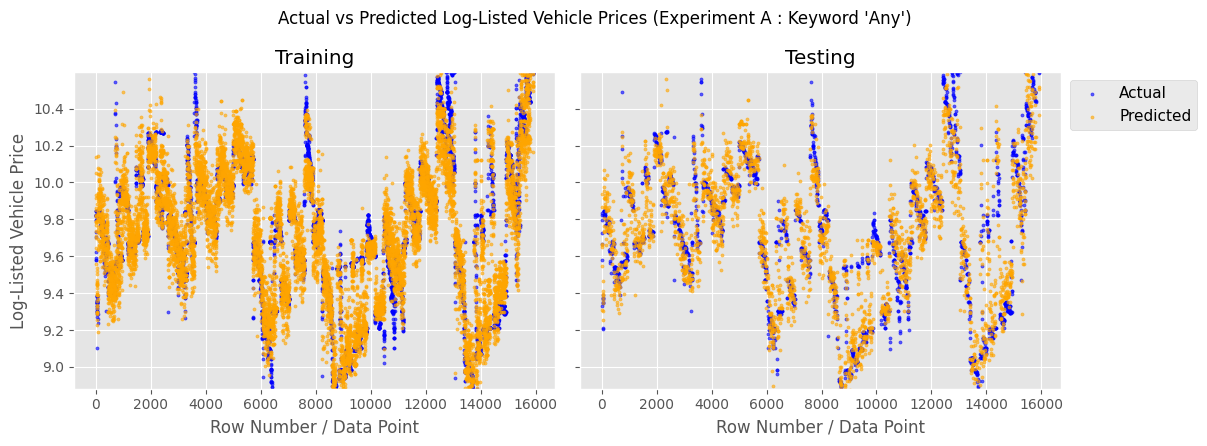

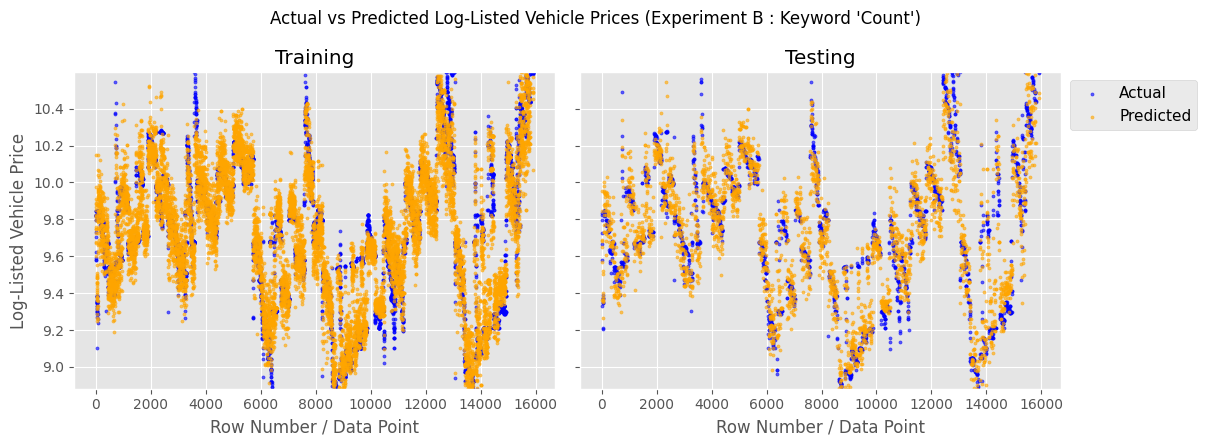

In [83]:
# Quick Visual Comparison of Actual Vs Predicted (Log-Listed Price) using our Custom Function
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Experiment A : Keyword 'Any'
training_vs_testing_fit_visuals(training_log_comparison_df_any, testing_log_comparison_df_any, "(Experiment A : Keyword 'Any')")

# Experiment B : Keyword 'Count'
training_vs_testing_fit_visuals(training_log_comparison_df_count, testing_log_comparison_df_count, "(Experiment B : Keyword 'Count')")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Custom Function for Visualizing Training and Testing Fit
log_progress ("Visualizing and Comparing the Training and Testing Fit for both Experiment A and B.", "DEBUG")   


<span style="font-size:18px; font-weight:bold">Custom Utility – Evaluation Metrics Function</span>

A custom evaluation function was developed to standardise model assessment across all experiments. The function computes key regression metrics including MAE, MAPE, RMSE, R², and Adjusted R² for both training and testing datasets, with support for evaluating performance in both log space and inverse-transformed (real price) space. This ensured consistent, reusable, and transparent model evaluation throughout the project.


In [84]:
# Custom Function: Evaluate the model's performance
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def regression_evaluation_metrics(y_train, y_train_predictions, y_test, y_test_predictions, feature_count, inverse_transform):    

    # Inverse Transformation - Converting Back to Actual Price 
    if inverse_transform == True:
        # Actual Price for Train
        y_train = np.exp(y_train)
        y_train_predictions = np.exp(y_train_predictions)

        # Actual Price for Test
        y_test = np.exp(y_test)
        y_test_predictions = np.exp(y_test_predictions)
        
    def compute_evaluation_metrics(y_actual, y_predictions):

        # Variance
        var = y_actual.var()
        
        # Standard Deviation
        std = y_actual.std()
        
        # Mean
        mean = y_actual.mean()

        # Mean Absolute Error (MAE)
        Mean_Absolute_Error = mean_absolute_error(y_actual, y_predictions)

        # Mean Absolute Percentage Error (MAPE) -- Returns a fraction, Percentage for presentation
        MAPE = mean_absolute_percentage_error(y_actual, y_predictions) * 100
        
        # Mean Squared Error (MSE)
        MSE = mean_squared_error(y_actual, y_predictions)
        
        # Root Mean Squared Error (RMSE)
        RMSE = np.sqrt(MSE)

        # Median Absolute Error
        Median_Absolute_Error = median_absolute_error(y_actual, y_predictions)

        # R-squared (R²)
        r_squared = r2_score(y_actual, y_predictions)

        # Adjusted R-square (Adjusted R²)
        adjusted_r_square = 1 - (1 - r_squared) * (len(y_actual) - 1) / (len(y_actual) - feature_count - 1)

        return var, std, mean, Mean_Absolute_Error, MAPE, MSE, RMSE, Median_Absolute_Error, r_squared, adjusted_r_square

    # Computing Evaluation Metrics
    training_metrics = compute_evaluation_metrics(y_train, y_train_predictions)
    testing_metrics  = compute_evaluation_metrics(y_test , y_test_predictions)
    
    return pd.DataFrame ({"Dataset"               : ["Training", "Testing"], 
                          "Var"                   : [training_metrics[0], testing_metrics[0]],
                          "Std Dev"               : [training_metrics[1], testing_metrics[1]],
                          "Mean"                  : [training_metrics[2], testing_metrics[2]],
                          "Mean Absolute Error"   : [training_metrics[3], testing_metrics[3]],
                          "MAPE"                  : [training_metrics[4], testing_metrics[4]],
                          "MSE"                   : [training_metrics[5], testing_metrics[5]], 
                          "RMSE"                  : [training_metrics[6], testing_metrics[6]], 
                          "Median Absolute Error" : [training_metrics[7], testing_metrics[7]],
                          "R²"                    : [training_metrics[8], testing_metrics[8]],
                          "Adjusted R²"           : [training_metrics[9], testing_metrics[9]]}).set_index("Dataset") 
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Custom Function for Evaluating the model's performance
log_progress ("Custom Function [Evaluation Metrics] - Evaluating Linear Regression Model Performance.", "DEBUG")


<span style="font-size:18px; font-weight:bold">Baseline Model Evaluation</span>

Model performance was evaluated for both feature configurations (binary `_any` features and count-based `_count` features) using standard regression metrics on both the log-transformed target and the original price scale.

Evaluating in log space supports statistical validity, while inverse-transformed results provide real-world interpretability. This dual evaluation enables a fair comparison between the two experiments and helps identify the stronger baseline representation.


In [85]:
# Evaluation Metrics : Experiment A vs Experiment B (Log-Listed Price)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model (Experiment A : Keyword 'Any')
print (color.BOLD + "(Experiment A : Keyword 'Any') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Log-Listed Price:-\n" + color.END)
df_baseline_log_metrics_any = regression_evaluation_metrics(y_train, y_train_predictions_any, y_test, y_test_predictions_any, feature_count= X_train_any.shape[1], inverse_transform = False).round(2)
display (df_baseline_log_metrics_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model (Experiment B : Keyword 'Count')
print (color.BOLD + "(Experiment B : Keyword 'Count') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Log-Listed Price:-\n" + color.END)
df_baseline_log_metrics_count = regression_evaluation_metrics(y_train, y_train_predictions_count, y_test, y_test_predictions_count, feature_count= X_train_count.shape[1], inverse_transform = False).round(2)
display (df_baseline_log_metrics_count)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Evaluating the model's performance
log_progress ("Evaluation: Model performance for both Experiment A and B (Log-Listed Price)", "DEBUG")


(Experiment A : Keyword 'Any') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Log-Listed Price:-



Var  Std Dev  Mean  Mean Absolute Error  MAPE   MSE  RMSE  \
Dataset                                                                
Training  0.14     0.38  9.72                 0.10  0.98  0.02  0.13   
Testing   0.14     0.37  9.72                 0.09  0.95  0.02  0.12   

          Median Absolute Error    R²  Adjusted R²  
Dataset                                             
Training                   0.07  0.89         0.89  
Testing                    0.07  0.89         0.89

(Experiment B : Keyword 'Count') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Log-Listed Price:-



Var  Std Dev  Mean  Mean Absolute Error  MAPE   MSE  RMSE  \
Dataset                                                                
Training  0.14     0.38  9.72                 0.09  0.97  0.02  0.12   
Testing   0.14     0.37  9.72                 0.09  0.96  0.02  0.12   

          Median Absolute Error    R²  Adjusted R²  
Dataset                                             
Training                   0.07  0.89         0.89  
Testing                    0.07  0.89         0.89

In [86]:
# Evaluation Metrics : Experiment A vs Experiment B (Actual Listed Price)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model - Actual Price (Not Log Transformed) (Experiment A : Keyword 'Any')
print (color.BOLD + "(Experiment A : Keyword 'Any') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Listed Price (Real World):-\n" + color.END)
df_baseline_actual_metrics_any = regression_evaluation_metrics(y_train, y_train_predictions_any, y_test, y_test_predictions_any, feature_count= X_train_any.shape[1], inverse_transform = True).round(2)
display (df_baseline_actual_metrics_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model - Actual Price (Not Log Transformed) (Experiment B : Keyword 'Count')
print (color.BOLD + "(Experiment B : Keyword 'Count') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Listed Price (Real World):-\n" + color.END)
df_baseline_actual_metrics_count = regression_evaluation_metrics(y_train, y_train_predictions_count, y_test, y_test_predictions_count, feature_count= X_train_count.shape[1], inverse_transform = True).round(2)
display (df_baseline_actual_metrics_count)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Evaluating the model's performance
log_progress ("Evaluation: Model performance for both Experiment A and B (Actual Listed Price)", "DEBUG")


(Experiment A : Keyword 'Any') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Listed Price (Real World):-



Var  Std Dev      Mean  Mean Absolute Error  MAPE  \
Dataset                                                               
Training  44815040.19  6694.40  17847.23              1751.77  9.53   
Testing   43866430.65  6623.17  17791.42              1721.09  9.30   

                 MSE     RMSE  Median Absolute Error    R²  Adjusted R²  
Dataset                                                                  
Training  6668771.12  2582.40                1178.08  0.85         0.85  
Testing   6639261.31  2576.68                1109.09  0.85         0.85

(Experiment B : Keyword 'Count') Let's view the Evaluation Metrics for our Linear Regression Baseline Model on Listed Price (Real World):-



Var  Std Dev      Mean  Mean Absolute Error  MAPE  \
Dataset                                                               
Training  44815040.19  6694.40  17847.23              1735.23  9.42   
Testing   43866430.65  6623.17  17791.42              1726.99  9.33   

                 MSE     RMSE  Median Absolute Error    R²  Adjusted R²  
Dataset                                                                  
Training  6454468.09  2540.56                1193.18  0.86         0.86  
Testing   6552497.18  2559.78                1157.48  0.85         0.85

In [87]:
# Logging: Final Verdict - Experiment A: Keyword 'Any'
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
log_progress ("Final Verdict - Experiment A: [Keyword 'Any'] Linear Regression Baseline Model", "INFO")


<span style="font-size:18px; font-weight:bold">Model Diagnostics – Residuals vs Fitted Values</span>

Residuals were plotted against predicted values for both training and testing sets to evaluate key linear regression assumptions, including linearity and constant variance. A random scatter around zero without systematic patterns indicates appropriate model behaviour.


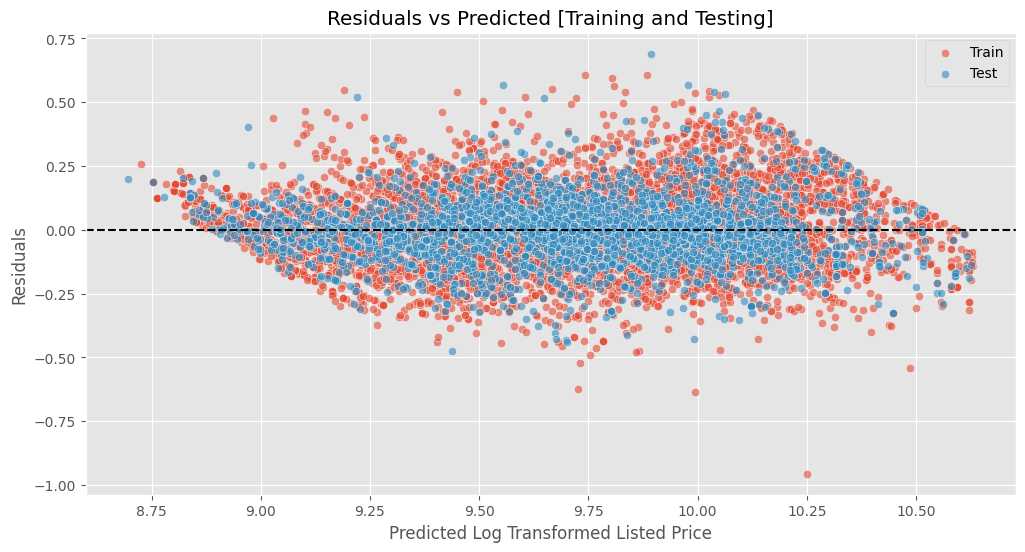

In [88]:
# Linearity check: Plot residuals vs fitted values
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Calculating Training Set Residuals (Actual Price - Predicted Price)
training_residuals = y_train - y_train_predictions_any

# Calculating Testing Set Residuals (Actual Price - Predicted Price)
testing_residuals  = y_test - y_test_predictions_any

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Residuals vs Predicted Target (Visualization)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for Training 
sns.scatterplot(
                x = y_train_predictions_any, 
                y = training_residuals, 
                label = "Train", 
                alpha = 0.6
)

# Plot for Testing
sns.scatterplot(
                x = y_test_predictions_any, 
                y = testing_residuals, 
                label = "Test", 
                alpha = 0.6
)
ax.axhline(0, color = "black", linestyle = "--")
ax.set_xlabel("Predicted Log Transformed Listed Price")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Predicted [Training and Testing]")
ax.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Residuals vs Predicted Log-Transformed Listed Price
log_progress ("Diagnostic Plot [Training and Testing]: Analyzing Residuals vs Predicted Log-Transformed Listed Price", "DEBUG")


<span style="font-size:18px; font-weight:bold">Model Diagnostics – Residual Distribution</span>

The distribution of residuals was examined to assess approximate normality. A bell-shaped distribution centered around zero suggests that model errors are well-behaved and supports the validity of inference from the linear model.


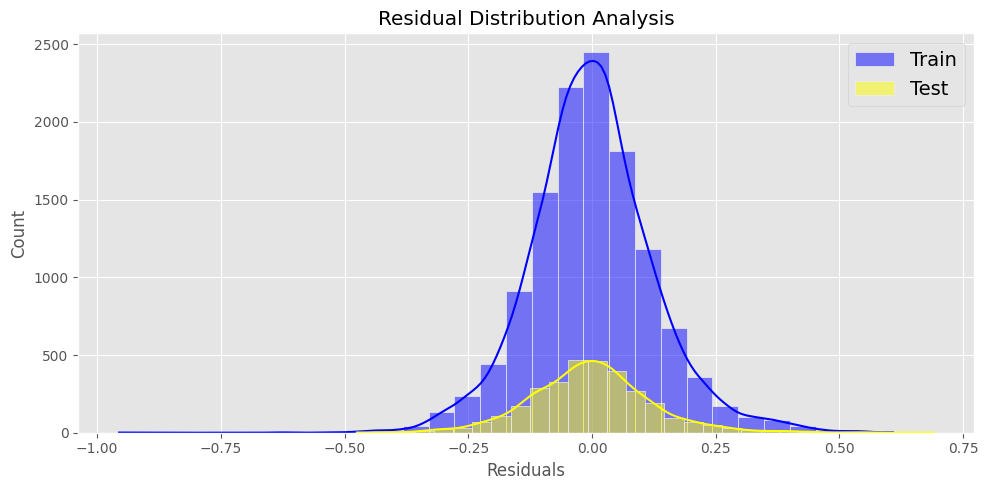

In [89]:
# Distribution of Residuals
# Check the normality of residuals by plotting their distribution
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))

# Distribution of Training Residuals
sns.histplot(
             training_residuals, 
             kde = True, 
             bins = 30, 
             color = "blue", 
             label = "Train", 
             alpha = 0.5
)

# Distribution of Testing Residuals
sns.histplot(
             testing_residuals, 
             kde = True, 
             bins = 30, 
             color = "yellow", 
             label = "Test", 
             alpha = 0.5
)
ax.set_xlabel("Residuals")
ax.set_title("Residual Distribution Analysis")
ax.legend(fontsize=14)
plt.tight_layout();

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Distribution of Residuals
log_progress ("Residual Distribution Analysis [Training and Testing Residuals][Histogram]", "DEBUG")


<span style="font-size:18px; font-weight:bold">Model Diagnostics – Multicollinearity (VIF Analysis)</span>

Variance Inflation Factor (VIF) was used to assess multicollinearity among predictors. This diagnostic helps identify highly correlated features that could destabilise coefficient estimates and reduce model interpretability. Each feature’s VIF score was interpreted using defined thresholds to distinguish between acceptable, moderate, and high multicollinearity, supporting informed decisions about feature inclusion.


In [90]:
# Check for Multicollinearity and Handle
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def vif_interpretation(vif_score):
    if vif_score == 1:
        return "🟩 No Multicollinearity"
    elif 1 < vif_score < 5:
        return "🟩 Mild multicollinearity (Acceptable)"
    elif 5 <= vif_score < 10:
        return "🟨 Moderate multicollinearity (Potential Concern)"
    else:
        return "🟥 High multicollinearity (Consider Feature Removal)"    

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_any.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_any.values, i)
                          for i in range(len(X_train_any.columns))]

vif_data["Interpretation"] = vif_data["VIF"].apply(vif_interpretation)

display(vif_data)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Custom Function for checking Multicollinearity [VIF Score]
log_progress ("Custom Function [VIF Score] - Checking Multicollinearity", "DEBUG")
log_progress ("--------------- [Completed] Completed Baseline Linear Regression Models ---------------\n", "INFO")


Feature        VIF  \
0                             mileage_km   2.810767   
1                        number_of_gears   2.573612   
2                         age_of_vehicle   3.682276   
3              number_of_previous_owners   1.174417   
4                     engine_power_hp_kw   3.950032   
5                             inspection   1.520308   
6                 engine_displacement_cc   4.657487   
7                      vehicle_weight_kg   2.552035   
8              combined_fuel_consumption   3.262617   
9                parking_convenience_any   5.927916   
10       climate_control_convenience_any  24.226397   
11       seating_comfort_convenience_any   5.670870   
12       driving_control_convenience_any  45.954991   
13         interior_tech_convenience_any  11.773433   
14                       audio_media_any  11.186997   
15                connectivity_media_any  23.999190   
16                video_visual_media_any   1.023376   
17     sports_and_performance_extras_any   1.690765   
18       interior_and_comfort_extras_any   2.257645   
19       exterior_and_utility_extras_any  18.133351   
20         special_equipments_extras_any   1.380325   
21                   airbag_security_any  36.293868   
22  lighting_and_visibility_security_any  15.251415   
23         theft_prevention_security_any  24.531679   
24              core_safety_security_any  96.643115   
25       driving_assistance_security_any  18.478589   
26                      model_brand_opel   4.336595   
27                   model_brand_renault   2.511665   
28                    standard_body_type  87.987798   
29                        vat_deductible  19.299837   
30                vehicle_condition_used   5.781726   
31                  fuel_type_non_diesel  11.408655   
32               paint_type_Non-Metallic   1.097757   
33     upholstery_type_part_full_leather   1.786641   
34                   gearing_type_manual   4.072210   
35                 non_front_wheel_drive   1.134777   

                                       Interpretation  
0               🟩 Mild multicollinearity (Acceptable)  
1               🟩 Mild multicollinearity (Acceptable)  
2               🟩 Mild multicollinearity (Acceptable)  
3               🟩 Mild multicollinearity (Acceptable)  
4               🟩 Mild multicollinearity (Acceptable)  
5               🟩 Mild multicollinearity (Acceptable)  
6               🟩 Mild multicollinearity (Acceptable)  
7               🟩 Mild multicollinearity (Acceptable)  
8               🟩 Mild multicollinearity (Acceptable)  
9    🟨 Moderate multicollinearity (Potential Concern)  
10  🟥 High multicollinearity (Consider Feature Rem...  
11   🟨 Moderate multicollinearity (Potential Concern)  
12  🟥 High multicollinearity (Consider Feature Rem...  
13  🟥 High multicollinearity (Consider Feature Rem...  
14  🟥 High multicollinearity (Consider Feature Rem...  
15  🟥 High multicollinearity (Consider Feature Rem...  
16              🟩 Mild multicollinearity (Acceptable)  
17              🟩 Mild multicollinearity (Acceptable)  
18              🟩 Mild multicollinearity (Acceptable)  
19  🟥 High multicollinearity (Consider Feature Rem...  
20              🟩 Mild multicollinearity (Acceptable)  
21  🟥 High multicollinearity (Consider Feature Rem...  
22  🟥 High multicollinearity (Consider Feature Rem...  
23  🟥 High multicollinearity (Consider Feature Rem...  
24  🟥 High multicollinearity (Consider Feature Rem...  
25  🟥 High multicollinearity (Consider Feature Rem...  
26              🟩 Mild multicollinearity (Acceptable)  
27              🟩 Mild multicollinearity (Acceptable)  
28  🟥 High multicollinearity (Consider Feature Rem...  
29  🟥 High multicollinearity (Consider Feature Rem...  
30   🟨 Moderate multicollinearity (Potential Concern)  
31  🟥 High multicollinearity (Consider Feature Rem...  
32              🟩 Mild multicollinearity (Acceptable)  
33              🟩 Mild multicollinearity (Acceptable)  
34              🟩 Mild multicollinear

<span style="font-size:20px; font-weight:bold">Ridge Regression (L2 Regularisation)</span>


<span style="font-size:18px; font-weight:bold">Hyperparameter Search – Defining Alpha Range</span>

A logarithmically spaced range of alpha values was defined to explore different strengths of regularisation. This allows the model to be evaluated across both weak and strong regularisation regimes.


In [91]:
# List of alphas to tune for Ridge Regularization
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
log_progress ("---------------------- L2 Regularization: Ridge Regression Models ---------------------", "INFO")
alphas_list = np.logspace(-3, 3, 100)


<span style="font-size:18px; font-weight:bold">Model Tuning – Alpha Selection Using R²</span>

Ridge regression was first tuned using 5-fold cross-validation (RidgeCV) with R² as the evaluation metric. The model was trained across a logarithmically spaced range of alpha values, and the value that maximised cross-validated R² was selected as the optimal regularisation strength.

To validate this choice, training and testing R² scores were plotted across the full alpha range. This enabled visual inspection of the bias–variance trade-off and helped confirm that the selected alpha offers strong generalisation without excessive overfitting.


Ridge Regression with 5-Fold Cross-Validation (Based on R² Score):-

Best Alpha for Ridge Model: 2.848035868435802

The Training Score for Ridge Model: 0.887571838440472
The Testing Score for Ridge Model: 0.8894145695488991


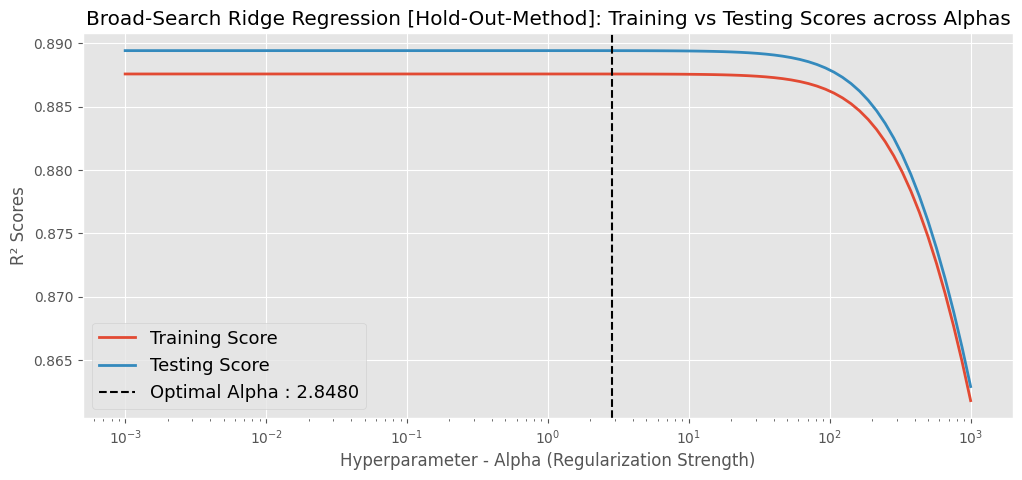

In [92]:
# Applying Ridge Regression with Cross-Validation to select optimal value of Alpha (Based on R² Score)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a Ridge Regression Model with built-in Cross-Validation (Based on R² Score)
ridge_cv = RidgeCV(alphas = alphas_list, scoring= "r2", cv= 5)
ridge_cv.fit(X_train_any, y_train)

print (color.BOLD + "Ridge Regression with 5-Fold Cross-Validation (Based on R² Score):-\n" + color.END)

# Best Alpha Value
print(color.BOLD + "Best Alpha for Ridge Model:" + color.END + f" {ridge_cv.alpha_}\n")

# Best Score (Based on R² Score)
print(color.BOLD + "The Training Score for Ridge Model:" + color.END + f" {ridge_cv.score(X_train_any, y_train)}")
print(color.BOLD + "The Testing Score for Ridge Model:" + color.END + f" {ridge_cv.score(X_test_any, y_test)}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plot Train and Test Scores against Alpha (Based on R² Score)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a list for Tracking Scores
training_scores = list()
testing_scores = list()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Tracking R² Scores across different values of Alpha (Regularization Strength)
for current_alpha in alphas_list:
    # Re-Initializing and Fitting Ridge Regression Model for every loop
    ridge_model = Ridge(alpha= current_alpha, random_state=42)
    ridge_model.fit (X_train_any, y_train)

    # Tracking Scores (Training and Testing)
    training_scores.append(ridge_model.score(X_train_any, y_train))
    testing_scores.append(ridge_model.score(X_test_any, y_test))

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing Training and Testing scores
plt.figure(figsize=(12, 5))
plt.plot(alphas_list, training_scores, label = "Training Score", lw= 2)
plt.plot(alphas_list, testing_scores , label = "Testing Score",  lw= 2)
plt.title("Broad-Search Ridge Regression [Hold-Out-Method]: Training vs Testing Scores across Alphas")
plt.axvline(ridge_cv.alpha_, label = f"Optimal Alpha : {ridge_cv.alpha_:.4f}", color= "black", linestyle= "--")
plt.xlabel("Hyperparameter - Alpha (Regularization Strength)")
plt.xscale("log")
plt.ylabel("R² Scores")
plt.legend(fontsize=13)
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Ridge Regression with 5-Fold-CV [Based on R² Score]
log_progress ("L2 Regularization: Ridge Regression with 5-Fold-CV [Based on R2 Score]", "DEBUG")


<span style="font-size:18px; font-weight:bold">Model Tuning – Alpha Selection Using MAE</span>

In addition to R²-based tuning, Ridge regression was also optimised using 5-fold cross-validation with Mean Absolute Error (MAE) as the evaluation metric. This provides a more interpretable measure of average prediction error in the target space.

The optimal alpha was selected based on cross-validated MAE performance. Training and testing MAE values were then plotted across the full alpha range to visualise error behaviour and validate the stability of the selected regularisation strength.

This dual evaluation (R² and MAE) strengthens confidence in the robustness of the chosen hyperparameter.


Ridge Regression with 5-Fold Cross-Validation (Based on Mean Absolute Error [MAE]):-

Best Alpha (Converged to lower boundary): 0.001
Best Score Log-Listed Price (Neg MAE) : -0.09562502146739163

The Training MAE for Ridge Model: 0.0951569781524018
The Testing MAE for Ridge Model: 0.09272561685512747


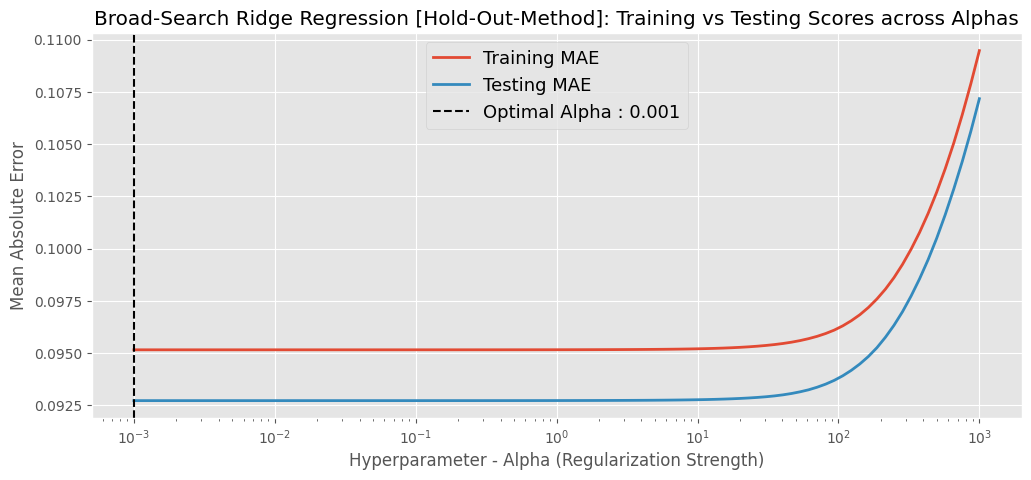

In [93]:
# Applying Ridge Regression with Cross-Validation to select optimal value of Alpha (Based on MAE)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing and Fitting a Ridge Regression Model with built-in 5-Fold Cross-Validation (Based on MAE)
ridge_mae_cv = RidgeCV(alphas= alphas_list, scoring= "neg_mean_absolute_error", cv= 5)
ridge_mae_cv.fit(X_train_any, y_train)

# Predictions and MAE Evaluation Metrics
y_train_ridge_pred = ridge_mae_cv.predict(X_train_any); train_ridge_mae = mean_absolute_error(y_train, y_train_ridge_pred)
y_test_ridge_pred  = ridge_mae_cv.predict(X_test_any) ; test_ridge_mae  = mean_absolute_error(y_test, y_test_ridge_pred)

print (color.BOLD + "Ridge Regression with 5-Fold Cross-Validation (Based on Mean Absolute Error [MAE]):-\n" + color.END)
print (color.BOLD + "Best Alpha (Converged to lower boundary):" + color.END + f" {ridge_mae_cv.alpha_}")
print (color.BOLD + "Best Score Log-Listed Price (Neg MAE) :" + color.END + f" {ridge_mae_cv.best_score_}\n")

print(color.BOLD + "The Training MAE for Ridge Model:" + color.END + f" {train_ridge_mae}")
print(color.BOLD + "The Testing MAE for Ridge Model:" + color.END + f" {test_ridge_mae}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a list for Tracking Scores
training_mae_scores = list()
testing_mae_scores = list()

# Tracking MAE across different values of Alpha (Regularization Strength)
for current_alpha in alphas_list:
    # Re-Initializing and Fitting Ridge Regression Model for every loop
    ridge_model = Ridge(alpha= current_alpha, random_state= 42)
    ridge_model.fit (X_train_any, y_train)

    # In-Loop Predictions
    y_train_mae_preds = ridge_model.predict(X_train_any)
    y_test_mae_preds  = ridge_model.predict(X_test_any)
    
    # Tracking Scores (Training and Testing)
    training_mae_scores.append(mean_absolute_error(y_train, y_train_mae_preds))
    testing_mae_scores.append(mean_absolute_error(y_test, y_test_mae_preds))

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing Training and Testing scores
plt.figure(figsize=(12, 5))
plt.plot(alphas_list, training_mae_scores, label = "Training MAE", lw= 2)
plt.plot(alphas_list, testing_mae_scores , label = "Testing MAE",  lw= 2)
plt.xscale("log")
plt.title("Broad-Search Ridge Regression [Hold-Out-Method]: Training vs Testing Scores across Alphas")
plt.xlabel("Hyperparameter - Alpha (Regularization Strength)")
plt.ylabel("Mean Absolute Error")
plt.axvline(ridge_mae_cv.alpha_, label = f"Optimal Alpha : {ridge_mae_cv.alpha_}", color= "black", linestyle= "--")
plt.legend(fontsize=13)
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Ridge Regression with 5-Fold-CV [Based on MAE]
log_progress ("L2 Regularization: Ridge Regression with 5-Fold-CV [Based on MAE]", "DEBUG")


<span style="font-size:18px; font-weight:bold">Model Selection – Choosing Between R² and MAE Optimised Ridge</span>

Two Ridge models were compared: one tuned using R² and another tuned using MAE. While R² focuses on minimising squared errors (penalising large mistakes more heavily), MAE reflects average real-world pricing error in currency terms.

Both models were evaluated on actual (inverse-transformed) prices and compared using mean absolute error in euros. A small, domain-informed threshold was used to determine whether the difference was practically meaningful.

This step ensures the final model choice is driven not only by statistical performance, but also by business relevance and practical impact.


In [94]:
# Picking a suitable metric --> Since they both serve different purpose
# R² Score --> Sensitive to few extreme values (Outliers - Large errors penalized heavily due to squared residuals) [Designed to minimize squared errors]
# MAE      --> Measures Average Overall Error (Treats all errors equally - Ideal for Car Prices) [Does not minimize MAE]
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Setting the Alphas to Best One found in 5-Fold Cross-Validation
optimal_alpha_mae = ridge_mae_cv.alpha_
optimal_alpha_r2  = ridge_cv.alpha_

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Model 1: MAE Optimal Alpha (Alpha: 0.001) - Initializing and Fitting
mae_model_optimal = Ridge(alpha= optimal_alpha_mae, random_state= 42).fit(X_train_any, y_train)

# Predicting the Log-Transformed Vehicles Prices and Transforming to Real Prices (Log --> Real Currency)
prediction_log_mae_optimal  = mae_model_optimal.predict(X_test_any)
prediction_real_mae_optimal = np.expm1(prediction_log_mae_optimal)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Model 2: R² Optimal Alpha (Alpha ~ 4.977) - Initializing and Fitting
r2_model_optimal = Ridge(alpha= optimal_alpha_r2, random_state= 42).fit(X_train_any, y_train)

# Predicting the Log-Transformed Vehicles Prices and Transforming to Real Prices (Log --> Real Currency)
prediction_log_r2_optimal  = r2_model_optimal.predict(X_test_any)
prediction_real_r2_optimal = np.expm1(prediction_log_r2_optimal)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Comparing Absolute Error in Currency
y_test_real                 = np.expm1(y_test)
mae_error_low_alpha         = mean_absolute_error(y_test_real, prediction_real_mae_optimal)
r2_mae_error_high_alpha     = mean_absolute_error(y_test_real, prediction_real_r2_optimal)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (color.BOLD + "Decision Making Step : R² vs MAE" + color.END)

print ("-" * 140)

print (color.BOLD + "Model 1 - MAE:" + color.END + f" Alpha {optimal_alpha_mae} --> Average Error {mae_error_low_alpha}")
print (color.BOLD + "Model 2 - R2 :" + color.END + f" Alpha {optimal_alpha_r2}  --> Average Error {r2_mae_error_high_alpha}")

print ("-" * 140)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Negligible Threshold -- Domain Driven
negligible_threshold_eur = 5

# Difference in EUR (Between the Two Models)
difference_in_eur = abs (mae_error_low_alpha - r2_mae_error_high_alpha)

print (color.BOLD + "🟩 Final Decision" + color.END)

# Decision Maker -- We select the Evaluation Metric
if negligible_threshold_eur > difference_in_eur:
    print(color.BOLD + "🟨 Difference is Negligible -->" + color.END + f" Threshold (EUR) {negligible_threshold_eur} > Difference (EUR) {difference_in_eur:.2f}")
    print(color.BOLD + "🟩 Model 2 - R²: (High Alpha) -->" + color.END + f" More robust to outliers, and less likely to overreact to unseen data.")
    print("R² tuned model has a more active regularization compared to MAE. We are optimizing the same error structure the Ridge Model cares about.\n(Squared-Error-Optimization)")
    log_progress ("Final Decision - Model 2 - R2: Has a more active regularization. [Squared-Error-Optimization]", "DEBUG")
    
elif mae_error_low_alpha < r2_mae_error_high_alpha:
    print(color.BOLD + "🟩 Model 1 - MAE: (Low Alpha) -->" + color.END +  f" Saves EUR {r2_mae_error_high_alpha - mae_error_low_alpha:.2f} per vehicle on average.")
    print(color.BOLD + "🟨 Consideration / Warning -->" + color.END + f"In log-space MAE (alpha --> 0). Ridge does not minimize MAE.")
    log_progress ("Decision - Model 1 - MAE: In log-space MAE (alpha --> 0). Ridge does not minimize MAE.", "WARNING")
    
else:
    print(color.BOLD + "🟩 Model 2 - R²: (High Alpha) -->" + color.END +  f" Saves EUR {mae_error_low_alpha - r2_mae_error_high_alpha:.2f} per vehicle on average.")
    print("R² tuned model has a more active regularization compared to MAE. We are optimizing the same error structure the Ridge Model cares about.\n(Squared-Error-Optimization)")
    log_progress ("Final Decision - Model 2 - R2: Has a more active regularization. [Squared-Error-Optimization]", "DEBUG")
    

Decision Making Step : R² vs MAE
--------------------------------------------------------------------------------------------------------------------------------------------
Model 1 - MAE: Alpha 0.001 --> Average Error 1721.0896748339876
Model 2 - R2 : Alpha 2.848035868435802  --> Average Error 1721.0686616803944
--------------------------------------------------------------------------------------------------------------------------------------------
🟩 Final Decision
🟨 Difference is Negligible --> Threshold (EUR) 5 > Difference (EUR) 0.02
🟩 Model 2 - R²: (High Alpha) --> More robust to outliers, and less likely to overreact to unseen data.
R² tuned model has a more active regularization compared to MAE. We are optimizing the same error structure the Ridge Model cares about.
(Squared-Error-Optimization)


<span style="font-size:18px; font-weight:bold">Fine-Tuning the Regularisation Strength</span>

After identifying a promising alpha range from the broad search, a narrower interval was explored to fine-tune the regularisation strength. Ridge regression was re-evaluated using 5-fold cross-validation with R² as the scoring metric across this refined range. This step enables more precise hyperparameter selection and ensures the final model is optimally balanced between bias and variance.


In [95]:
# Take a Smaller Range of Alpha to Test [Applying Ridge regression with built-in Cross-Validation (Based on R² Score)]
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Smaller Range of Alpha (For Fine Tuning)
alphas_list_fine_tuning = np.linspace(2, 4, 200)

# Initializing and Fine Tuning a Ridge Regression Model with built-in Cross-Validation (Based on R² Score)
ridge_finetune_cv = RidgeCV(alphas = alphas_list_fine_tuning, scoring= "r2", cv= 5)
ridge_finetune_cv.fit(X_train_any, y_train)

print (color.BOLD + "Fine-Tuned Ridge Regression with 5-Fold Cross-Validation (Based on R² Score):-\n" + color.END)

# Best Alpha Value
print(color.BOLD + "Best Alpha for Fine-Tuned Ridge Model:" + color.END + f" {ridge_finetune_cv.alpha_}\n")

# Best Score (Based on R² Score)
print(color.BOLD + "Best 5-Fold-Cross-Validation Score for Fine-Tuned Ridge Model [R²]:" + color.END + f" {ridge_finetune_cv.best_score_}")
print(color.BOLD + "The Training Score for Fine-Tuned Ridge Model [R²]:" + color.END + f" {ridge_finetune_cv.score(X_train_any, y_train)}")
print(color.BOLD + "The Testing Score for Fine-Tuned Ridge Model [R²]:" + color.END + f" {ridge_finetune_cv.score(X_test_any, y_test)}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Fine-Tuned Ridge Regression with 5-Fold-CV [Based on R² Score][Finding Best Alpha]
log_progress (f"L2 Regularization: Ridge Regression with 5-Fold-CV [Based on R2 Score] Fine-Tuned Alpha - {ridge_finetune_cv.alpha_:.5f}", "DEBUG")


Fine-Tuned Ridge Regression with 5-Fold Cross-Validation (Based on R² Score):-

Best Alpha for Fine-Tuned Ridge Model: 2.8944723618090453

Best 5-Fold-Cross-Validation Score for Fine-Tuned Ridge Model [R²]: 0.8864365194740671
The Training Score for Fine-Tuned Ridge Model [R²]: 0.8875717666532353
The Testing Score for Fine-Tuned Ridge Model [R²]: 0.8894144905851791


<span style="font-size:18px; font-weight:bold">Final Ridge Model</span>

Using the optimised alpha obtained from cross-validation, a final Ridge regression model was trained on the training dataset. Predictions were generated for both training and testing sets to enable subsequent performance evaluation and comparison with other models.


In [96]:
# Fine-Tuned Ridge Regression Model (Using the Best Alpha)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Applying and Fitting Fine-Tuned Ridge Regression Model
ridge_fine_tuned_model = Ridge (alpha= ridge_finetune_cv.alpha_, random_state= 42)
ridge_fine_tuned_model.fit (X_train_any, y_train)

# Making Predictions -- Purpose: To Evaluate the Ridge model on the Training and Testing data
y_train_ridge_fine_tuned_predictions = ridge_fine_tuned_model.predict(X_train_any)
y_test_ridge_fine_tuned_predictions = ridge_fine_tuned_model.predict(X_test_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Fine-Tuned Ridge Regression
log_progress (f"L2 Regularization: Fine-Tuned Ridge Regression Model built successfully.", "INFO")


<span style="font-size:18px; font-weight:bold">Ridge Model Evaluation</span>

The fine-tuned Ridge model was evaluated on both training and testing sets using standard regression metrics. Performance was assessed in log space for statistical consistency and also on the inverse-transformed prices to provide real-world interpretability. This evaluation establishes the final Ridge model’s predictive performance and prepares it for comparison against Lasso regression and the baseline model.


In [97]:
# Evaluation Metrics -- Fine-Tuned Ridge Regression
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model (Based on R² Score --> Log-Listed Price)
print (color.BOLD + "(R² Score) Let's view the Evaluation Metrics for our Ridge Regression Fine-Tuned Model on Log-Listed Price:-\n" + color.END)
df_ridge_log_metrics_any = regression_evaluation_metrics(y_train, y_train_ridge_fine_tuned_predictions, y_test, y_test_ridge_fine_tuned_predictions, feature_count= X_train_any.shape[1], inverse_transform = False).round(2)
display (df_ridge_log_metrics_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model (Based on R² Score --> Actual Listed Price)
print (color.BOLD + "(R² Score) Let's view the Evaluation Metrics for our Ridge Regression Fine-Tuned Model on Actual Listed Price (Real World):-\n" + color.END)
df_ridge_actual_metrics_any = regression_evaluation_metrics(y_train, y_train_ridge_fine_tuned_predictions, y_test, y_test_ridge_fine_tuned_predictions, feature_count= X_train_any.shape[1], inverse_transform = True).round(2)
display (df_ridge_actual_metrics_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Fine-Tuned Ridge Regression Evaluation
log_progress (f"Evaluation [L2 Regularization]: Fine-Tuned Ridge Regression Model evaluation metrics generated.", "DEBUG")


(R² Score) Let's view the Evaluation Metrics for our Ridge Regression Fine-Tuned Model on Log-Listed Price:-



Var  Std Dev  Mean  Mean Absolute Error  MAPE   MSE  RMSE  \
Dataset                                                                
Training  0.14     0.38  9.72                 0.10  0.98  0.02  0.13   
Testing   0.14     0.37  9.72                 0.09  0.95  0.02  0.12   

          Median Absolute Error    R²  Adjusted R²  
Dataset                                             
Training                   0.07  0.89         0.89  
Testing                    0.07  0.89         0.89

(R² Score) Let's view the Evaluation Metrics for our Ridge Regression Fine-Tuned Model on Actual Listed Price (Real World):-



Var  Std Dev      Mean  Mean Absolute Error  MAPE  \
Dataset                                                               
Training  44815040.19  6694.40  17847.23              1751.75  9.53   
Testing   43866430.65  6623.17  17791.42              1721.07  9.30   

                 MSE     RMSE  Median Absolute Error    R²  Adjusted R²  
Dataset                                                                  
Training  6667455.54  2582.14                1178.34  0.85         0.85  
Testing   6637428.26  2576.32                1112.37  0.85         0.85

<span style="font-size:18px; font-weight:bold">Fine-Tuning Validation – Error vs Alpha Curve</span>

After selecting the optimal alpha via cross-validation, the training and testing performance was re-evaluated across the fine-tuned alpha range using a hold-out approach. Plotting performance against alpha provides a clear visual confirmation of the stability of the chosen regularisation strength. This step helps verify that the selected alpha lies near the optimal region of generalisation rather than being a local artefact of cross-validation.


Best Alpha for Fine-Tuned Ridge Model: 2.8944723618090453

Log-Listed Price Test Score [Negative MAE] : -0.0927363107482242


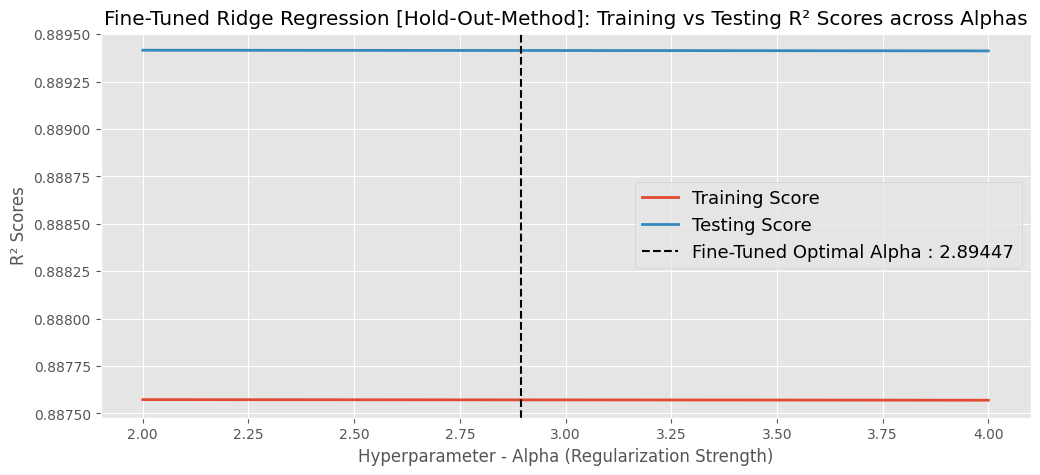

In [98]:
# Initializing a list for Tracking Scores
training_fine_tuned_scores = list()
testing_fine_tuned_scores = list()

# Tracking R² Scores across different values of Alpha (Regularization Strength)
for current_alpha in alphas_list_fine_tuning:
    # Re-Initializing and Fitting Ridge Regression Model for every loop
    ridge_model = Ridge(alpha= current_alpha, random_state=42)
    ridge_model.fit (X_train_any, y_train)

    # Tracking Scores (Training and Testing)
    training_fine_tuned_scores.append(ridge_model.score(X_train_any, y_train))
    testing_fine_tuned_scores.append(ridge_model.score(X_test_any, y_test))
    
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Best Alpha Value for Ridge regression
print(color.BOLD + "Best Alpha for Fine-Tuned Ridge Model:" + color.END + f" {ridge_finetune_cv.alpha_}\n")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Test score (negative MAE)
print (color.BOLD + "Log-Listed Price Test Score [Negative MAE] :" + color.END + f" {-mean_absolute_error (y_test, y_test_ridge_fine_tuned_predictions)}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing Training and Testing scores [Plot train and test scores against alpha]
plt.figure(figsize=(12, 5))
plt.plot(alphas_list_fine_tuning, training_fine_tuned_scores, label = "Training Score", lw= 2)
plt.plot(alphas_list_fine_tuning, testing_fine_tuned_scores , label = "Testing Score",  lw= 2)
plt.axvline(ridge_finetune_cv.alpha_, label = f"Fine-Tuned Optimal Alpha : {ridge_finetune_cv.alpha_:.5f}", color= "black", linestyle= "--")
plt.title("Fine-Tuned Ridge Regression [Hold-Out-Method]: Training vs Testing R² Scores across Alphas")
plt.xlabel("Hyperparameter - Alpha (Regularization Strength)")
plt.ylabel("R² Scores")
plt.legend(fontsize=13)
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Fine-Tuned Ridge Regression [Hold-Out-Method]: Training vs Testing Scores across Alphas
log_progress (f"Visualizing Fine-Tuned Ridge Regression [Hold-Out-Method]: Training vs Testing R2 Scores across Alphas", "DEBUG")


In [99]:
# Best alpha for Ridge regression
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (color.BOLD + "Best Alpha for Ridge Regression:" + color.END + f" {ridge_fine_tuned_model.alpha}")


Best Alpha for Ridge Regression: 2.8944723618090453


<span style="font-size:18px; font-weight:bold">Model Interpretation – Ridge Coefficients</span>

The learned coefficients from the fine-tuned Ridge model were extracted to understand how each feature contributes to price prediction. Examining coefficient magnitude and direction helps interpret feature influence while reflecting the stabilising effect of L2 regularisation.


In [100]:
# Show the coefficients for each feature
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
coefficient_df = pd.DataFrame({"Feature": X_train_any.columns, "Ridge - Coefficients": ridge_fine_tuned_model.coef_}).round(4)
display (coefficient_df)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Coefficients from Ridge Regression
log_progress (f"L2 Regularization: Coefficients have been preserved from Fine-Tuned Ridge Regression Model.", "DEBUG")
log_progress ("---------------- [Completed] L2 Regularization: Ridge Regression Models ---------------\n", "INFO")


Feature  Ridge - Coefficients
0                             mileage_km               -0.0907
1                        number_of_gears                0.0218
2                         age_of_vehicle               -0.0928
3              number_of_previous_owners                0.0008
4                     engine_power_hp_kw                0.1803
5                             inspection                0.0008
6                 engine_displacement_cc               -0.0539
7                      vehicle_weight_kg                0.0691
8              combined_fuel_consumption                0.0155
9                parking_convenience_any                0.0481
10       climate_control_convenience_any                0.0260
11       seating_comfort_convenience_any                0.0655
12       driving_control_convenience_any               -0.0271
13         interior_tech_convenience_any                0.0212
14                       audio_media_any               -0.0087
15                connectivity_media_any                0.0056
16                video_visual_media_any                0.0676
17     sports_and_performance_extras_any               -0.0072
18       interior_and_comfort_extras_any                0.0009
19       exterior_and_utility_extras_any                0.0175
20         special_equipments_extras_any                0.0051
21                   airbag_security_any               -0.0098
22  lighting_and_visibility_security_any               -0.0474
23         theft_prevention_security_any               -0.0049
24              core_safety_security_any               -0.0052
25       driving_assistance_security_any               -0.0171
26                      model_brand_opel               -0.2923
27                   model_brand_renault               -0.2699
28                    standard_body_type               -0.0144
29                        vat_deductible                0.0034
30                vehicle_condition_used               -0.0331
31                  fuel_type_non_diesel               -0.1162
32               paint_type_Non-Metallic                0.0119
33     upholstery_type_part_full_leather                0.0587
34                   gearing_type_manual               -0.0944
35                 non_front_wheel_drive               -0.0222

<span style="font-size:20px; font-weight:bold">Lasso Regression (L1 Regularisation)</span>


<span style="font-size:18px; font-weight:bold">Hyperparameter Search – Defining Alpha Range</span>

A wide, logarithmically spaced range of alpha values was defined to explore different strengths of L1 regularisation. This allows the model to be evaluated across both weak and strong regularisation regimes, supporting effective feature selection and model sparsity.


In [101]:
# List of alphas to tune for Lasso regularisation
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
log_progress ("---------------------- L1 Regularization: Lasso Regression Models ---------------------", "INFO")
alphas_list = np.logspace(-6, 6, 200)


In [102]:
# List of alphas to tune for Lasso regularisation
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
param_grid = {"alpha": np.logspace(-6, 2, 500)} 


<span style="font-size:18px; font-weight:bold">Model Tuning – Alpha Selection Using MSE (LassoCV)</span>

Lasso regression was tuned using 5-fold cross-validation via LassoCV, where the optimal alpha was selected based on Mean Squared Error (MSE). This is consistent with the Lasso objective function, which explicitly minimises squared error with an L1 penalty.

Although MSE was used internally for hyperparameter selection, model performance was evaluated using R² on both training and testing sets to maintain consistency with previous models.  

To further validate the selected alpha, training and testing R² scores were plotted across the full alpha range using a hold-out approach. This visual inspection helps confirm that the chosen regularisation strength provides stable generalisation performance.


Lasso Regression with 5-Fold Cross-Validation (Based on MSE):-
Note:The Best Alpha is chosen using MSE (5-Fold-Cross-Validation) while R² is used for evaluation.

Best Alpha for Lasso Model: 3.696912707195024e-05

(Based on R² Score) The Training Score for Lasso Model: 0.8875623419560618
(Based on R² Score) The Testing Score for Lasso Model: 0.8893935910137075


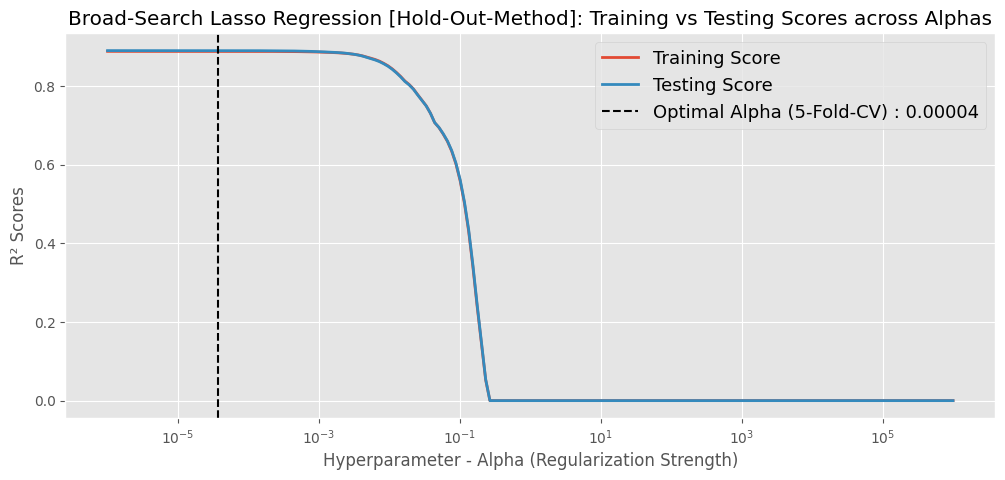

In [103]:
# Applying Lasso Regression with Cross-Validation to select optimal value of Alpha (Based on Mean Square Error [MSE]) (Evaluation : R² Score)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a Lasso Regression Model with built-in Cross-Validation (Based on Mean Square Error [MSE])
lasso_cv = LassoCV(random_state=42, max_iter= 20000, alphas= alphas_list, cv= 5)
lasso_cv.fit(X_train_any, y_train)

print (color.BOLD + "Lasso Regression with 5-Fold Cross-Validation (Based on MSE):-" + color.END)
print (color.BOLD + "Note:" + color.END + "The Best Alpha is chosen using MSE (5-Fold-Cross-Validation) while R² is used for evaluation.\n")
# Best Alpha Value
print(color.BOLD + "Best Alpha for Lasso Model:" + color.END + f" {lasso_cv.alpha_}\n")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Best Score (Based on R² Score)
print(color.BOLD + "(Based on R² Score) The Training Score for Lasso Model:" + color.END + f" {lasso_cv.score(X_train_any, y_train)}")
print(color.BOLD + "(Based on R² Score) The Testing Score for Lasso Model:" + color.END + f" {lasso_cv.score(X_test_any, y_test)}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plot Train and Test Scores against Alpha (Based on R² Score)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a list for Tracking Scores
training_scores = list()
testing_scores = list()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Tracking R² Scores across different values of Alpha (Regularization Strength)
for current_alpha in alphas_list:
    # Re-Initializing and Fitting Lasso Regression Model for every loop
    lasso_model = Lasso(alpha= current_alpha, random_state=42, max_iter= 20000)
    lasso_model.fit (X_train_any, y_train)

    # Tracking Scores (Training and Testing)
    training_scores.append(lasso_model.score(X_train_any, y_train))
    testing_scores.append(lasso_model.score(X_test_any, y_test))

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing Training and Testing scores
plt.figure(figsize=(12, 5))
plt.plot(alphas_list, training_scores, label = "Training Score", lw= 2)
plt.plot(alphas_list, testing_scores , label = "Testing Score",  lw= 2)
plt.axvline(lasso_cv.alpha_, label = f"Optimal Alpha (5-Fold-CV) : {lasso_cv.alpha_:.5f}", color= "black", linestyle= "--")
plt.title("Broad-Search Lasso Regression [Hold-Out-Method]: Training vs Testing Scores across Alphas")
plt.xlabel("Hyperparameter - Alpha (Regularization Strength)")
plt.xscale("log")
plt.ylabel("R² Scores")
plt.legend(fontsize=13)
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: L1 Regularization [Mean Square Error [MSE]]
log_progress (f"L1 Regularization: Lasso Regression with 5-Fold-Cross-Validation to select optimal value of Alpha (Based on MSE)", "DEBUG")


<span style="font-size:18px; font-weight:bold">Alternative Tuning Strategy – GridSearchCV Using MAE</span>

In addition to LassoCV (MSE-based tuning), a second hyperparameter optimisation strategy was implemented using GridSearchCV with Mean Absolute Error (MAE) as the scoring metric. This approach directly optimises average prediction error, which is more interpretable in the context of vehicle pricing.

A wide alpha grid was explored using 5-fold cross-validation, and the alpha value that minimised MAE was selected. Training and validation MAE were plotted across alpha values to visually confirm the stability and reliability of the selected regularisation strength.

This dual-tuning strategy (MSE-based via LassoCV and MAE-based via GridSearchCV) provides stronger confidence in the robustness of the final model choice.


Fitting 5 folds for each of 500 candidates, totalling 2500 fits

Goal: Maximize Negative MAE ---> Equivalent to Minimizing Mean Absolute Error

Number of Iterations for Convergence: 47
Best Alpha: 2.7725907598604812e-05
Best Score [Negative MAE] : -0.09562077787297171


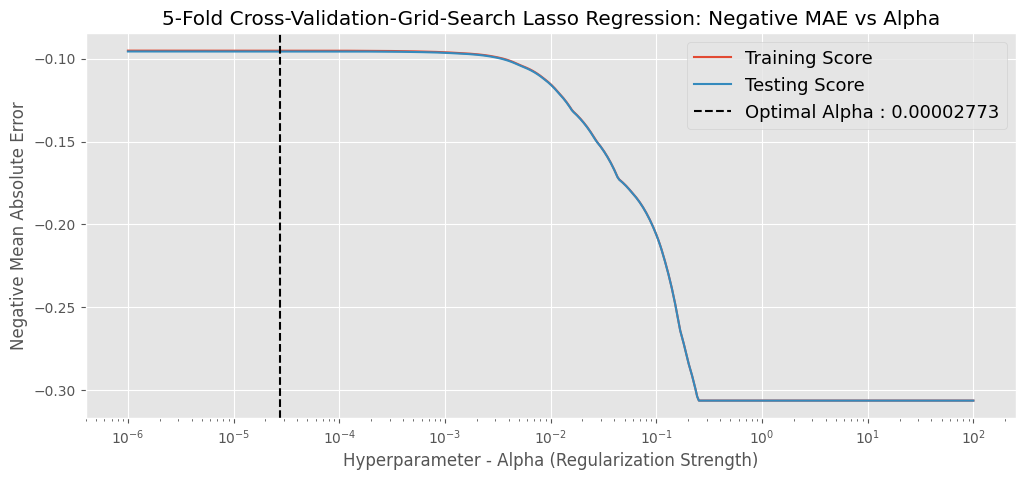

In [104]:
# Implementation using GridSearchCV (Based on Mean Absolute Error [Log-Transformed Listed Price])
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initialise Lasso Regression Model
lasso = Lasso(random_state=42, max_iter= 20000)

# GridSearchCV for tuning Lasso hyperparameters
grid_model_cv = GridSearchCV(estimator= lasso, param_grid = param_grid, scoring = "neg_mean_absolute_error", 
                             cv=5, n_jobs=-1, return_train_score=True, verbose=1)

# Fitting the Model
grid_model_cv.fit(X_train_any, y_train)
print()

# Goal of this Model
print(color.BOLD + "Goal: " + color.END + "Maximize Negative MAE ---> Equivalent to Minimizing Mean Absolute Error\n")

# Check number of iterations for convergence
print(color.BOLD + "Number of Iterations for Convergence:" + color.END + f" {grid_model_cv.best_estimator_.n_iter_}")

# Best Alpha
print (color.BOLD + "Best Alpha:" + color.END + f" {grid_model_cv.best_params_['alpha']}")

# Best score (Negative MAE)
print (color.BOLD + "Best Score [Negative MAE] :" + color.END + f" {grid_model_cv.best_score_}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing Negative MAE vs Alpha
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Converting Cross-Validation Results into a DataFrame and Sorting by Alpha
cv_results = pd.DataFrame(grid_model_cv.cv_results_).sort_values(by= "param_alpha")

# DataType Conversion: For Visualization
cv_results["param_alpha"] = cv_results["param_alpha"].astype("float64")

# Plot Negative MAE vs Alpha
plt.figure(figsize=(12, 5))
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"], label= "Training Score")
plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"], label= "Testing Score")
plt.axvline(grid_model_cv.best_params_["alpha"], 
            label = f"Optimal Alpha : {grid_model_cv.best_params_['alpha']:.8f}", 
            color= "black", linestyle= "--")
plt.title("5-Fold Cross-Validation-Grid-Search Lasso Regression: Negative MAE vs Alpha")
plt.xlabel("Hyperparameter - Alpha (Regularization Strength)")
plt.xscale("log")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(fontsize=13)
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: L1 Regularization [Mean Absolute Error[MAE]]
log_progress (f"L1 Regularization: Lasso Regression with 5-Fold-Cross-Validation to select optimal value of Alpha (Based on MAE)", "DEBUG")


<span style="font-size:18px; font-weight:bold">Model Selection – Choosing Between MSE-Optimised and MAE-Optimised Lasso</span>

Two Lasso models were compared: one tuned using Mean Squared Error (via LassoCV) and another tuned using Mean Absolute Error (via GridSearchCV). While MSE penalises large pricing errors more aggressively, MAE reflects average real-world error and offers greater interpretability for pricing decisions.

Both models were evaluated on inverse-transformed (actual currency) predictions, and their average absolute errors were compared using a small, domain-informed threshold. This ensures the final model choice is guided not only by statistical performance, but also by practical business impact and pricing consistency.


In [105]:
# Picking a suitable metric --> Since they both serve different purpose
# MSE --> Sensitive to a few extreme values (Outliers - Penalizes large deviations heavily)
# MAE --> Measures Average Overall Error (Treats all errors equally - Ideal for Consistent Model for predicting Car Prices)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Setting the Alphas to Best One found in 5-Fold Cross-Validation
lasso_optimal_alpha_mse = lasso_cv.alpha_
lasso_optimal_alpha_mae  = grid_model_cv.best_params_["alpha"]

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Model 1: MSE Optimal Alpha (Alpha ≈ 3.6969) - Initializing and Fitting
lasso_mse_model_optimal = Lasso(alpha= lasso_optimal_alpha_mse, random_state= 42, max_iter= 20000).fit(X_train_any, y_train)

# Predicting the Log-Transformed Vehicles Prices and Transforming to Real Prices (Log --> Real Currency)
lasso_prediction_log_mse_optimal  = lasso_mse_model_optimal.predict(X_test_any)
lasso_prediction_real_mse_optimal = np.expm1(lasso_prediction_log_mse_optimal)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Model 2: MAE Optimal Alpha (Alpha ≈ 2.772) - Initializing and Fitting
lasso_mae_model_optimal = Lasso(alpha= lasso_optimal_alpha_mae, random_state= 42, max_iter= 20000).fit(X_train_any, y_train)

# Predicting the Log-Transformed Vehicles Prices and Transforming to Real Prices (Log --> Real Currency)
lasso_prediction_log_mae_optimal  = lasso_mae_model_optimal.predict(X_test_any)
lasso_prediction_real_mae_optimal = np.expm1(lasso_prediction_log_mae_optimal)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Comparing Absolute Error in Currency
y_test_real     = np.expm1(y_test)
lasso_mse_error = mean_absolute_error(y_test_real, lasso_prediction_real_mse_optimal)
lasso_mae_error = mean_absolute_error(y_test_real, lasso_prediction_real_mae_optimal)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (color.BOLD + "Decision Making Step : MSE (LassoCV) vs MAE (GridSearchCV)" + color.END)

print ("-" * 140)

print (color.BOLD + "Model 1 - MSE (LassoCV):" + color.END + f" Alpha {lasso_optimal_alpha_mse} --> Average Error {lasso_mse_error}")
print (color.BOLD + "Model 2 - MAE (GridSearchCV):" + color.END + f" Alpha {lasso_optimal_alpha_mae} --> Average Error {lasso_mae_error}")

print ("-" * 140)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Negligible Threshold -- Domain Driven
negligible_threshold_eur = 5

# Difference in EUR (Between the Two Models)
difference_in_eur = abs (lasso_mae_error - lasso_mse_error)

print (color.BOLD + "🟩 Final Decision" + color.END)

# Decision Maker -- We select the Evaluation Metric
if negligible_threshold_eur > difference_in_eur:
    print(color.BOLD + "🟨 Difference is Negligible -->" + color.END + f" Threshold (EUR) {negligible_threshold_eur} > Difference (EUR) {difference_in_eur:.2f}")
    print(color.BOLD + "🟩 Model 2 - MAE: (GridSearchCV) -->" + color.END +  f" Consistent Predictions of Vehicle Prices.")
    print(color.BOLD + "Consistency:" + color.END + " Preferable Choice for consistent average accuracy. More robust to outliers and provides more stable pricing errors.")
    log_progress (f"Model 2 - MAE: (GridSearchCV) --> Preferable Choice for consistent average accuracy.", "DEBUG")
    
elif lasso_mse_error < lasso_mae_error:
    print(color.BOLD + "🟩 Model 1 - MSE: (LassoCV) -->" + color.END +  f" Saves EUR {lasso_mae_error - lasso_mse_error:.2f} per vehicle on average.")
    print(color.BOLD + "🟨 Consideration / Warning -->" + color.END + f"Penalizes large pricing errors more strongly. Tries to eliminate expensive mistakes at the cost of slightly less accuracy on average.\n(Squared-Error-Optimization)")
    log_progress (f"Model 1 - MSE: (LassoCV) -->  Tries to eliminate expensive mistakes at the cost of slightly less accuracy on average.", "WARNING")

else:
    print(color.BOLD + "🟩 Model 2 - MAE: (GridSearchCV) -->" + color.END +  f" Saves EUR {lasso_mse_error - lasso_mae_error:.2f} per vehicle on average.")
    print(color.BOLD + "Consistency:" + color.END + " Preferable Choice for consistent average accuracy. More robust to outliers and provides more stable pricing errors.")
    log_progress (f"Model 2 - MAE: (GridSearchCV) --> Preferable Choice for consistent average accuracy.", "DEBUG")
    

Decision Making Step : MSE (LassoCV) vs MAE (GridSearchCV)
--------------------------------------------------------------------------------------------------------------------------------------------
Model 1 - MSE (LassoCV): Alpha 3.696912707195024e-05 --> Average Error 1721.4092220833188
Model 2 - MAE (GridSearchCV): Alpha 2.7725907598604812e-05 --> Average Error 1721.3109878869448
--------------------------------------------------------------------------------------------------------------------------------------------
🟩 Final Decision
🟨 Difference is Negligible --> Threshold (EUR) 5 > Difference (EUR) 0.10
🟩 Model 2 - MAE: (GridSearchCV) --> Consistent Predictions of Vehicle Prices.
Consistency: Preferable Choice for consistent average accuracy. More robust to outliers and provides more stable pricing errors.


<span style="font-size:18px; font-weight:bold">Fine-Tuning the Regularisation Strength (Lasso)</span>

After identifying a strong candidate alpha using GridSearchCV, a narrower alpha range was explored to further refine the regularisation strength. A second GridSearchCV was performed using 5-fold cross-validation with Negative MAE as the scoring metric.

Training and validation MAE were visualised across the fine-tuned alpha range to confirm the stability of the selected value. This step ensures that the final Lasso model is both optimally tuned and robust in terms of real-world pricing error.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits

Fine-Tuned Lasso Regression with 5-Fold Cross-Validation (Based on Negative MAE):-

Goal: Maximize Negative MAE ---> Equivalent to Minimizing Mean Absolute Error

Number of Iterations for Convergence: 47
Best Alpha for Fine-Tuned Lasso Model: 2.8200139473748852e-05

Best 5-Fold-Cross-Validation Score for Fine-Tuned Lasso Model [Negative MAE]: -0.09562077020691243
The Training Score for Fine-Tuned Lasso Model [Negative MAE]: -0.09516276656231307
The Testing Score for Fine-Tuned Lasso Model [Negative MAE]: -0.09273593703999362


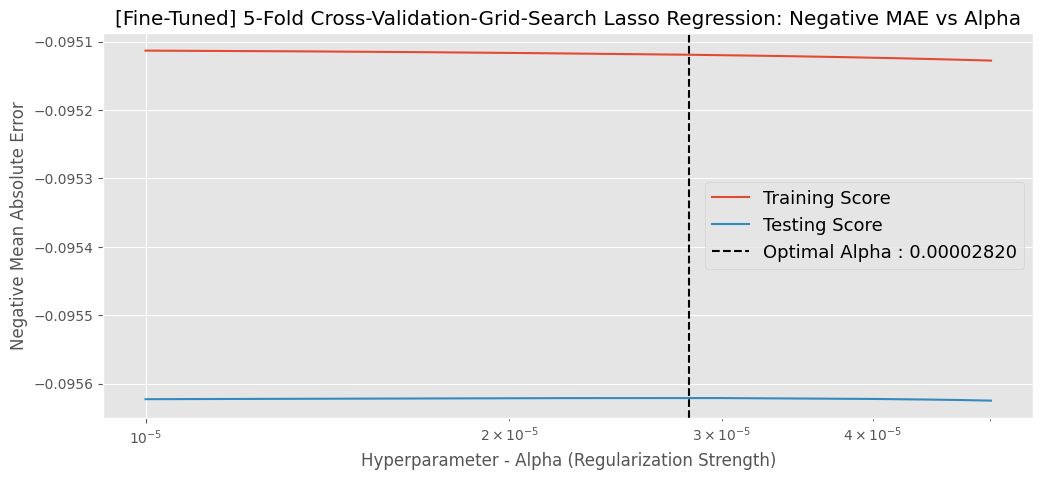

In [106]:
# Take a Smaller Range of Alpha to Test [Applying Lasso Regression with built-in Cross-Validation (Based on Negative MAE)]
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Smaller Range of Alpha (For Fine Tuning - Lasso Regularization)
fine_tune_param_grid = {"alpha": np.logspace(-5, -4.3, 200)} 

# Initializing a Lasso Regression Model
fine_tune_lasso = Lasso(random_state=42, max_iter= 20000)

# GridSearchCV for Fine tuning Lasso Hyperparameters with built-in Cross-Validation (Based on Negative MAE)
grid_fine_tune_model_cv = GridSearchCV(estimator= fine_tune_lasso, param_grid = fine_tune_param_grid, scoring = "neg_mean_absolute_error", 
                                       cv=5, n_jobs=-1, return_train_score=True, verbose=1)

# Fitting the Fine Tuned Lasso Model
grid_fine_tune_model_cv.fit(X_train_any, y_train)
print()

print (color.BOLD + "Fine-Tuned Lasso Regression with 5-Fold Cross-Validation (Based on Negative MAE):-\n" + color.END)

# Goal of this Model
print(color.BOLD + "Goal: " + color.END + "Maximize Negative MAE ---> Equivalent to Minimizing Mean Absolute Error\n")

# Check number of iterations for convergence
print(color.BOLD + "Number of Iterations for Convergence:" + color.END + f" {grid_fine_tune_model_cv.best_estimator_.n_iter_}")

# Best Alpha Value
print(color.BOLD + "Best Alpha for Fine-Tuned Lasso Model:" + color.END + f" {grid_fine_tune_model_cv.best_params_['alpha']}\n")

# Best Score (Based on Negative MAE)
print(color.BOLD + "Best 5-Fold-Cross-Validation Score for Fine-Tuned Lasso Model [Negative MAE]:" + color.END + f" {grid_fine_tune_model_cv.best_score_}")
print(color.BOLD + "The Training Score for Fine-Tuned Lasso Model [Negative MAE]:" + color.END + f" {grid_fine_tune_model_cv.score(X_train_any, y_train)}")
print(color.BOLD + "The Testing Score for Fine-Tuned Lasso Model [Negative MAE]:" + color.END + f" {grid_fine_tune_model_cv.score(X_test_any, y_test)}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing Negative MAE vs Alpha
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Converting Cross-Validation Results into a DataFrame and Sorting by Alpha
cv_results_fine_tuned = pd.DataFrame(grid_fine_tune_model_cv.cv_results_).sort_values(by= "param_alpha")

# DataType Conversion: For Visualization
cv_results_fine_tuned["param_alpha"] = cv_results_fine_tuned["param_alpha"].astype("float64")

# Plot Negative MAE vs Alpha
plt.figure(figsize=(12, 5))
plt.plot(cv_results_fine_tuned["param_alpha"], cv_results_fine_tuned["mean_train_score"], label= "Training Score")
plt.plot(cv_results_fine_tuned["param_alpha"], cv_results_fine_tuned["mean_test_score"], label= "Testing Score")
plt.axvline(grid_fine_tune_model_cv.best_params_["alpha"], 
            label = f"Optimal Alpha : {grid_fine_tune_model_cv.best_params_['alpha']:.8f}", 
            color= "black", linestyle= "--")
plt.title("[Fine-Tuned] 5-Fold Cross-Validation-Grid-Search Lasso Regression: Negative MAE vs Alpha")
plt.xlabel("Hyperparameter - Alpha (Regularization Strength)")
plt.xscale("log")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(fontsize=13)
plt.show()
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: [Fine-Tuned] 5-Fold Cross-Validation-Grid-Search Lasso Regression: Negative MAE vs Alpha
log_progress (f"[Fine-Tuned-L1-Regularization][Error-Alpha-Analysis] 5-Fold Cross-Validation-Grid-Search Lasso Regression: Negative MAE vs Alpha", "DEBUG")


<span style="font-size:18px; font-weight:bold">Final Lasso Model</span>

Using the optimised alpha obtained from fine-tuning, the final Lasso regression model was trained on the training dataset. Predictions were generated for both training and testing sets to support downstream evaluation.

To further validate the stability of the selected regularisation strength, training and testing R² scores were plotted across the fine-tuned alpha range using a hold-out approach. This confirms that the chosen alpha lies within a region of strong generalisation rather than being an unstable optimum.


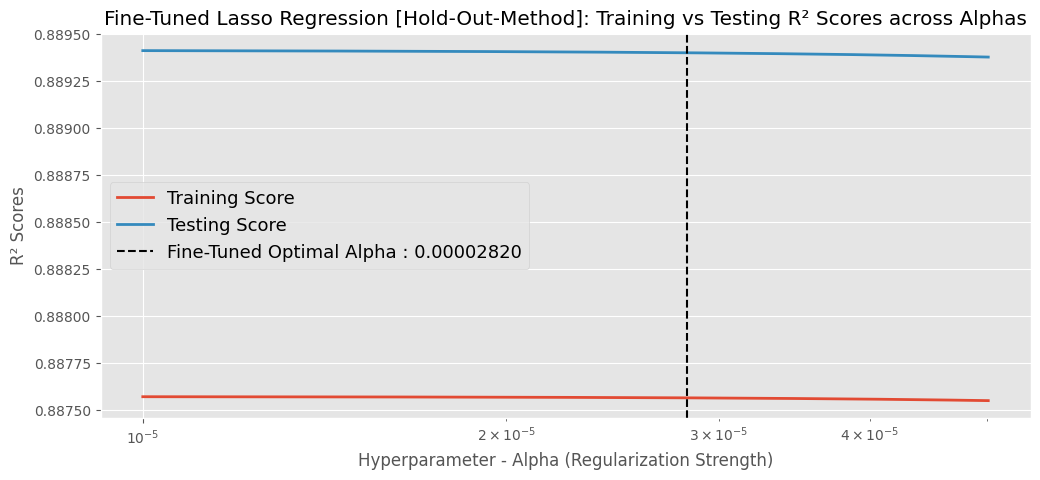

In [107]:
# Fine-Tuned Lasso Regression Model (Using the Best Alpha)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Applying and Fitting Fine-Tuned Lasso Regression Model [On Scaled Training Data - with best alpha]
lasso_fine_tuned_model = Lasso (alpha= grid_fine_tune_model_cv.best_params_["alpha"], random_state= 42, max_iter= 20000)
lasso_fine_tuned_model.fit (X_train_any, y_train)

# Making Predictions -- Purpose: To Evaluate the Lasso model on the Training and Testing data
y_train_lasso_fine_tuned_predictions = lasso_fine_tuned_model.predict(X_train_any)
y_test_lasso_fine_tuned_predictions = lasso_fine_tuned_model.predict(X_test_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plot Train and Test Scores against Alpha (Based on R² Score)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing a list for Tracking Scores
training_scores = list()
testing_scores = list()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Tracking R² Scores across different values of Alpha (Regularization Strength)
for current_alpha in fine_tune_param_grid ["alpha"]:
    # Re-Initializing and Fitting Lasso Regression Model for every loop
    lasso_model = Lasso(alpha= current_alpha, random_state=42, max_iter= 20000)
    lasso_model.fit (X_train_any, y_train)

    # Tracking Scores (Training and Testing)
    training_scores.append(lasso_model.score(X_train_any, y_train))
    testing_scores.append(lasso_model.score(X_test_any, y_test))

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualizing Training and Testing scores against Alpha
plt.figure(figsize=(12, 5))
plt.plot(fine_tune_param_grid ["alpha"], training_scores, label = "Training Score", lw= 2)
plt.plot(fine_tune_param_grid ["alpha"], testing_scores , label = "Testing Score",  lw= 2)
plt.axvline(lasso_fine_tuned_model.alpha, label = f"Fine-Tuned Optimal Alpha : {lasso_fine_tuned_model.alpha:.8f}", color= "black", linestyle= "--")
plt.title("Fine-Tuned Lasso Regression [Hold-Out-Method]: Training vs Testing R² Scores across Alphas")
plt.xlabel("Hyperparameter - Alpha (Regularization Strength)")
plt.xscale("log")
plt.ylabel("R² Scores")
plt.legend(fontsize=13)
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Fine-Tuned Lasso Regression [Hold-Out-Method]: Training vs Testing Scores across Alphas
log_progress (f"Visualizing Fine-Tuned Lasso Regression [Hold-Out-Method]: Training vs Testing R2 Scores across Alphas", "DEBUG")


<span style="font-size:18px; font-weight:bold">Lasso Model Evaluation</span>

The fine-tuned Lasso model was evaluated on both training and testing sets using standard regression metrics. Performance was assessed on the log-transformed target for statistical consistency and on the inverse-transformed prices to provide real-world interpretability. This evaluation establishes the final Lasso model’s predictive performance and prepares it for direct comparison with the baseline and Ridge models.


In [108]:
# Evaluation Metrics -- Fine-Tuned Lasso Regression
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model (Based on Negative MAE --> Log-Listed Price)
print (color.BOLD + "(Negative MAE) Let's view the Evaluation Metrics for our Lasso Regression Fine-Tuned Model on Log-Listed Price:-\n" + color.END)
df_lasso_log_metrics_any = regression_evaluation_metrics(y_train, y_train_lasso_fine_tuned_predictions, y_test, y_test_lasso_fine_tuned_predictions, feature_count= X_train_any.shape[1], inverse_transform = False).round(2)
display (df_lasso_log_metrics_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Evaluating the Model (Based on Negative MAE --> Actual Listed Price)
print (color.BOLD + "(Negative MAE) Let's view the Evaluation Metrics for our Lasso Regression Fine-Tuned Model on Actual Listed Price (Real World):-\n" + color.END)
df_lasso_actual_metrics_any = regression_evaluation_metrics(y_train, y_train_lasso_fine_tuned_predictions, y_test, y_test_lasso_fine_tuned_predictions, feature_count= X_train_any.shape[1], inverse_transform = True).round(2)
display (df_lasso_actual_metrics_any)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Fine-Tuned Lasso Regression Evaluation
log_progress (f"Evaluation [L1 Regularization]: Fine-Tuned Lasso Regression Model evaluation metrics generated.", "DEBUG")


(Negative MAE) Let's view the Evaluation Metrics for our Lasso Regression Fine-Tuned Model on Log-Listed Price:-



Var  Std Dev  Mean  Mean Absolute Error  MAPE   MSE  RMSE  \
Dataset                                                                
Training  0.14     0.38  9.72                 0.10  0.98  0.02  0.13   
Testing   0.14     0.37  9.72                 0.09  0.95  0.02  0.12   

          Median Absolute Error    R²  Adjusted R²  
Dataset                                             
Training                   0.07  0.89         0.89  
Testing                    0.07  0.89         0.89

(Negative MAE) Let's view the Evaluation Metrics for our Lasso Regression Fine-Tuned Model on Actual Listed Price (Real World):-



Var  Std Dev      Mean  Mean Absolute Error  MAPE  \
Dataset                                                               
Training  44815040.19  6694.40  17847.23              1751.96  9.53   
Testing   43866430.65  6623.17  17791.42              1721.32  9.30   

                 MSE     RMSE  Median Absolute Error    R²  Adjusted R²  
Dataset                                                                  
Training  6671764.49  2582.98                1177.43  0.85         0.85  
Testing   6641159.10  2577.04                1111.20  0.85         0.85

<span style="font-size:18px; font-weight:bold">Model Interpretation – Lasso Coefficients</span>

The coefficients from the fine-tuned Lasso model were extracted to analyse feature importance and sparsity. Due to L1 regularisation, less informative features are shrunk exactly to zero, resulting in a more compact and interpretable model. Comparing Lasso coefficients alongside Ridge coefficients provides insight into which features are consistently influential versus those eliminated during regularisation.


In [109]:
# Show the coefficients for each feature (Added Lasso - Coefficients)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
temporary_df = pd.DataFrame({"Feature": X_train_any.columns, "Lasso - Coefficients": lasso_fine_tuned_model.coef_}).round(4)
coefficient_df = pd.merge(left=coefficient_df , right=temporary_df, how="left", on= "Feature")
display (coefficient_df)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Coefficients from Lasso Regression
log_progress (f"L1 Regularization: Coefficients have been preserved from Fine-Tuned Lasso Regression Model.", "DEBUG")
log_progress ("---------------- [Completed] L1 Regularization: Lasso Regression Models ---------------", "INFO")
log_progress ("================= Step 3 : Building Linear Regression Models Completed ================\n", "INFO")


Feature  Ridge - Coefficients  \
0                             mileage_km               -0.0907   
1                        number_of_gears                0.0218   
2                         age_of_vehicle               -0.0928   
3              number_of_previous_owners                0.0008   
4                     engine_power_hp_kw                0.1803   
5                             inspection                0.0008   
6                 engine_displacement_cc               -0.0539   
7                      vehicle_weight_kg                0.0691   
8              combined_fuel_consumption                0.0155   
9                parking_convenience_any                0.0481   
10       climate_control_convenience_any                0.0260   
11       seating_comfort_convenience_any                0.0655   
12       driving_control_convenience_any               -0.0271   
13         interior_tech_convenience_any                0.0212   
14                       audio_media_any               -0.0087   
15                connectivity_media_any                0.0056   
16                video_visual_media_any                0.0676   
17     sports_and_performance_extras_any               -0.0072   
18       interior_and_comfort_extras_any                0.0009   
19       exterior_and_utility_extras_any                0.0175   
20         special_equipments_extras_any                0.0051   
21                   airbag_security_any               -0.0098   
22  lighting_and_visibility_security_any               -0.0474   
23         theft_prevention_security_any               -0.0049   
24              core_safety_security_any               -0.0052   
25       driving_assistance_security_any               -0.0171   
26                      model_brand_opel               -0.2923   
27                   model_brand_renault               -0.2699   
28                    standard_body_type               -0.0144   
29                        vat_deductible                0.0034   
30                vehicle_condition_used               -0.0331   
31                  fuel_type_non_diesel               -0.1162   
32               paint_type_Non-Metallic                0.0119   
33     upholstery_type_part_full_leather                0.0587   
34                   gearing_type_manual               -0.0944   
35                 non_front_wheel_drive               -0.0222   

    Lasso - Coefficients  
0                -0.0907  
1                 0.0216  
2                -0.0929  
3                 0.0007  
4                 0.1803  
5                 0.0005  
6                -0.0538  
7                 0.0691  
8                 0.0155  
9                 0.0482  
10                0.0252  
11                0.0654  
12               -0.0260  
13                0.0209  
14               -0.0086  
15                0.0051  
16                0.0620  
17               -0.0071  
18                0.0008  
19                0.0169  
20                0.0049  
21               -0.0098  
22               -0.0471  
23               -0.0044  
24               -0.0025  
25               -0.0170  
26               -0.2928  
27               -0.2705  
28               -0.0114  
29                0.0028  
30               -0.0329  
31               -0.1160  
32                0.0113  
33                0.0586  
34               -0.0946  
35               -0.0189

---

<span style="font-size:18px; font-weight:bold">Model Comparison – Evaluation Metrics</span>

To compare overall performance, the evaluation metrics of the baseline Linear Regression, Ridge, and Lasso models were consolidated into a single table using results on the inverse-transformed (actual price) scale.

This side-by-side comparison highlights differences in predictive accuracy and generalisation between the three approaches, providing a clear foundation for selecting the most suitable model.


In [110]:
# Comparing Evaluation Metrics for Each Model (Based on Actual Listed Price)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Renaming for Clarity
df_baseline_actual_metrics_any.rename(index= {"Training" : "LR-Training", "Testing" : "LR-Testing"}, inplace= True)
df_ridge_actual_metrics_any.rename(index= {"Training" : "Ridge-Training", "Testing" : "Ridge-Testing"}, inplace= True)
df_lasso_actual_metrics_any.rename(index= {"Training" : "Lasso-Training", "Testing" : "Lasso-Testing"}, inplace= True)

# List of DataFrames
list_of_df = [df_baseline_actual_metrics_any, df_ridge_actual_metrics_any, df_lasso_actual_metrics_any]

# Combining individual model evaluation metrics into a single dataframe
df_evaluation_metrics = pd.concat(list_of_df, axis=0)
print (color.BOLD + "Comparing Evaluation Metrics for Each Model (Based on Actual Listed Price):-\n" + color.END)
display(df_evaluation_metrics)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Comparison Table - Evaluation Metrics Across Linear Regression Models
log_progress ("===================== Step 4 : Regularization Comparison & Analysis ===================", "INFO")
log_progress (f"Comparison Table - Evaluation Metrics Across Linear Regression Models.", "DEBUG")


Comparing Evaluation Metrics for Each Model (Based on Actual Listed Price):-



Var  Std Dev      Mean  Mean Absolute Error  MAPE  \
Dataset                                                                     
LR-Training     44815040.19  6694.40  17847.23              1751.77  9.53   
LR-Testing      43866430.65  6623.17  17791.42              1721.09  9.30   
Ridge-Training  44815040.19  6694.40  17847.23              1751.75  9.53   
Ridge-Testing   43866430.65  6623.17  17791.42              1721.07  9.30   
Lasso-Training  44815040.19  6694.40  17847.23              1751.96  9.53   
Lasso-Testing   43866430.65  6623.17  17791.42              1721.32  9.30   

                       MSE     RMSE  Median Absolute Error    R²  Adjusted R²  
Dataset                                                                        
LR-Training     6668771.12  2582.40                1178.08  0.85         0.85  
LR-Testing      6639261.31  2576.68                1109.09  0.85         0.85  
Ridge-Training  6667455.54  2582.14                1178.34  0.85         0.85  
Ridge-Testing   6637428.26  2576.32                1112.37  0.85         0.85  
Lasso-Training  6671764.49  2582.98                1177.43  0.85         0.85  
Lasso-Testing   6641159.10  2577.04                1111.20  0.85         0.85

<span style="font-size:18px; font-weight:bold">Model Comparison – Coefficients & Feature Importance</span>

Coefficients from the baseline Linear Regression, Ridge, and Lasso models were consolidated to compare how each model assigns importance to features.

Lasso’s coefficient shrinkage was used to identify and remove less informative predictors, resulting in a reduced feature set. The remaining coefficients were then ranked to highlight the most influential features in the final models.

This comparison provides insight into model behaviour, interpretability, and which vehicle attributes consistently drive price predictions.


In [111]:
# Show the Coefficients for each feature (For Each Model [Linear Regression, Ridge Regression, Lasso Regression])
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Added Baseline Linear Regression - Coefficients
temporary_df = pd.DataFrame({"Feature": X_train_any.columns, "Baseline LR- Coefficients": regression_any.coef_}).round(4)
coefficient_df = pd.merge(left=coefficient_df , right=temporary_df, how="left", on= "Feature")
log_progress (f"Baseline Linear Regression: Coefficients have been preserved from Baseline Regression Model.", "DEBUG")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Checking Coefficient of Eliminated Features [Strict Elimination Process]
number_of_features_eliminated = len (coefficient_df [coefficient_df ["Lasso - Coefficients"].abs() == 0])
coefficient_df = coefficient_df [coefficient_df ["Lasso - Coefficients"].abs() != 0].copy()
print (color.BOLD + "Number of Features Eliminated By Lasso:" + color.END + f" {number_of_features_eliminated} Features\n")

# Sorted DataFrame with Top-10 Coefficients [Feature-Importance]
coefficient_df ["RidgeAbs - Coefficients"] = coefficient_df ["Ridge - Coefficients"].abs()
sorted_coefficient_df = coefficient_df.sort_values(by= "RidgeAbs - Coefficients", ascending= False).drop(columns= "RidgeAbs - Coefficients").head(10).reset_index(drop= True).copy()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Renaming Features (For Visualization)
rename_map = {
              "engine_power_hp_kw" : "Engine Power (HPKW)",
              "model_brand_opel" : "Model - Opel",
              "model_brand_renault" : "Model - Renault",
              "age_of_vehicle" : "Vehicle Age",
              "mileage_km" : "Mileage (km)",
              "vehicle_weight_kg" : "Weight (kg)",
              "fuel_type_non_diesel" : "Non-Diesel",
              "video_visual_media_any" : "Media (Television)",
              "gearing_type_manual" : "Gearing Type (Manual)",
              "seating_comfort_convenience_any" : "Comfort Convenience (Seating)"
}
sorted_coefficient_df ["Feature"] = sorted_coefficient_df ["Feature"].replace(rename_map)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (color.BOLD + "Let's view the Top-10 Coefficients [Feature-Importance]:-\n" + color.END)
sorted_coefficient_df.head(10)


Number of Features Eliminated By Lasso: 0 Features

Let's view the Top-10 Coefficients [Feature-Importance]:-



Feature  Ridge - Coefficients  Lasso - Coefficients  \
0                   Model - Opel               -0.2923               -0.2928   
1                Model - Renault               -0.2699               -0.2705   
2            Engine Power (HPKW)                0.1803                0.1803   
3                     Non-Diesel               -0.1162               -0.1160   
4          Gearing Type (Manual)               -0.0944               -0.0946   
5                    Vehicle Age               -0.0928               -0.0929   
6                   Mileage (km)               -0.0907               -0.0907   
7                    Weight (kg)                0.0691                0.0691   
8             Media (Television)                0.0676                0.0620   
9  Comfort Convenience (Seating)                0.0655                0.0654   

   Baseline LR- Coefficients  
0                    -0.2934  
1                    -0.2714  
2                     0.1805  
3                    -0.1171  
4                    -0.0947  
5                    -0.0928  
6                    -0.0907  
7                     0.0690  
8                     0.0747  
9                     0.0653

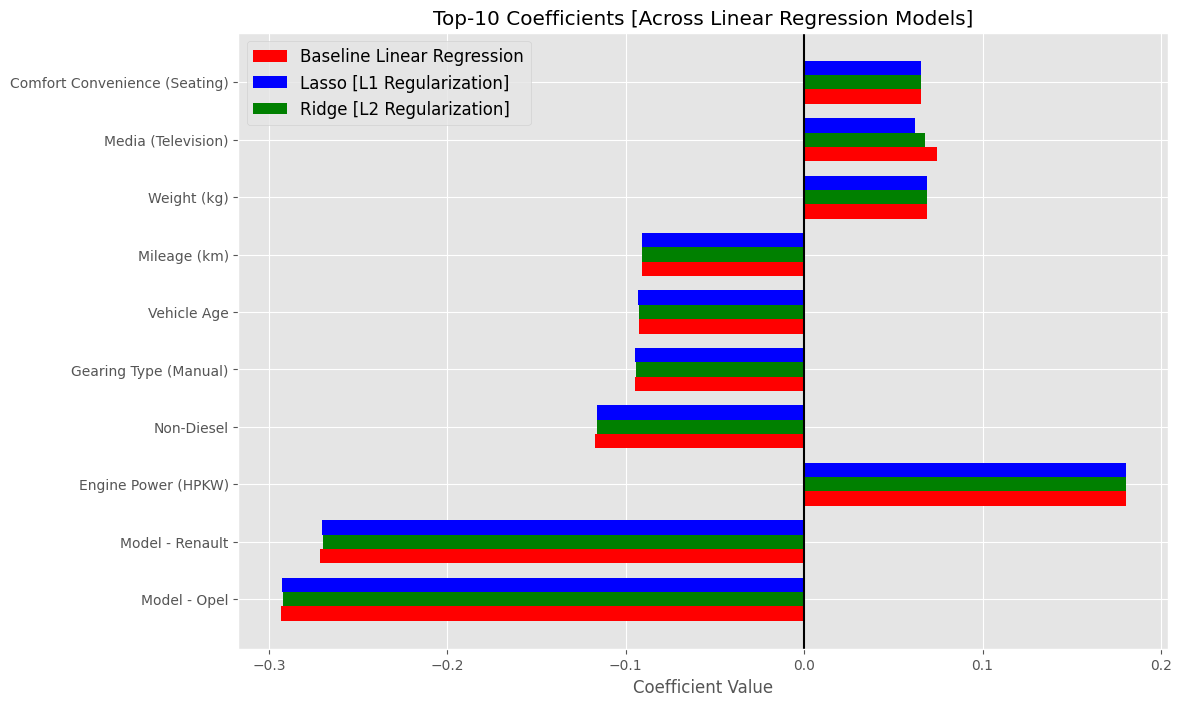

In [112]:
# Comparing Top 10 Highest Coefficients [Lasso - No features were eliminated]
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))

plt.barh(y= np.arange(len(sorted_coefficient_df["Feature"])) - 0.25,
         width= sorted_coefficient_df["Baseline LR- Coefficients"],
         height= 0.25, label= "Baseline Linear Regression", color= "red")

plt.barh(y= np.arange(len(sorted_coefficient_df["Feature"])) + 0.25,
         width= sorted_coefficient_df["Lasso - Coefficients"],
         height= 0.25, label= "Lasso [L1 Regularization]", color= "blue")

plt.barh(y= np.arange(len(sorted_coefficient_df["Feature"])),
         width= sorted_coefficient_df["Ridge - Coefficients"],
         height= 0.25, label= "Ridge [L2 Regularization]", color= "green")

plt.axvline(x= 0, color= "black")
plt.title("Top-10 Coefficients [Across Linear Regression Models]")
plt.xlabel("Coefficient Value")
plt.yticks(ticks= np.arange(len(sorted_coefficient_df["Feature"])), 
           labels= sorted_coefficient_df["Feature"])
plt.legend(fontsize= 12)
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging: Comparing Top 10 Highest Coefficients
log_progress ("Visualization - Comparing Top 10 Highest Coefficients.", "DEBUG")
log_progress ("================== Step 4 : Regularization Comparison Phase Completed =================\n", "INFO")


In [113]:
# Logging the Exact End Time
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging the Exact End Time
timeformat = '%Y-%h-%d-%H:%M:%S'
timestamp = datetime.now().strftime(timeformat)

log_progress (f"End Time : {timestamp}")

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Logging the Duration (Runtime)

end_time = time.time()
time_duration = end_time - start_time
minutes = time_duration /60
seconds = time_duration % 60

log_progress (f"Notebook Runtime : {int(minutes)} minutes and {seconds:.0f} seconds")


---

<span style="font-size:25px; font-weight:bold">Conclusion & Key Takeaways</span>

- **Effect of Regularization Techniques:** Ridge and Lasso played an important role in feature importance, stabilizing the model, controlling the coefficient rather than dramatic performance improvement (gains).

- **No Evidence of Overfitting:** Model generalized really well, with no meaningful overfitting was observed. Training and Testing metrics were closely aligned and remained almost consistent across all models.

- **Feature engineering and Outlier handling:** Played an important role for minimal performance gain and minimal variations across models. Target transformation, handling class imbalances, Upper-tail Winsorization and feature encoding played a crucial role.

- **Sufficient Data:** With over 15,000 vehicle listings, the sampled web-scraped data was sufficient enough to achieve statistical significance and predictive accuracy for predicting used car prices.

- **Linear Model:** A linear model is sufficient for this dataset and the scope of our analysis, with an 85% of explained variance in vehicle prices across all models, while satisfying the core assumptions of linearity.

- **Random Forests / Gradient Boosting:** (Interpretability vs. Complexity Trade-off) - These models might be able to capture the remaining variance, but a linear model provides a higher level of interpretability and pricing transparency which is invaluable to business stakeholders.

- **Presence over Quantity:** The presence of a feature is more interpretable, and a consumer pays for the existence of a feature rather than a specific number of components of that feature.

- **Presence of Managed Multicollinearity:** Variance Inflation Factor (VIF) analysis revealed moderate to high multicollinearity among several predictors which were feature engineered. Regularization methods were able to manage redundancy, validating the decision to not manually remove features.

- **Diminishing Returns of Regularization:** Ridge and Lasso Regression both improved coefficient stability, fine-tuning the regularization strength yielded marginal performance improvements. This could indicate that our features were already well-engineered and further regularization primarily only improved model stability and handled multicollinearity rather than true predictive power.

- **Residual Diagnostics and Model Assumptions:** Residual analysis confirmed that our linear assumptions were satisfied for majority of our data points. Residuals followed a near-normal distribution on both training and testing sets. This validates that linear regression was suitable for the scope of our business problem.

- **Symmetric Depreciation (Time vs Wear):** The depreciation factor for Vehicle Age and Mileage carried nearly identical weights. The coefficient analysis revealed that buyers view the vehicles age (time passed) and distance travelled (physical wear) as equivalent risk, penalizing them equally.

- **Strongest Positive Driver:** Engine Power has the strongest positive coefficients across all models, indicating that a higher power vehicle commands a higher price.

- **Strongest Negative Driver:** Vehicle models like Opel and Renault have strong negative coefficients compared to Audi. This captures brand-specific price depreciation.


---